<a href="https://colab.research.google.com/github/Tinonturja/Deep-Learning-with-PyTorch/blob/main/Diabetes_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold

## Dataset

In [2]:
#load the dataset
diabetes_dataset = pd.read_csv('/content/pima-indians-diabetes.csv')
diabetes_dataset.head()

6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

In [3]:
#turn the dataset into numpy values
diabet_data = diabetes_dataset.to_numpy()


In [4]:
X = diabet_data[:,:8]
y = diabet_data[:,8]

In [5]:
X.shape,y.shape

((767, 8), (767,))

## Device Agnostic Code

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Splitting data

In [7]:
def splitting_data(X,y,test_size):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,shuffle=True,random_state=42)
  return X_train,X_test,y_train,y_test

## Scaling data

In [8]:
def scaled_data(X_train,X_test):
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  return X_train,X_test

## Model

In [9]:
class ClassificationModelv1(nn.Module):
  def __init__(self,l1,l2):
    super().__init__()
    self.layer1 = nn.Linear(in_features=8,
                            out_features=l1)
    self.layer2 = nn.Linear(in_features=l1,
                            out_features=l2)
    self.layer3 = nn.Linear(in_features=l2,
                            out_features = 1)

    #activation function
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))))

## Plotting Function

In [10]:
def plotting_function(train_losses,test_losses,train_accuracies,test_accuracies):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  plt.plot(train_losses, label='Train Loss')
  plt.plot(test_losses, label='Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(f'Train vs Test Loss (Split {split})')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(train_accuracies, label='Train Accuracy')
  plt.plot(test_accuracies, label='Test Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title(f'Train vs Test Accuracy (Split {split})')
  plt.legend()
  plt.show()

## Training and Testing

In [11]:
torch.manual_seed(42)
def train_test(X_train,y_train,X_test,y_test,model,epochs,lr = 0.001):
  #scaled the data
  X_train,X_test = scaled_data(X_train,X_test)

  #convert torch to tensors
  X_train = torch.tensor(X_train,dtype = torch.float32).to(device)
  y_train = torch.tensor(y_train,dtype = torch.float32).to(device).squeeze()
  X_test = torch.tensor(X_test,dtype = torch.float32).to(device)
  y_test = torch.tensor(y_test,dtype = torch.float32).to(device).squeeze()
  model = model.to(device)
  train_loss_list = []
  test_loss_list = []
  train_accuracies = []
  test_accuracies =[]
  #loss function
  loss_fn = nn.BCELoss()

  #optimizer
  optimizer = torch.optim.Adam(model.parameters(),
                               lr = lr)

  #train the model
  for epoch in range(epochs):
    model.train()

    #training data
    train_pred = model(X_train).squeeze()
    train_loss = loss_fn(train_pred,y_train)
    train_loss_list.append(train_loss.item())
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    train_accuracy = ((train_pred.round() == y_train).float().mean()).item()
    train_accuracies.append(train_accuracy)
    #testing the model
    with torch.inference_mode():
      model.eval()
      test_pred = model(X_test).squeeze()
      test_loss = loss_fn(test_pred,y_test)
      test_loss_list.append(test_loss.item())

      test_accuracy = ((test_pred.round() == y_test).float().mean()).item()
      test_accuracies.append(test_accuracy)
    if epoch %10 ==0:
      print(f"Train_loss: {train_loss}  | Test_loss: {test_loss}  | Train_accuracy: {train_accuracy}  | Test_accuracy: {test_accuracy}")

  return train_loss_list,test_loss_list,train_accuracies,test_accuracies


## Task-1

Split: 0.2
Train_loss: 0.7244873046875  | Test_loss: 0.7193663716316223  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.7203390002250671  | Test_loss: 0.7159851789474487  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.7166188955307007  | Test_loss: 0.7130013108253479  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.7133022546768188  | Test_loss: 0.7103902697563171  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.7102320790290833  | Test_loss: 0.7078878283500671  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.7068484425544739  | Test_loss: 0.7048379182815552  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.7023066282272339  | Test_loss: 0.7008974552154541  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 

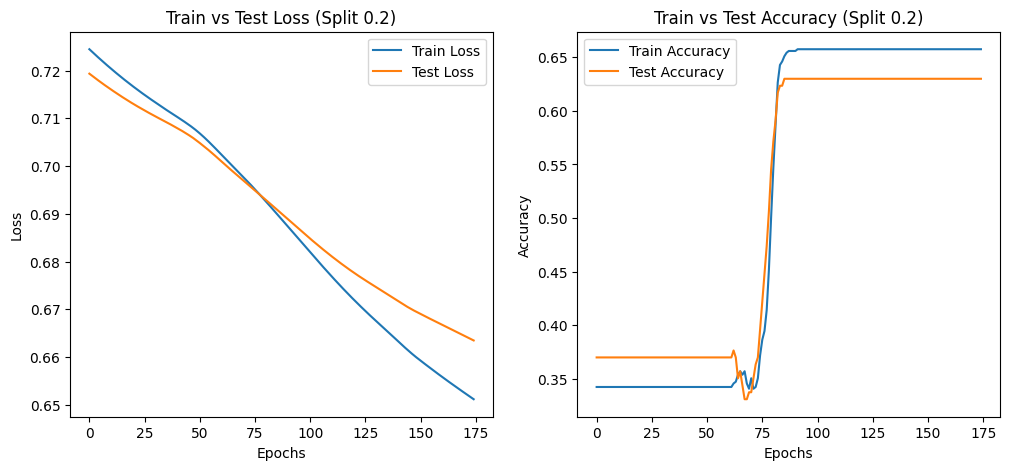

Split: 0.3
Train_loss: 0.674115777015686  | Test_loss: 0.6730843186378479  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6711106896400452  | Test_loss: 0.6701368093490601  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.668231189250946  | Test_loss: 0.6675130128860474  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6653909087181091  | Test_loss: 0.6649437546730042  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6625434160232544  | Test_loss: 0.6624472737312317  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6596515774726868  | Test_loss: 0.6599223017692566  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6566649079322815  | Test_loss: 0.6572564840316772  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6536

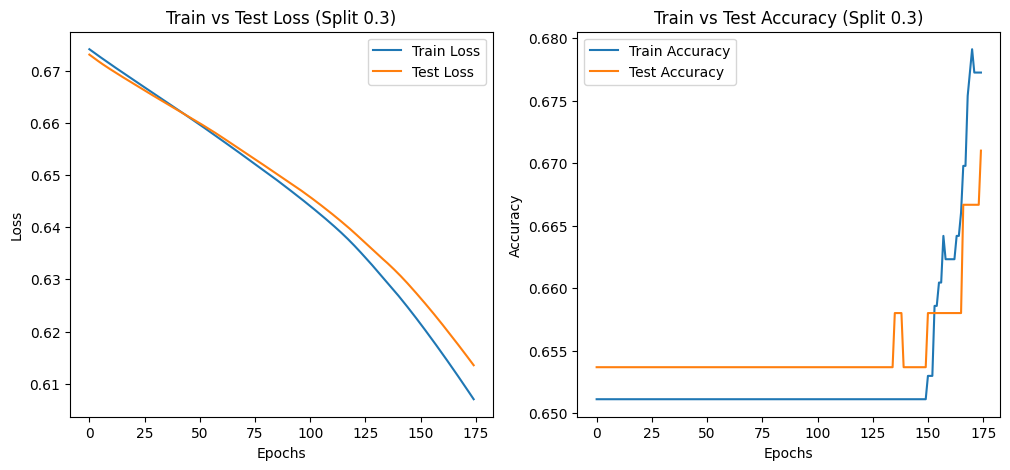

Split: 0.1
Train_loss: 0.7286365628242493  | Test_loss: 0.7303550243377686  | Train_accuracy: 0.3492753803730011  | Test_accuracy: 0.33766233921051025
Train_loss: 0.7187011241912842  | Test_loss: 0.7197823524475098  | Train_accuracy: 0.3492753803730011  | Test_accuracy: 0.33766233921051025
Train_loss: 0.7089873552322388  | Test_loss: 0.7094437479972839  | Train_accuracy: 0.3492753803730011  | Test_accuracy: 0.33766233921051025
Train_loss: 0.6995642781257629  | Test_loss: 0.6993427276611328  | Train_accuracy: 0.3478260934352875  | Test_accuracy: 0.3246753215789795
Train_loss: 0.6913840770721436  | Test_loss: 0.6907368302345276  | Train_accuracy: 0.5782608985900879  | Test_accuracy: 0.5974025726318359
Train_loss: 0.6840768456459045  | Test_loss: 0.6826398968696594  | Train_accuracy: 0.6507246494293213  | Test_accuracy: 0.6623376607894897
Train_loss: 0.6773088574409485  | Test_loss: 0.6749480962753296  | Train_accuracy: 0.6507246494293213  | Test_accuracy: 0.6623376607894897
Train_loss: 0

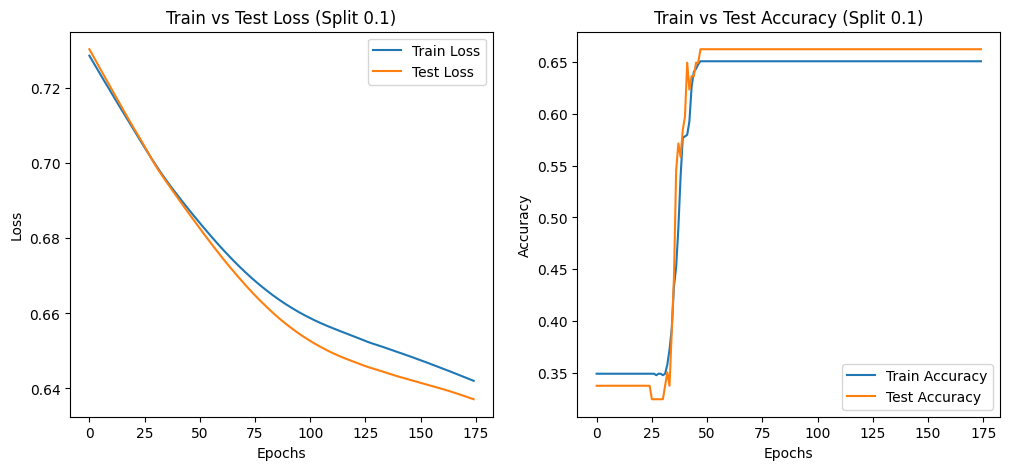

In [12]:
# Task 1: Plain validation with different train-test splits
splits = [0.2, 0.3, 0.1]
for split in splits:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)

    model = ClassificationModelv1(10,8)
    print(f"Split: {split}")
    train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs=175)


    plot = plotting_function(train_losses, test_losses, train_accuracies, test_accuracies)

I got the higher accuracy while splitting the data into 70:30 ratio. The train accuracy that the model achieved is 68% while the test accuracy is 67%.
The training and testing loss is following by 0.61 and 0.62.

Train_loss: 0.6872597932815552  | Test_loss: 0.684939980506897  | Train_accuracy: 0.6360078454017639  | Test_accuracy: 0.67578125
Train_loss: 0.6826503872871399  | Test_loss: 0.6796712279319763  | Train_accuracy: 0.6438356041908264  | Test_accuracy: 0.66796875
Train_loss: 0.6787606477737427  | Test_loss: 0.6751344203948975  | Train_accuracy: 0.6438356041908264  | Test_accuracy: 0.66796875
Train_loss: 0.6753396987915039  | Test_loss: 0.6710681915283203  | Train_accuracy: 0.6438356041908264  | Test_accuracy: 0.66796875
Train_loss: 0.6720541715621948  | Test_loss: 0.6670476198196411  | Train_accuracy: 0.6438356041908264  | Test_accuracy: 0.66796875
Train_loss: 0.6688194274902344  | Test_loss: 0.6631486415863037  | Train_accuracy: 0.6438356041908264  | Test_accuracy: 0.66796875
Train_loss: 0.6659102439880371  | Test_loss: 0.6596835851669312  | Train_accuracy: 0.6438356041908264  | Test_accuracy: 0.66796875
Train_loss: 0.6635900735855103  | Test_loss: 0.6567749977111816  | Train_accuracy: 0

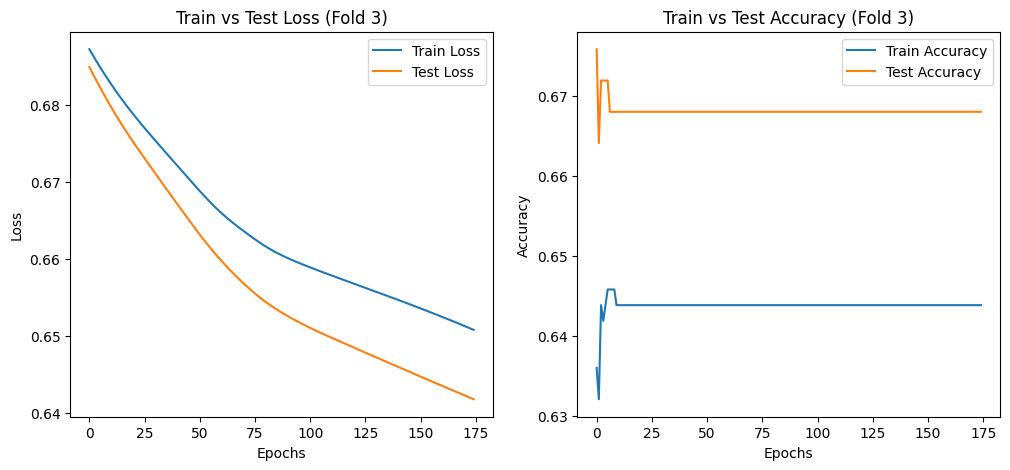

Train_loss: 0.6640927195549011  | Test_loss: 0.6748021245002747  | Train_accuracy: 0.675146758556366  | Test_accuracy: 0.60546875
Train_loss: 0.6598118543624878  | Test_loss: 0.6729503870010376  | Train_accuracy: 0.675146758556366  | Test_accuracy: 0.60546875
Train_loss: 0.6558521389961243  | Test_loss: 0.6713415384292603  | Train_accuracy: 0.675146758556366  | Test_accuracy: 0.60546875
Train_loss: 0.6521670818328857  | Test_loss: 0.6700422763824463  | Train_accuracy: 0.675146758556366  | Test_accuracy: 0.60546875
Train_loss: 0.6485104560852051  | Test_loss: 0.6683040261268616  | Train_accuracy: 0.675146758556366  | Test_accuracy: 0.60546875
Train_loss: 0.6446769833564758  | Test_loss: 0.665958046913147  | Train_accuracy: 0.675146758556366  | Test_accuracy: 0.60546875
Train_loss: 0.6406453847885132  | Test_loss: 0.6635760068893433  | Train_accuracy: 0.675146758556366  | Test_accuracy: 0.60546875
Train_loss: 0.6363061666488647  | Test_loss: 0.661017656326294  | Train_accuracy: 0.6751467

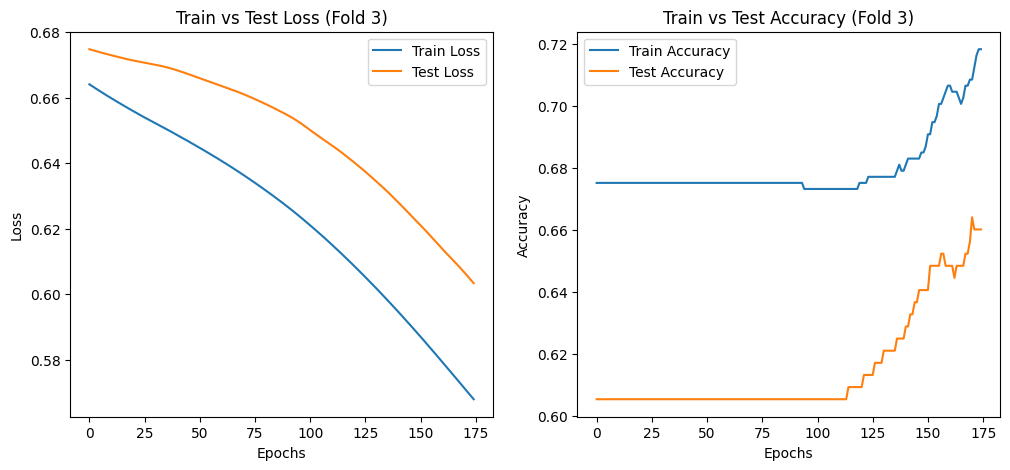

Train_loss: 0.6719788312911987  | Test_loss: 0.6625528335571289  | Train_accuracy: 0.63671875  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6691924333572388  | Test_loss: 0.6587769985198975  | Train_accuracy: 0.63671875  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6665871143341064  | Test_loss: 0.6550999283790588  | Train_accuracy: 0.63671875  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6639518141746521  | Test_loss: 0.6513928174972534  | Train_accuracy: 0.63671875  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6615180969238281  | Test_loss: 0.6479979753494263  | Train_accuracy: 0.63671875  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6595022678375244  | Test_loss: 0.6451480388641357  | Train_accuracy: 0.63671875  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6575601696968079  | Test_loss: 0.6426007747650146  | Train_accuracy: 0.63671875  | Test_accuracy: 0.6823529601097107
Train_loss: 0.655531644821167  | Test_loss: 0.6398832201957703  | Train_accuracy: 0

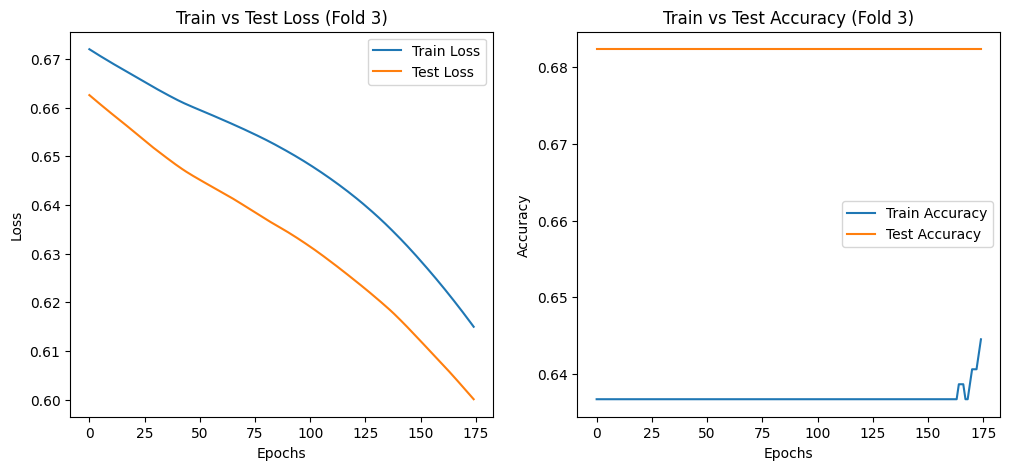

K=3: Average Final Test Loss = 0.6150734225908915, Average Test Accuracy = 0.6701593200365702
Train_loss: 0.6756237149238586  | Test_loss: 0.6750528216362  | Train_accuracy: 0.6539130806922913  | Test_accuracy: 0.6458333730697632
Train_loss: 0.669858992099762  | Test_loss: 0.6697080135345459  | Train_accuracy: 0.6539130806922913  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6649225950241089  | Test_loss: 0.6650774478912354  | Train_accuracy: 0.6539130806922913  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6606289148330688  | Test_loss: 0.6610132455825806  | Train_accuracy: 0.6539130806922913  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6568887233734131  | Test_loss: 0.657476544380188  | Train_accuracy: 0.6539130806922913  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6537081003189087  | Test_loss: 0.6544492840766907  | Train_accuracy: 0.6539130806922913  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6511363387107849  | Test_loss: 0.6518806219100952  | Train_accu

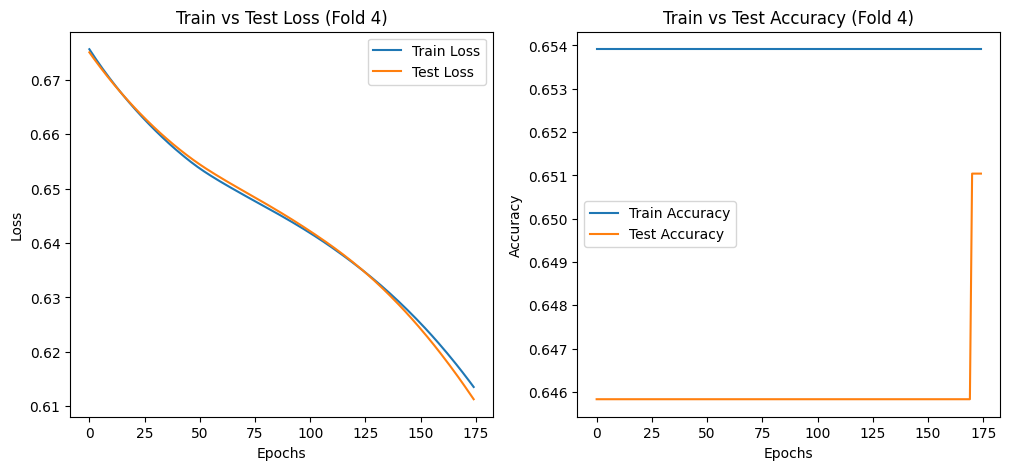

Train_loss: 0.6636816263198853  | Test_loss: 0.6496871709823608  | Train_accuracy: 0.6399999856948853  | Test_accuracy: 0.6875
Train_loss: 0.6614384651184082  | Test_loss: 0.6459092497825623  | Train_accuracy: 0.6399999856948853  | Test_accuracy: 0.6875
Train_loss: 0.6595343351364136  | Test_loss: 0.6425670385360718  | Train_accuracy: 0.6399999856948853  | Test_accuracy: 0.6875
Train_loss: 0.6579046249389648  | Test_loss: 0.6396592855453491  | Train_accuracy: 0.6399999856948853  | Test_accuracy: 0.6875
Train_loss: 0.656491756439209  | Test_loss: 0.6371093988418579  | Train_accuracy: 0.6399999856948853  | Test_accuracy: 0.6875
Train_loss: 0.6552228331565857  | Test_loss: 0.6348763704299927  | Train_accuracy: 0.6399999856948853  | Test_accuracy: 0.6875
Train_loss: 0.6540040373802185  | Test_loss: 0.6328920125961304  | Train_accuracy: 0.6399999856948853  | Test_accuracy: 0.6875
Train_loss: 0.6527449488639832  | Test_loss: 0.6310831308364868  | Train_accuracy: 0.6399999856948853  | Test_ac

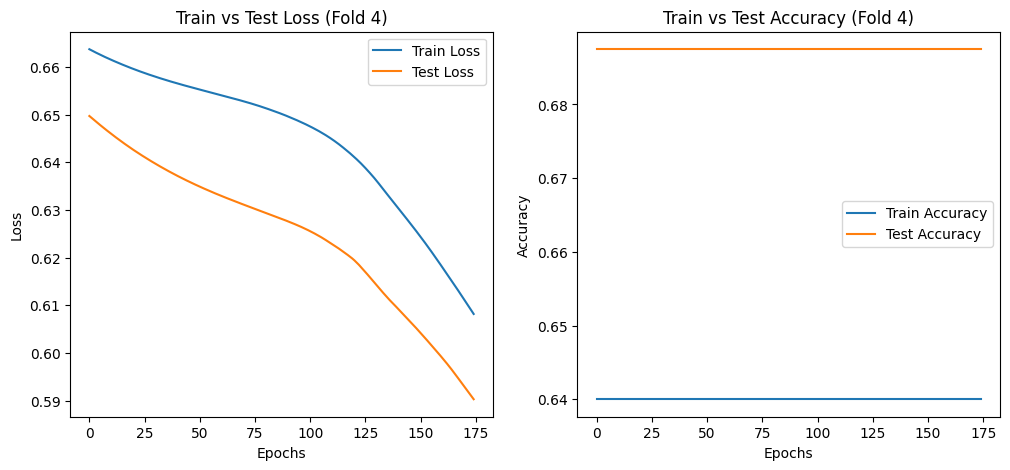

Train_loss: 0.7499116063117981  | Test_loss: 0.7306642532348633  | Train_accuracy: 0.33043479919433594  | Test_accuracy: 0.4010416865348816
Train_loss: 0.7390542030334473  | Test_loss: 0.7234872579574585  | Train_accuracy: 0.33043479919433594  | Test_accuracy: 0.4010416865348816
Train_loss: 0.728599488735199  | Test_loss: 0.7168812155723572  | Train_accuracy: 0.33043479919433594  | Test_accuracy: 0.4010416865348816
Train_loss: 0.7184628844261169  | Test_loss: 0.7106380462646484  | Train_accuracy: 0.33043479919433594  | Test_accuracy: 0.4010416865348816
Train_loss: 0.7085528373718262  | Test_loss: 0.7046831846237183  | Train_accuracy: 0.2973913252353668  | Test_accuracy: 0.3489583432674408
Train_loss: 0.7000559568405151  | Test_loss: 0.6999797821044922  | Train_accuracy: 0.3026086986064911  | Test_accuracy: 0.3177083432674408
Train_loss: 0.6923391222953796  | Test_loss: 0.6962272524833679  | Train_accuracy: 0.6399999856948853  | Test_accuracy: 0.5572916865348816
Train_loss: 0.6850626468

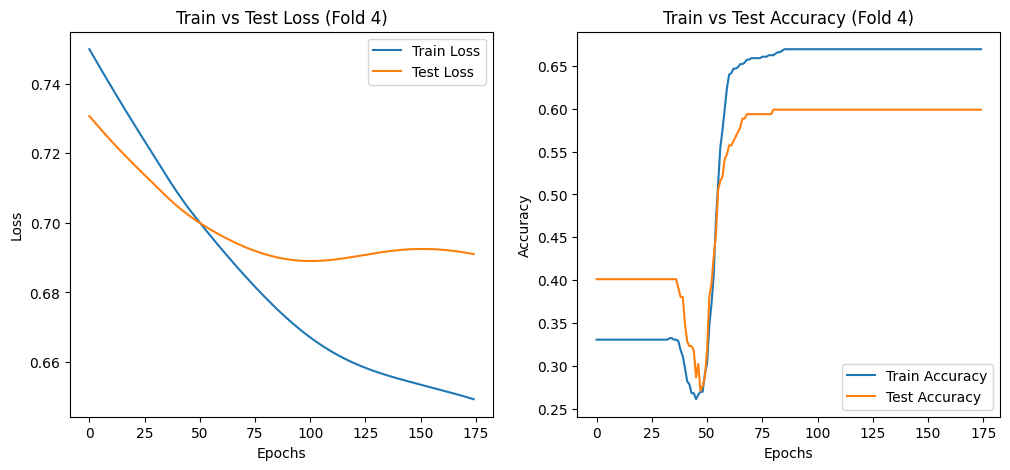

Train_loss: 0.7696312665939331  | Test_loss: 0.7789642810821533  | Train_accuracy: 0.3559027910232544  | Test_accuracy: 0.32460734248161316
Train_loss: 0.7559636235237122  | Test_loss: 0.7639065980911255  | Train_accuracy: 0.3559027910232544  | Test_accuracy: 0.32460734248161316
Train_loss: 0.744296669960022  | Test_loss: 0.7509599328041077  | Train_accuracy: 0.3559027910232544  | Test_accuracy: 0.32460734248161316
Train_loss: 0.733807384967804  | Test_loss: 0.739321231842041  | Train_accuracy: 0.3559027910232544  | Test_accuracy: 0.32460734248161316
Train_loss: 0.7242708206176758  | Test_loss: 0.7287315726280212  | Train_accuracy: 0.3559027910232544  | Test_accuracy: 0.32460734248161316
Train_loss: 0.7175171375274658  | Test_loss: 0.7210890054702759  | Train_accuracy: 0.3559027910232544  | Test_accuracy: 0.32460734248161316
Train_loss: 0.711792528629303  | Test_loss: 0.7143383622169495  | Train_accuracy: 0.3559027910232544  | Test_accuracy: 0.32460734248161316
Train_loss: 0.7061923146

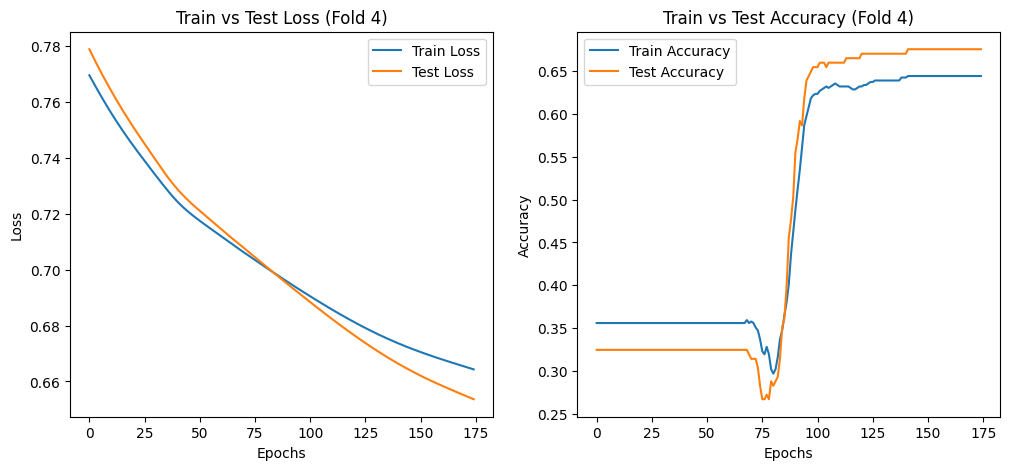

K=4: Average Final Test Loss = 0.636567011475563, Average Test Accuracy = 0.6532231867313385
Train_loss: 0.7177156209945679  | Test_loss: 0.7134169936180115  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.7123363614082336  | Test_loss: 0.7087697386741638  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.707215428352356  | Test_loss: 0.7043461203575134  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.702551007270813  | Test_loss: 0.7002750635147095  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.6979493498802185  | Test_loss: 0.6962486505508423  | Train_accuracy: 0.3376835286617279  | Test_accuracy: 0.3636363744735718
Train_loss: 0.6930056214332581  | Test_loss: 0.691936731338501  | Train_accuracy: 0.584013044834137  | Test_accuracy: 0.6558441519737244
Train_loss: 0.6875344514846802  | Test_loss: 0.6873372793197632  | Train_

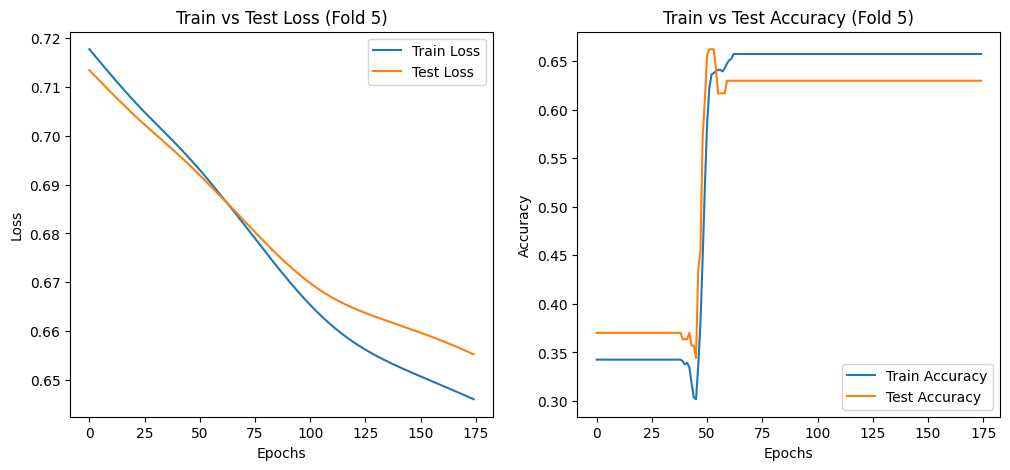

Train_loss: 0.6666184067726135  | Test_loss: 0.6523338556289673  | Train_accuracy: 0.6427406072616577  | Test_accuracy: 0.6883116960525513
Train_loss: 0.6635295152664185  | Test_loss: 0.6472185254096985  | Train_accuracy: 0.6427406072616577  | Test_accuracy: 0.6883116960525513
Train_loss: 0.6612650156021118  | Test_loss: 0.6432122588157654  | Train_accuracy: 0.6427406072616577  | Test_accuracy: 0.6883116960525513
Train_loss: 0.65952467918396  | Test_loss: 0.6400143504142761  | Train_accuracy: 0.6427406072616577  | Test_accuracy: 0.6883116960525513
Train_loss: 0.6580975651741028  | Test_loss: 0.6374450922012329  | Train_accuracy: 0.6427406072616577  | Test_accuracy: 0.6883116960525513
Train_loss: 0.6567643284797668  | Test_loss: 0.6353021264076233  | Train_accuracy: 0.6427406072616577  | Test_accuracy: 0.6883116960525513
Train_loss: 0.6553295850753784  | Test_loss: 0.6333287954330444  | Train_accuracy: 0.6427406072616577  | Test_accuracy: 0.6883116960525513
Train_loss: 0.653817653656005

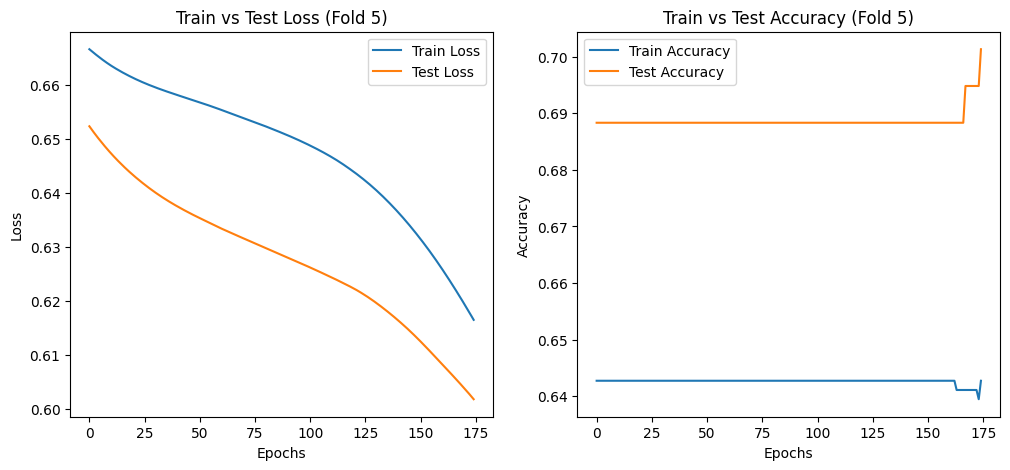

Train_loss: 0.7171940803527832  | Test_loss: 0.7146235108375549  | Train_accuracy: 0.3452768623828888  | Test_accuracy: 0.35947713255882263
Train_loss: 0.7124121785163879  | Test_loss: 0.7102339267730713  | Train_accuracy: 0.3452768623828888  | Test_accuracy: 0.35947713255882263
Train_loss: 0.7080437541007996  | Test_loss: 0.706227719783783  | Train_accuracy: 0.3452768623828888  | Test_accuracy: 0.35947713255882263
Train_loss: 0.704013466835022  | Test_loss: 0.7025411128997803  | Train_accuracy: 0.3452768623828888  | Test_accuracy: 0.35947713255882263
Train_loss: 0.7002444267272949  | Test_loss: 0.6991088390350342  | Train_accuracy: 0.3452768623828888  | Test_accuracy: 0.35947713255882263
Train_loss: 0.696596622467041  | Test_loss: 0.695793867111206  | Train_accuracy: 0.3452768623828888  | Test_accuracy: 0.35947713255882263
Train_loss: 0.6929500102996826  | Test_loss: 0.6925120949745178  | Train_accuracy: 0.465798020362854  | Test_accuracy: 0.5098039507865906
Train_loss: 0.689298152923

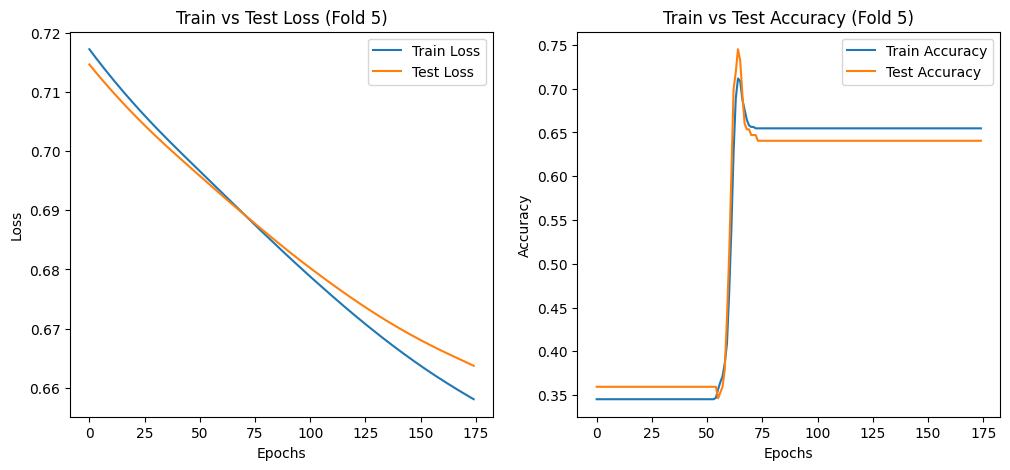

Train_loss: 0.7263898253440857  | Test_loss: 0.7196821570396423  | Train_accuracy: 0.34201952815055847  | Test_accuracy: 0.37254902720451355
Train_loss: 0.7114631533622742  | Test_loss: 0.7075798511505127  | Train_accuracy: 0.34201952815055847  | Test_accuracy: 0.37254902720451355
Train_loss: 0.6983917951583862  | Test_loss: 0.6973441243171692  | Train_accuracy: 0.3403908610343933  | Test_accuracy: 0.3529411852359772
Train_loss: 0.6872508525848389  | Test_loss: 0.6887850165367126  | Train_accuracy: 0.6547231078147888  | Test_accuracy: 0.6209150552749634
Train_loss: 0.6789174675941467  | Test_loss: 0.6822832226753235  | Train_accuracy: 0.6579804420471191  | Test_accuracy: 0.6274510025978088
Train_loss: 0.6712045073509216  | Test_loss: 0.676461398601532  | Train_accuracy: 0.6579804420471191  | Test_accuracy: 0.6274510025978088
Train_loss: 0.6637746691703796  | Test_loss: 0.6713162660598755  | Train_accuracy: 0.6579804420471191  | Test_accuracy: 0.6274510025978088
Train_loss: 0.6577513813

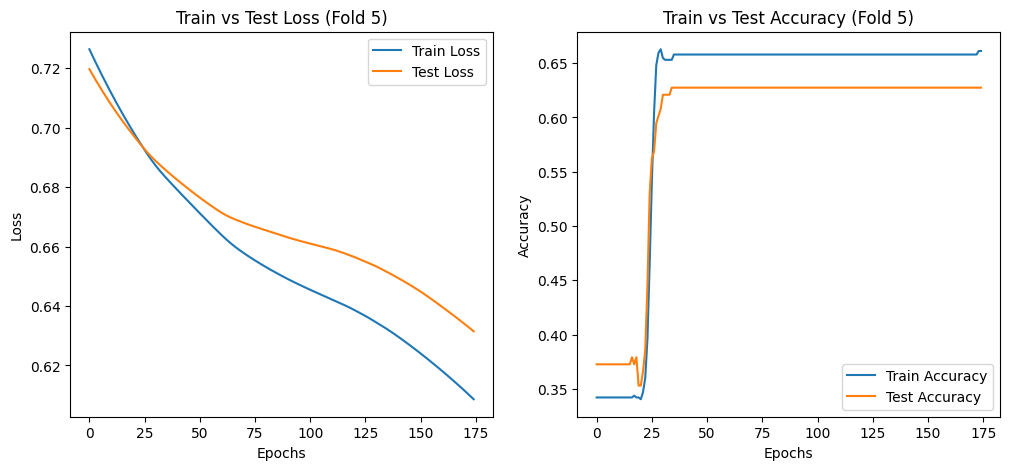

Train_loss: 0.6838303208351135  | Test_loss: 0.6817003488540649  | Train_accuracy: 0.6465798020362854  | Test_accuracy: 0.673202633857727
Train_loss: 0.681326150894165  | Test_loss: 0.6790457963943481  | Train_accuracy: 0.6465798020362854  | Test_accuracy: 0.673202633857727
Train_loss: 0.6793150305747986  | Test_loss: 0.6769090294837952  | Train_accuracy: 0.6465798020362854  | Test_accuracy: 0.673202633857727
Train_loss: 0.6773045659065247  | Test_loss: 0.6747517585754395  | Train_accuracy: 0.6449511051177979  | Test_accuracy: 0.673202633857727
Train_loss: 0.6745585203170776  | Test_loss: 0.6723050475120544  | Train_accuracy: 0.6482084393501282  | Test_accuracy: 0.6797385811805725
Train_loss: 0.6721209287643433  | Test_loss: 0.6696646213531494  | Train_accuracy: 0.6498371362686157  | Test_accuracy: 0.6797385811805725
Train_loss: 0.6698501706123352  | Test_loss: 0.6673622727394104  | Train_accuracy: 0.6579804420471191  | Test_accuracy: 0.6993464231491089
Train_loss: 0.6673812866210938  

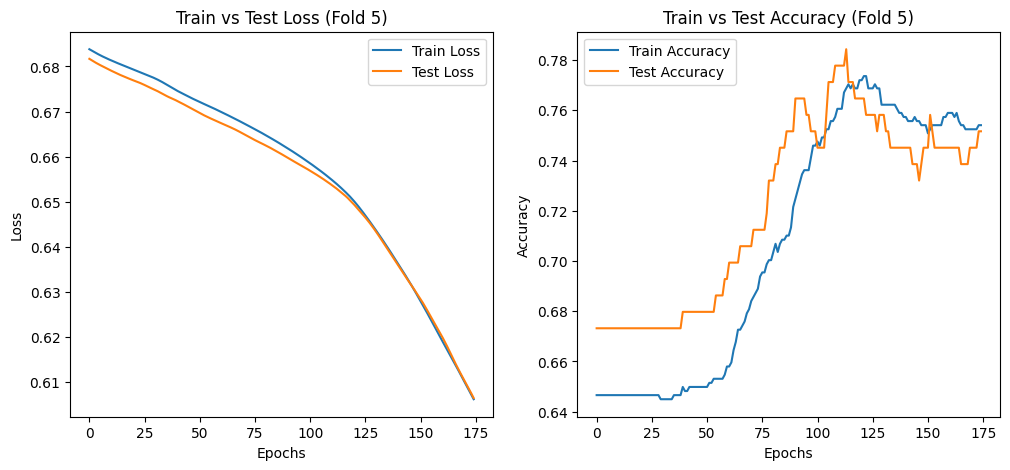

K=5: Average Final Test Loss = 0.631740140914917, Average Test Accuracy = 0.6701553463935852
Train_loss: 0.6897205114364624  | Test_loss: 0.6901586651802063  | Train_accuracy: 0.6588419079780579  | Test_accuracy: 0.6171875
Train_loss: 0.6838876605033875  | Test_loss: 0.6858429908752441  | Train_accuracy: 0.6588419079780579  | Test_accuracy: 0.6171875
Train_loss: 0.6783785223960876  | Test_loss: 0.6819792985916138  | Train_accuracy: 0.6588419079780579  | Test_accuracy: 0.6171875
Train_loss: 0.6730974316596985  | Test_loss: 0.6784077882766724  | Train_accuracy: 0.6588419079780579  | Test_accuracy: 0.6171875
Train_loss: 0.6681597828865051  | Test_loss: 0.6753266453742981  | Train_accuracy: 0.6588419079780579  | Test_accuracy: 0.6171875
Train_loss: 0.6636247634887695  | Test_loss: 0.6727441549301147  | Train_accuracy: 0.6588419079780579  | Test_accuracy: 0.6171875
Train_loss: 0.6593794822692871  | Test_loss: 0.6702662706375122  | Train_accuracy: 0.6588419079780579  | Test_accuracy: 0.61718

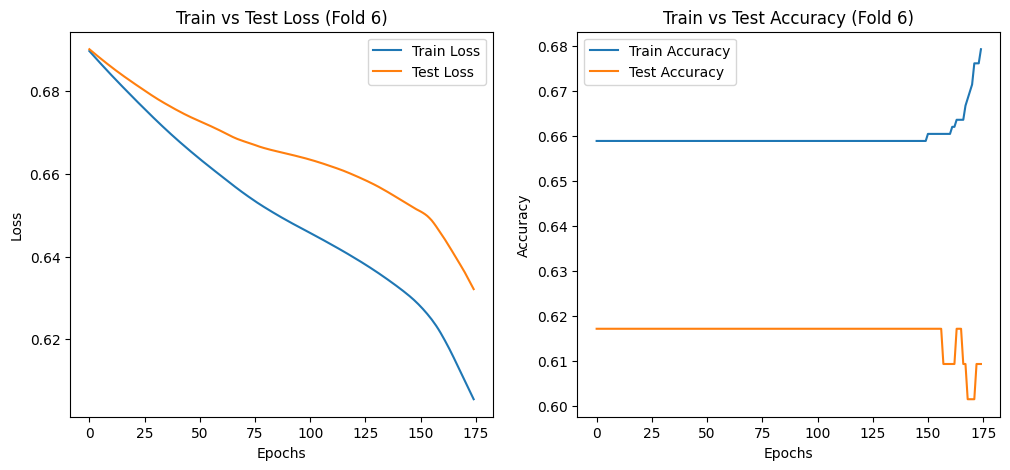

Train_loss: 0.7072262167930603  | Test_loss: 0.7146073579788208  | Train_accuracy: 0.36150234937667847  | Test_accuracy: 0.28125
Train_loss: 0.701865017414093  | Test_loss: 0.7067234516143799  | Train_accuracy: 0.36150234937667847  | Test_accuracy: 0.2734375
Train_loss: 0.6964712142944336  | Test_loss: 0.6981861591339111  | Train_accuracy: 0.364632248878479  | Test_accuracy: 0.328125
Train_loss: 0.6906564235687256  | Test_loss: 0.6887779235839844  | Train_accuracy: 0.6197183132171631  | Test_accuracy: 0.6875
Train_loss: 0.6848663687705994  | Test_loss: 0.6793169975280762  | Train_accuracy: 0.6447574496269226  | Test_accuracy: 0.71875
Train_loss: 0.679445743560791  | Test_loss: 0.6701745390892029  | Train_accuracy: 0.6384976506233215  | Test_accuracy: 0.71875
Train_loss: 0.6745961904525757  | Test_loss: 0.6614279747009277  | Train_accuracy: 0.6384976506233215  | Test_accuracy: 0.71875
Train_loss: 0.6702613234519958  | Test_loss: 0.6533535122871399  | Train_accuracy: 0.6384976506233215  

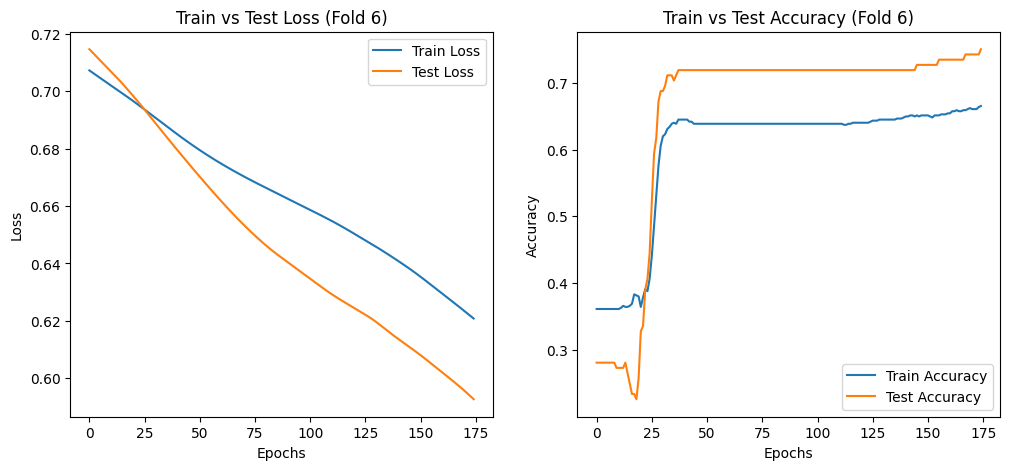

Train_loss: 0.7411307692527771  | Test_loss: 0.7450566291809082  | Train_accuracy: 0.350547730922699  | Test_accuracy: 0.3359375
Train_loss: 0.7315850257873535  | Test_loss: 0.7350459098815918  | Train_accuracy: 0.350547730922699  | Test_accuracy: 0.3359375
Train_loss: 0.7224298715591431  | Test_loss: 0.7252336740493774  | Train_accuracy: 0.350547730922699  | Test_accuracy: 0.3359375
Train_loss: 0.7138004302978516  | Test_loss: 0.7159336805343628  | Train_accuracy: 0.350547730922699  | Test_accuracy: 0.3359375
Train_loss: 0.7058192491531372  | Test_loss: 0.7074329853057861  | Train_accuracy: 0.350547730922699  | Test_accuracy: 0.3359375
Train_loss: 0.698238730430603  | Test_loss: 0.6991190910339355  | Train_accuracy: 0.3552425503730774  | Test_accuracy: 0.296875
Train_loss: 0.6906452775001526  | Test_loss: 0.6908586025238037  | Train_accuracy: 0.627543032169342  | Test_accuracy: 0.625
Train_loss: 0.6831541061401367  | Test_loss: 0.6828427314758301  | Train_accuracy: 0.6447574496269226 

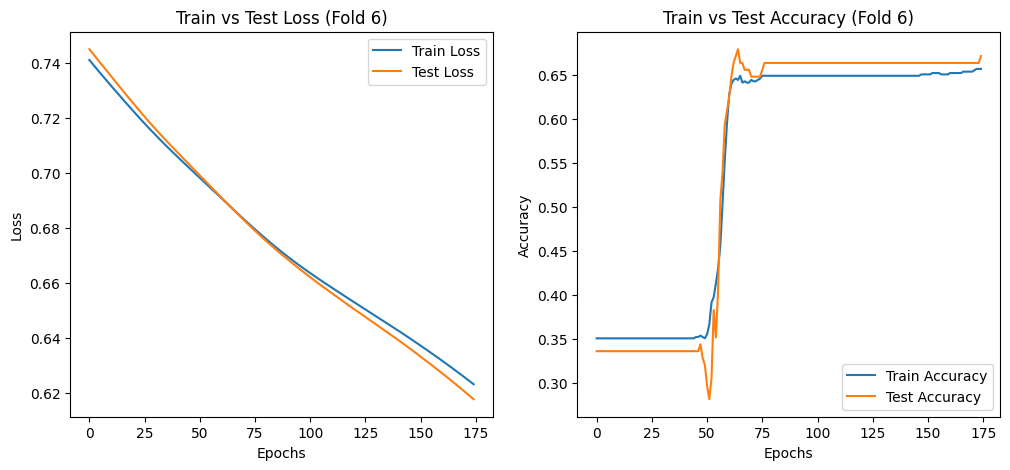

Train_loss: 0.6613897681236267  | Test_loss: 0.6882256269454956  | Train_accuracy: 0.6729264259338379  | Test_accuracy: 0.546875
Train_loss: 0.6582261919975281  | Test_loss: 0.6884874105453491  | Train_accuracy: 0.6729264259338379  | Test_accuracy: 0.546875
Train_loss: 0.6552269458770752  | Test_loss: 0.6890705823898315  | Train_accuracy: 0.6729264259338379  | Test_accuracy: 0.546875
Train_loss: 0.652417004108429  | Test_loss: 0.6899089217185974  | Train_accuracy: 0.6729264259338379  | Test_accuracy: 0.546875
Train_loss: 0.6497576236724854  | Test_loss: 0.6909127831459045  | Train_accuracy: 0.6729264259338379  | Test_accuracy: 0.546875
Train_loss: 0.6470495462417603  | Test_loss: 0.6919364929199219  | Train_accuracy: 0.6729264259338379  | Test_accuracy: 0.546875
Train_loss: 0.6446877121925354  | Test_loss: 0.6932403445243835  | Train_accuracy: 0.6729264259338379  | Test_accuracy: 0.546875
Train_loss: 0.6427578926086426  | Test_loss: 0.6947435140609741  | Train_accuracy: 0.6729264259338

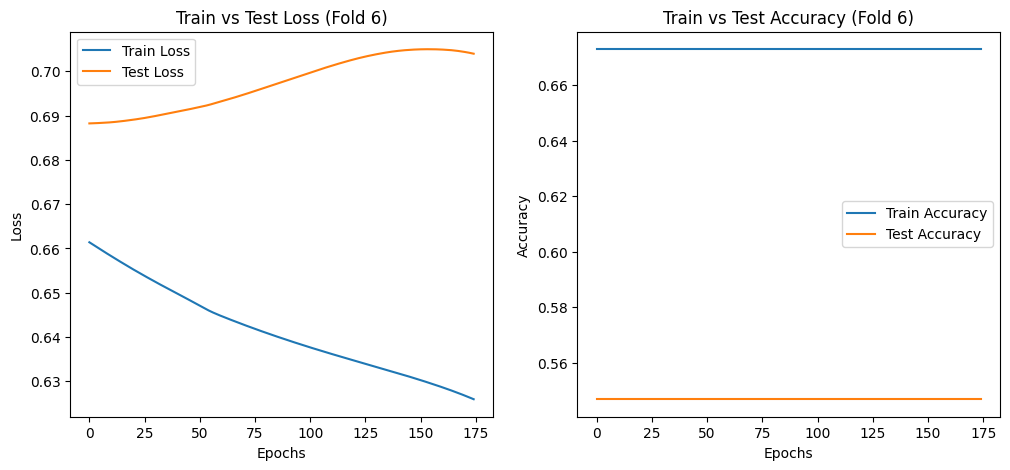

Train_loss: 0.7052483558654785  | Test_loss: 0.7070267200469971  | Train_accuracy: 0.3552425503730774  | Test_accuracy: 0.3046875
Train_loss: 0.6950745582580566  | Test_loss: 0.6932207345962524  | Train_accuracy: 0.3740219175815582  | Test_accuracy: 0.3984375
Train_loss: 0.6858864426612854  | Test_loss: 0.6799654960632324  | Train_accuracy: 0.6431924700737  | Test_accuracy: 0.6953125
Train_loss: 0.677873969078064  | Test_loss: 0.6678562164306641  | Train_accuracy: 0.6431924700737  | Test_accuracy: 0.6953125
Train_loss: 0.6711501479148865  | Test_loss: 0.6570358276367188  | Train_accuracy: 0.6431924700737  | Test_accuracy: 0.6953125
Train_loss: 0.6658338308334351  | Test_loss: 0.6478167772293091  | Train_accuracy: 0.6431924700737  | Test_accuracy: 0.6953125
Train_loss: 0.6619179248809814  | Test_loss: 0.6405395269393921  | Train_accuracy: 0.6431924700737  | Test_accuracy: 0.6953125
Train_loss: 0.6591460704803467  | Test_loss: 0.6352033615112305  | Train_accuracy: 0.6431924700737  | Test

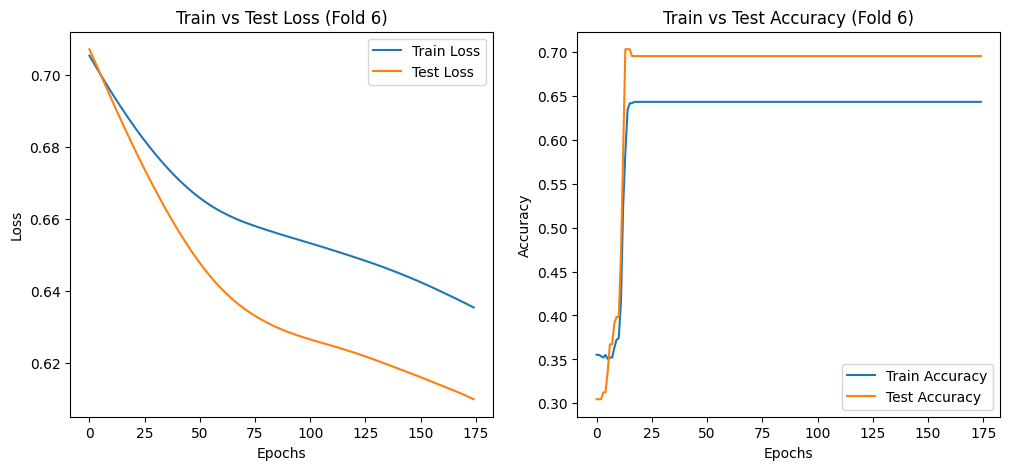

Train_loss: 0.6812080144882202  | Test_loss: 0.677981436252594  | Train_accuracy: 0.6484375  | Test_accuracy: 0.6692913174629211
Train_loss: 0.6761979460716248  | Test_loss: 0.6720051169395447  | Train_accuracy: 0.6484375  | Test_accuracy: 0.6692913174629211
Train_loss: 0.6715386509895325  | Test_loss: 0.6663838624954224  | Train_accuracy: 0.6484375  | Test_accuracy: 0.6692913174629211
Train_loss: 0.6670193076133728  | Test_loss: 0.6611561179161072  | Train_accuracy: 0.6484375  | Test_accuracy: 0.6692913174629211
Train_loss: 0.6623711585998535  | Test_loss: 0.655616044998169  | Train_accuracy: 0.6484375  | Test_accuracy: 0.6692913174629211
Train_loss: 0.6584186553955078  | Test_loss: 0.6511257290840149  | Train_accuracy: 0.6484375  | Test_accuracy: 0.6692913174629211
Train_loss: 0.655788242816925  | Test_loss: 0.6479175090789795  | Train_accuracy: 0.6484375  | Test_accuracy: 0.6692913174629211
Train_loss: 0.6528793573379517  | Test_loss: 0.6446523666381836  | Train_accuracy: 0.6484375 

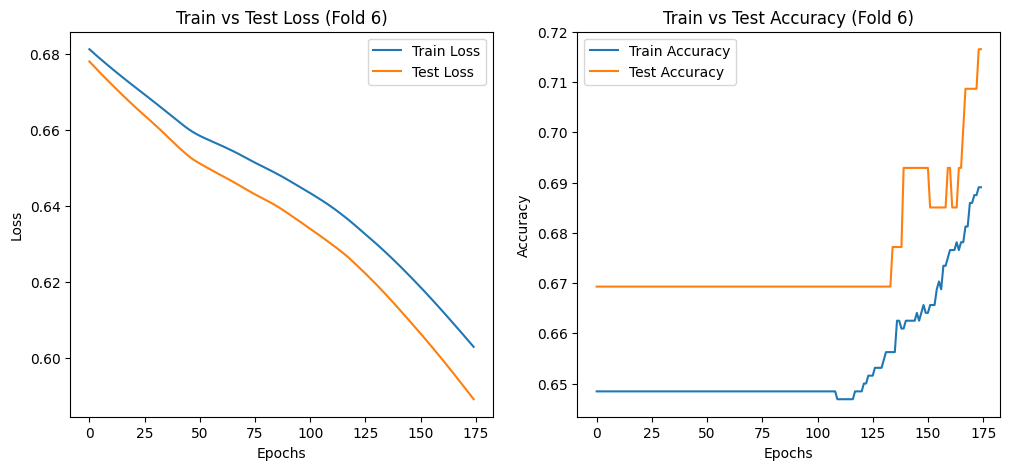

K=6: Average Final Test Loss = 0.6242721080780029, Average Test Accuracy = 0.6649954915046692
Train_loss: 0.6718501448631287  | Test_loss: 0.6825409531593323  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6641144156455994  | Test_loss: 0.6776068210601807  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6590952277183533  | Test_loss: 0.675529956817627  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6553371548652649  | Test_loss: 0.6742215752601624  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6519737243652344  | Test_loss: 0.6728305816650391  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6488341689109802  | Test_loss: 0.6712492108345032  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6455872654914856  | Test_loss: 0.669359564781189  | Train_a

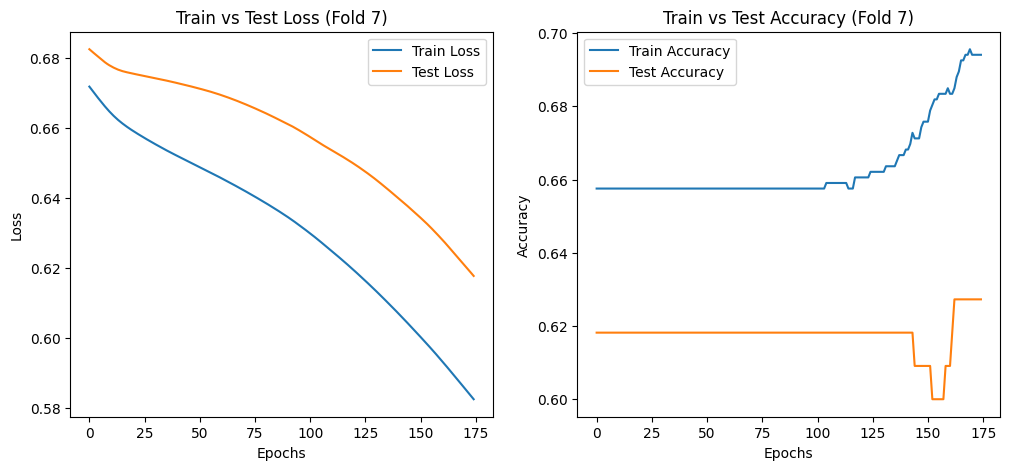

Train_loss: 0.7147312760353088  | Test_loss: 0.7201019525527954  | Train_accuracy: 0.3546423316001892  | Test_accuracy: 0.30909091234207153
Train_loss: 0.7092469334602356  | Test_loss: 0.7131602764129639  | Train_accuracy: 0.3546423316001892  | Test_accuracy: 0.30909091234207153
Train_loss: 0.7038792371749878  | Test_loss: 0.7061988115310669  | Train_accuracy: 0.3546423316001892  | Test_accuracy: 0.30909091234207153
Train_loss: 0.6984603404998779  | Test_loss: 0.6991032958030701  | Train_accuracy: 0.3546423316001892  | Test_accuracy: 0.30909091234207153
Train_loss: 0.6932824850082397  | Test_loss: 0.6922783851623535  | Train_accuracy: 0.5220699906349182  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6884100437164307  | Test_loss: 0.6855950355529785  | Train_accuracy: 0.6453576683998108  | Test_accuracy: 0.6909090876579285
Train_loss: 0.6835410594940186  | Test_loss: 0.6787651777267456  | Train_accuracy: 0.6453576683998108  | Test_accuracy: 0.6909090876579285
Train_loss: 0.678633928

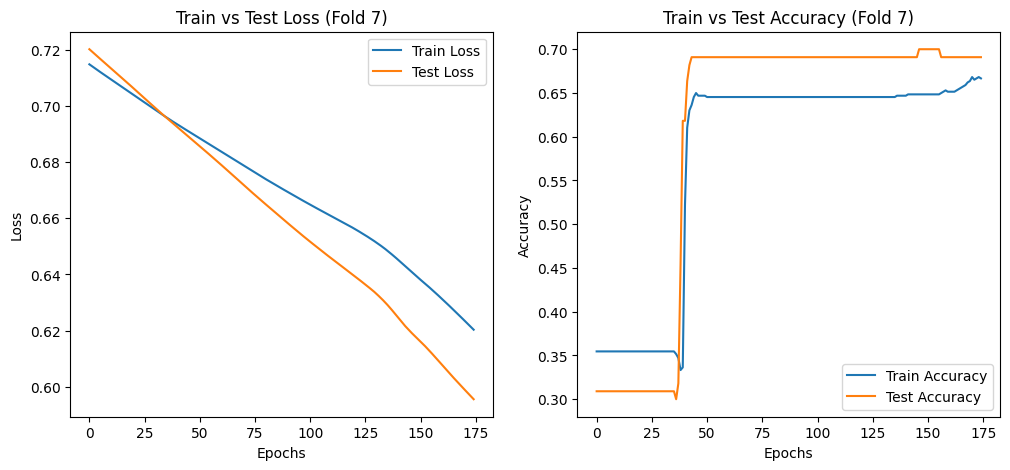

Train_loss: 0.656629204750061  | Test_loss: 0.6518001556396484  | Train_accuracy: 0.6499239206314087  | Test_accuracy: 0.663636326789856
Train_loss: 0.6555036306381226  | Test_loss: 0.650617241859436  | Train_accuracy: 0.6499239206314087  | Test_accuracy: 0.663636326789856
Train_loss: 0.6545015573501587  | Test_loss: 0.6495789289474487  | Train_accuracy: 0.6499239206314087  | Test_accuracy: 0.663636326789856
Train_loss: 0.6534419059753418  | Test_loss: 0.6483955979347229  | Train_accuracy: 0.6499239206314087  | Test_accuracy: 0.663636326789856
Train_loss: 0.6523071527481079  | Test_loss: 0.6472049951553345  | Train_accuracy: 0.6499239206314087  | Test_accuracy: 0.663636326789856
Train_loss: 0.6510517001152039  | Test_loss: 0.645901620388031  | Train_accuracy: 0.6499239206314087  | Test_accuracy: 0.663636326789856
Train_loss: 0.6496419310569763  | Test_loss: 0.6444592475891113  | Train_accuracy: 0.6499239206314087  | Test_accuracy: 0.663636326789856
Train_loss: 0.6481032371520996  | Tes

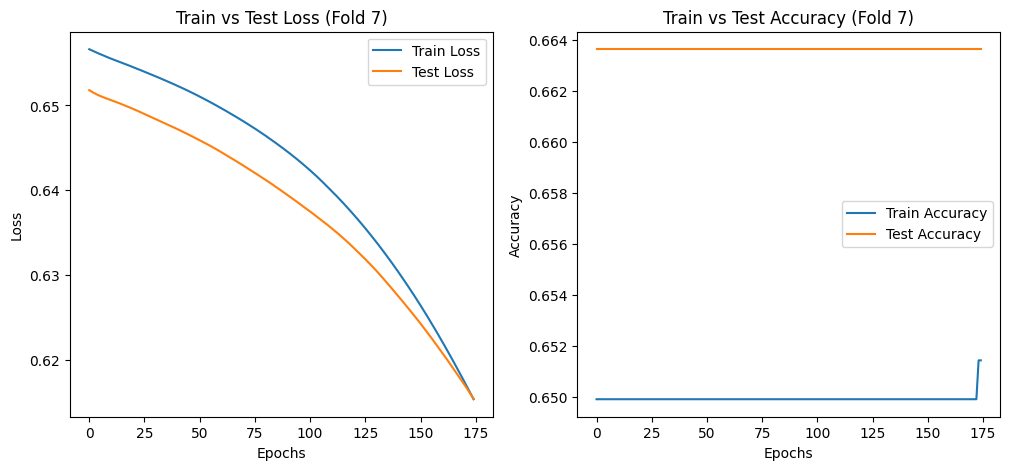

Train_loss: 0.6861753463745117  | Test_loss: 0.6886563301086426  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6820483207702637  | Test_loss: 0.6859098672866821  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6780332326889038  | Test_loss: 0.6832115054130554  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6741549968719482  | Test_loss: 0.6805968880653381  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6707492470741272  | Test_loss: 0.6784801483154297  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6675282120704651  | Test_loss: 0.6766871809959412  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.6643440127372742  | Test_loss: 0.675068199634552  | Train_accuracy: 0.6575342416763306  | Test_accuracy: 0.6181818246841431
Train_loss: 0.66123443841934

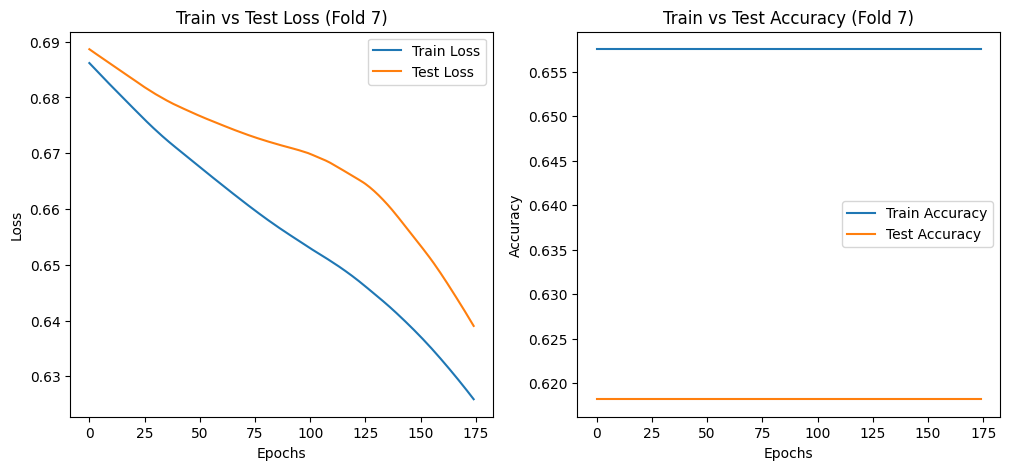

Train_loss: 0.7325233817100525  | Test_loss: 0.7227193117141724  | Train_accuracy: 0.3419452905654907  | Test_accuracy: 0.38532108068466187
Train_loss: 0.7240708470344543  | Test_loss: 0.7162293195724487  | Train_accuracy: 0.3419452905654907  | Test_accuracy: 0.38532108068466187
Train_loss: 0.7164990305900574  | Test_loss: 0.7104878425598145  | Train_accuracy: 0.3419452905654907  | Test_accuracy: 0.38532108068466187
Train_loss: 0.7094686627388  | Test_loss: 0.7052318453788757  | Train_accuracy: 0.3419452905654907  | Test_accuracy: 0.38532108068466187
Train_loss: 0.7024986147880554  | Test_loss: 0.7002550363540649  | Train_accuracy: 0.3419452905654907  | Test_accuracy: 0.38532108068466187
Train_loss: 0.6949437260627747  | Test_loss: 0.6951401233673096  | Train_accuracy: 0.3890577554702759  | Test_accuracy: 0.43119263648986816
Train_loss: 0.6870812773704529  | Test_loss: 0.6899443864822388  | Train_accuracy: 0.6504559516906738  | Test_accuracy: 0.60550457239151
Train_loss: 0.679473817348

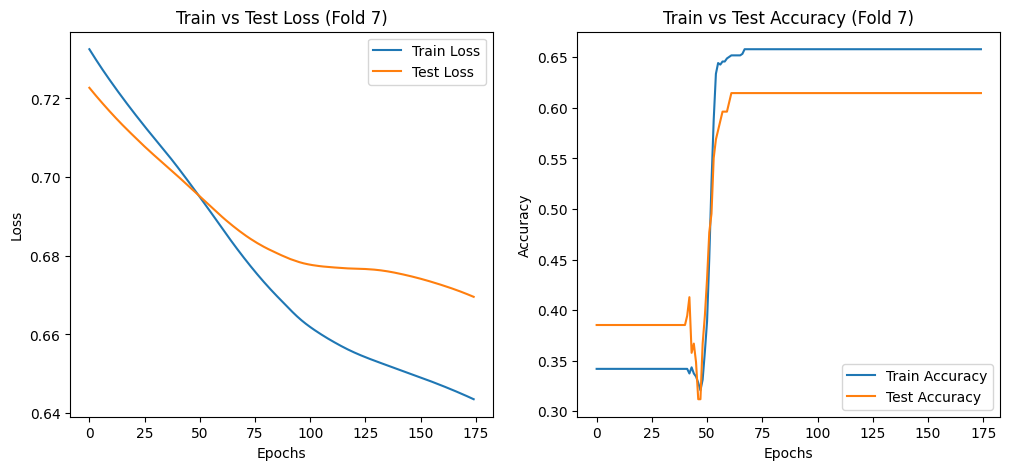

Train_loss: 0.7677526473999023  | Test_loss: 0.7975081205368042  | Train_accuracy: 0.35866260528564453  | Test_accuracy: 0.28440365195274353
Train_loss: 0.7562134265899658  | Test_loss: 0.7825456857681274  | Train_accuracy: 0.35866260528564453  | Test_accuracy: 0.28440365195274353
Train_loss: 0.7467012405395508  | Test_loss: 0.7697024941444397  | Train_accuracy: 0.35866260528564453  | Test_accuracy: 0.28440365195274353
Train_loss: 0.7382852435112  | Test_loss: 0.758024275302887  | Train_accuracy: 0.35866260528564453  | Test_accuracy: 0.28440365195274353
Train_loss: 0.7303823232650757  | Test_loss: 0.7470075488090515  | Train_accuracy: 0.35866260528564453  | Test_accuracy: 0.28440365195274353
Train_loss: 0.7226983308792114  | Test_loss: 0.7364522814750671  | Train_accuracy: 0.35866260528564453  | Test_accuracy: 0.28440365195274353
Train_loss: 0.7151181101799011  | Test_loss: 0.7260324954986572  | Train_accuracy: 0.35866260528564453  | Test_accuracy: 0.28440365195274353
Train_loss: 0.708

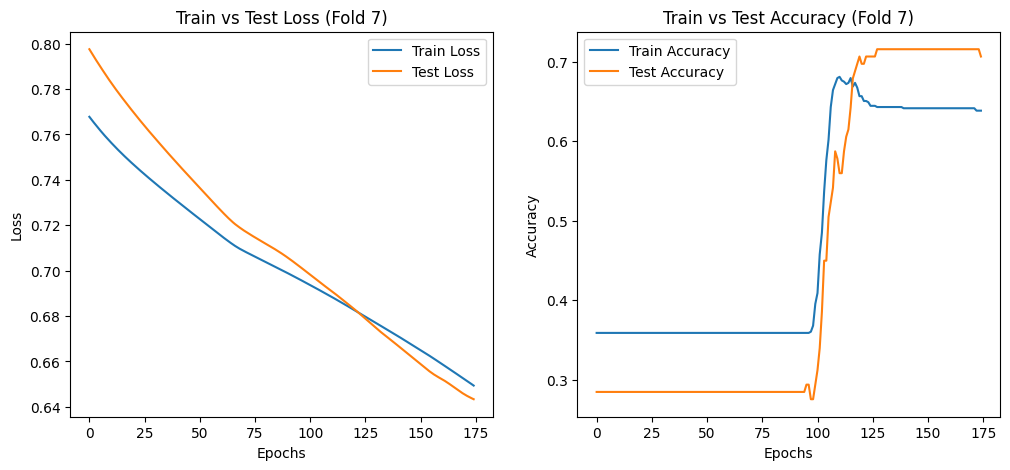

Train_loss: 0.6938761472702026  | Test_loss: 0.69298255443573  | Train_accuracy: 0.5151975750923157  | Test_accuracy: 0.5963302254676819
Train_loss: 0.6844773888587952  | Test_loss: 0.6843041777610779  | Train_accuracy: 0.6534954309463501  | Test_accuracy: 0.6422017812728882
Train_loss: 0.6759833097457886  | Test_loss: 0.6767691373825073  | Train_accuracy: 0.6534954309463501  | Test_accuracy: 0.6422017812728882
Train_loss: 0.6688119173049927  | Test_loss: 0.6707379817962646  | Train_accuracy: 0.6534954309463501  | Test_accuracy: 0.6422017812728882
Train_loss: 0.6631394028663635  | Test_loss: 0.6662671566009521  | Train_accuracy: 0.6534954309463501  | Test_accuracy: 0.6422017812728882
Train_loss: 0.6587870717048645  | Test_loss: 0.6629764437675476  | Train_accuracy: 0.6534954309463501  | Test_accuracy: 0.6422017812728882
Train_loss: 0.6553593873977661  | Test_loss: 0.6603038907051086  | Train_accuracy: 0.6534954309463501  | Test_accuracy: 0.6422017812728882
Train_loss: 0.652294814586639

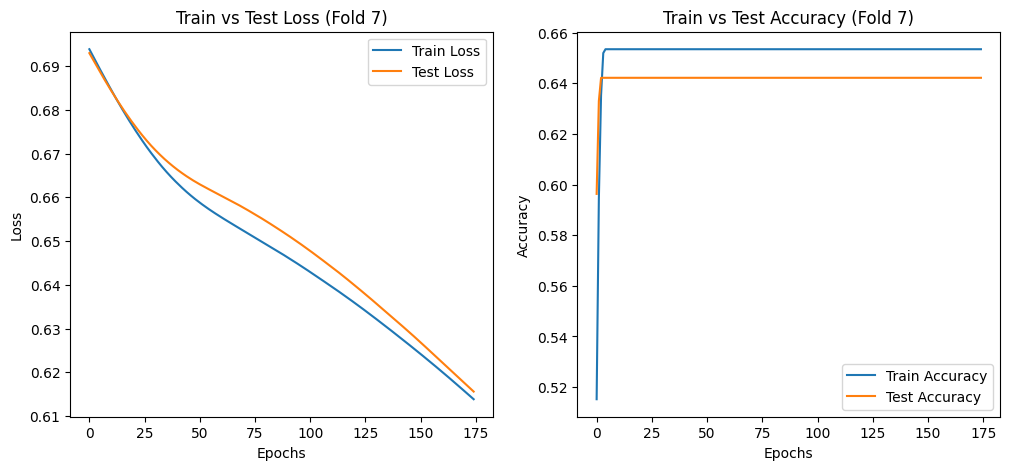

K=7: Average Final Test Loss = 0.6280496035303388, Average Test Accuracy = 0.6519003680774144
Train_loss: 0.6892092823982239  | Test_loss: 0.6895968317985535  | Train_accuracy: 0.6587183475494385  | Test_accuracy: 0.6354166865348816
Train_loss: 0.6822601556777954  | Test_loss: 0.6830925345420837  | Train_accuracy: 0.6542474031448364  | Test_accuracy: 0.6354166865348816
Train_loss: 0.6755555272102356  | Test_loss: 0.6768789291381836  | Train_accuracy: 0.6542474031448364  | Test_accuracy: 0.6354166865348816
Train_loss: 0.6689980030059814  | Test_loss: 0.6707324981689453  | Train_accuracy: 0.6542474031448364  | Test_accuracy: 0.6354166865348816
Train_loss: 0.6626140475273132  | Test_loss: 0.6647982597351074  | Train_accuracy: 0.6542474031448364  | Test_accuracy: 0.6354166865348816
Train_loss: 0.6567046046257019  | Test_loss: 0.6593183279037476  | Train_accuracy: 0.6542474031448364  | Test_accuracy: 0.6354166865348816
Train_loss: 0.6512145400047302  | Test_loss: 0.654403805732727  | Train_

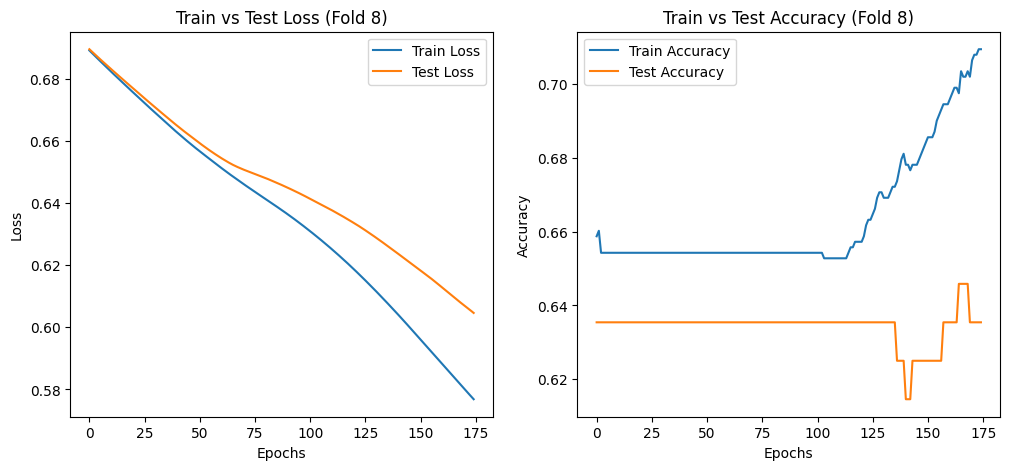

Train_loss: 0.7549163699150085  | Test_loss: 0.7555311918258667  | Train_accuracy: 0.34873324632644653  | Test_accuracy: 0.34375
Train_loss: 0.7481042146682739  | Test_loss: 0.7489635348320007  | Train_accuracy: 0.34873324632644653  | Test_accuracy: 0.34375
Train_loss: 0.7433111071586609  | Test_loss: 0.7444819211959839  | Train_accuracy: 0.34873324632644653  | Test_accuracy: 0.34375
Train_loss: 0.7389093041419983  | Test_loss: 0.7399603724479675  | Train_accuracy: 0.34873324632644653  | Test_accuracy: 0.34375
Train_loss: 0.7342348098754883  | Test_loss: 0.7351049184799194  | Train_accuracy: 0.34873324632644653  | Test_accuracy: 0.34375
Train_loss: 0.7291221022605896  | Test_loss: 0.7298024892807007  | Train_accuracy: 0.34873324632644653  | Test_accuracy: 0.34375
Train_loss: 0.7233732342720032  | Test_loss: 0.72381591796875  | Train_accuracy: 0.34873324632644653  | Test_accuracy: 0.34375
Train_loss: 0.7169539928436279  | Test_loss: 0.7172434329986572  | Train_accuracy: 0.34873324632644

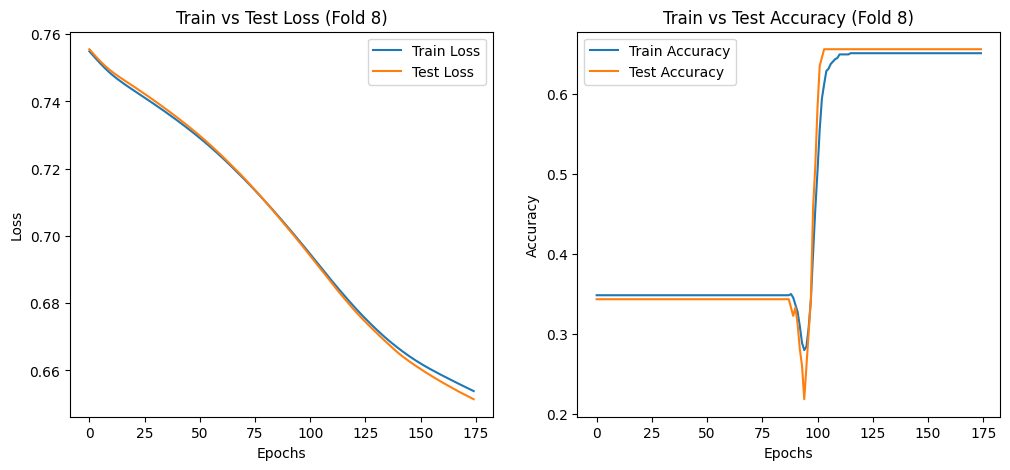

Train_loss: 0.7311835289001465  | Test_loss: 0.7343133687973022  | Train_accuracy: 0.3502235412597656  | Test_accuracy: 0.3333333432674408
Train_loss: 0.7249264121055603  | Test_loss: 0.7279248237609863  | Train_accuracy: 0.3502235412597656  | Test_accuracy: 0.3333333432674408
Train_loss: 0.7161721587181091  | Test_loss: 0.7184218168258667  | Train_accuracy: 0.3502235412597656  | Test_accuracy: 0.3333333432674408
Train_loss: 0.7049870491027832  | Test_loss: 0.7063729166984558  | Train_accuracy: 0.3457525968551636  | Test_accuracy: 0.2916666865348816
Train_loss: 0.6937627196311951  | Test_loss: 0.694131076335907  | Train_accuracy: 0.5186288952827454  | Test_accuracy: 0.5
Train_loss: 0.6835674047470093  | Test_loss: 0.6828097701072693  | Train_accuracy: 0.63338303565979  | Test_accuracy: 0.6666666865348816
Train_loss: 0.6750226616859436  | Test_loss: 0.6732101440429688  | Train_accuracy: 0.6408345699310303  | Test_accuracy: 0.6770833730697632
Train_loss: 0.6685206294059753  | Test_loss: 

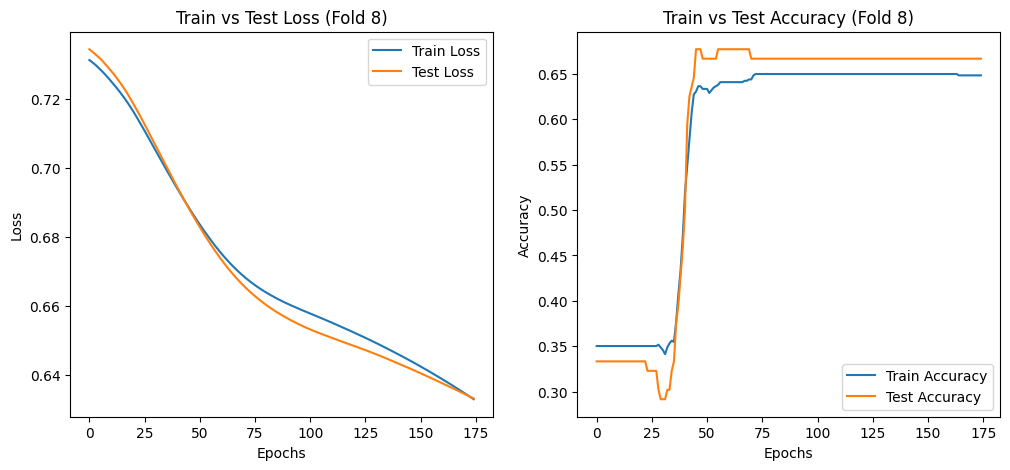

Train_loss: 0.7683573365211487  | Test_loss: 0.789411723613739  | Train_accuracy: 0.35618481040000916  | Test_accuracy: 0.2916666865348816
Train_loss: 0.7500948905944824  | Test_loss: 0.7662099599838257  | Train_accuracy: 0.35618481040000916  | Test_accuracy: 0.2916666865348816
Train_loss: 0.7320091724395752  | Test_loss: 0.7431368827819824  | Train_accuracy: 0.35618481040000916  | Test_accuracy: 0.2916666865348816
Train_loss: 0.7164757251739502  | Test_loss: 0.7228276133537292  | Train_accuracy: 0.35618481040000916  | Test_accuracy: 0.2916666865348816
Train_loss: 0.7033435106277466  | Test_loss: 0.7049216032028198  | Train_accuracy: 0.35618481040000916  | Test_accuracy: 0.2916666865348816
Train_loss: 0.6923502683639526  | Test_loss: 0.689522922039032  | Train_accuracy: 0.5558867454528809  | Test_accuracy: 0.6770833730697632
Train_loss: 0.6838575005531311  | Test_loss: 0.6777265071868896  | Train_accuracy: 0.6438152194023132  | Test_accuracy: 0.7083333730697632
Train_loss: 0.6771275997

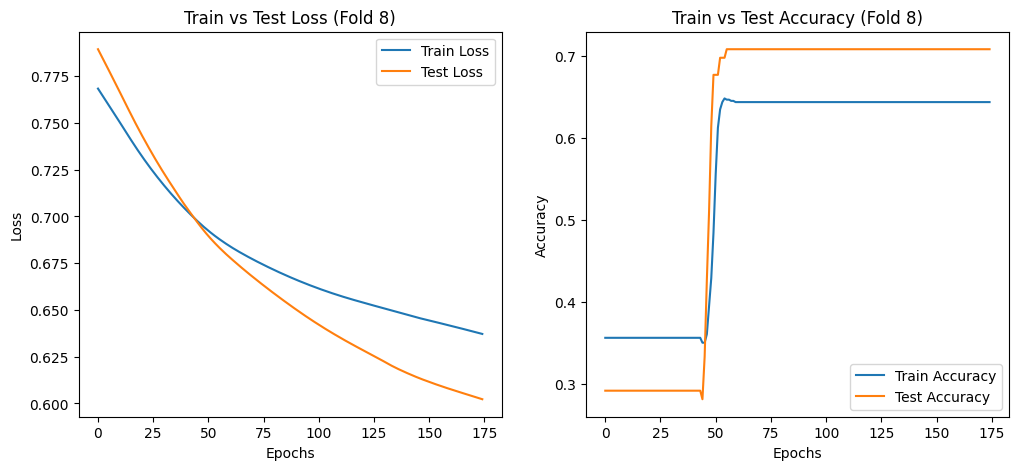

Train_loss: 0.6652204394340515  | Test_loss: 0.6879229545593262  | Train_accuracy: 0.6661698818206787  | Test_accuracy: 0.5520833730697632
Train_loss: 0.6606936454772949  | Test_loss: 0.6883298754692078  | Train_accuracy: 0.6661698818206787  | Test_accuracy: 0.5520833730697632
Train_loss: 0.6567761301994324  | Test_loss: 0.6890503764152527  | Train_accuracy: 0.6661698818206787  | Test_accuracy: 0.5520833730697632
Train_loss: 0.6533061265945435  | Test_loss: 0.6898335218429565  | Train_accuracy: 0.6661698818206787  | Test_accuracy: 0.5520833730697632
Train_loss: 0.6501712799072266  | Test_loss: 0.6906029582023621  | Train_accuracy: 0.6661698818206787  | Test_accuracy: 0.5520833730697632
Train_loss: 0.6471844911575317  | Test_loss: 0.6912292838096619  | Train_accuracy: 0.6661698818206787  | Test_accuracy: 0.5520833730697632
Train_loss: 0.6443096399307251  | Test_loss: 0.6914567947387695  | Train_accuracy: 0.6661698818206787  | Test_accuracy: 0.5520833730697632
Train_loss: 0.6415612101554

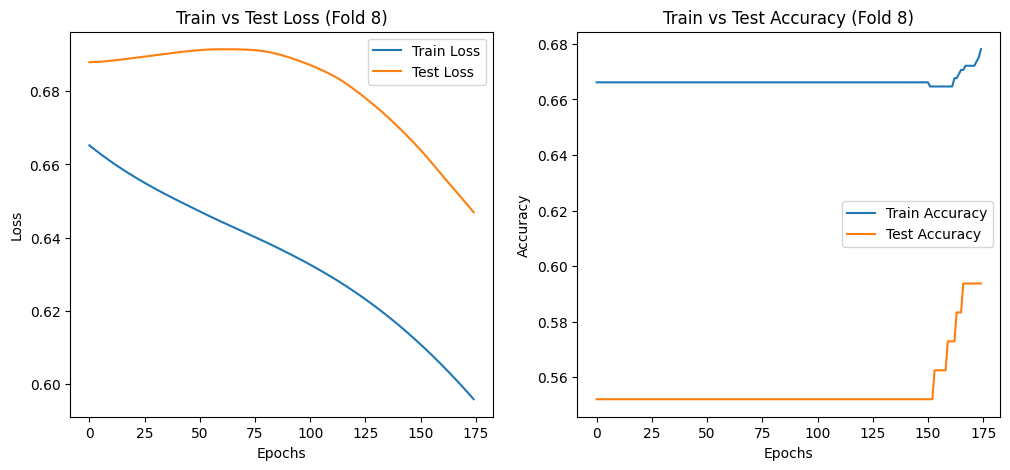

Train_loss: 0.6877561807632446  | Test_loss: 0.6876710653305054  | Train_accuracy: 0.6527571082115173  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6834180951118469  | Test_loss: 0.6835457682609558  | Train_accuracy: 0.6527571082115173  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6791359782218933  | Test_loss: 0.679448127746582  | Train_accuracy: 0.6527571082115173  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6748471856117249  | Test_loss: 0.6754064559936523  | Train_accuracy: 0.6527571082115173  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6704220771789551  | Test_loss: 0.671223521232605  | Train_accuracy: 0.6527571082115173  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6656625270843506  | Test_loss: 0.6668367385864258  | Train_accuracy: 0.6527571082115173  | Test_accuracy: 0.6458333730697632
Train_loss: 0.6606147885322571  | Test_loss: 0.6625466346740723  | Train_accuracy: 0.6527571082115173  | Test_accuracy: 0.6458333730697632
Train_loss: 0.655751824378967

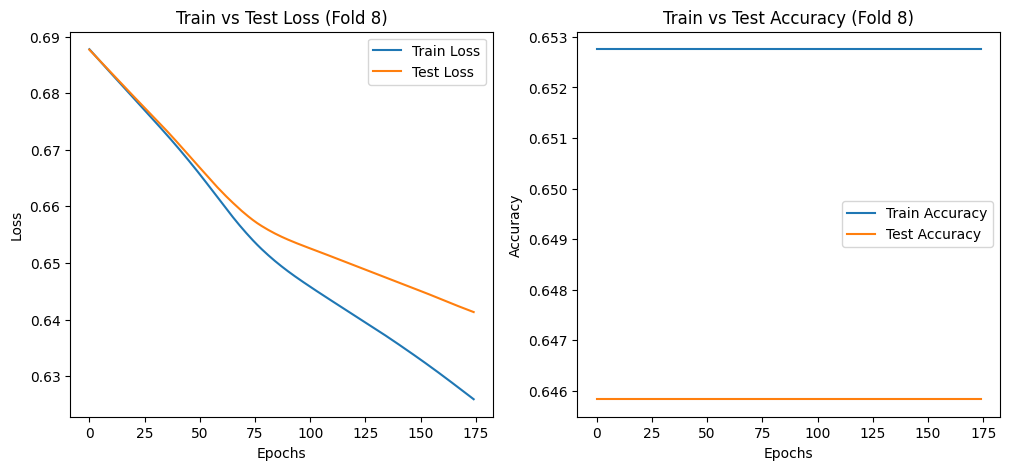

Train_loss: 0.6693388819694519  | Test_loss: 0.6530610918998718  | Train_accuracy: 0.6438152194023132  | Test_accuracy: 0.7083333730697632
Train_loss: 0.664955198764801  | Test_loss: 0.6457276344299316  | Train_accuracy: 0.6438152194023132  | Test_accuracy: 0.7083333730697632
Train_loss: 0.6617663502693176  | Test_loss: 0.6397401094436646  | Train_accuracy: 0.6438152194023132  | Test_accuracy: 0.7083333730697632
Train_loss: 0.659209668636322  | Test_loss: 0.6347051858901978  | Train_accuracy: 0.6438152194023132  | Test_accuracy: 0.7083333730697632
Train_loss: 0.6568924188613892  | Test_loss: 0.6306208372116089  | Train_accuracy: 0.6438152194023132  | Test_accuracy: 0.7083333730697632
Train_loss: 0.6548916101455688  | Test_loss: 0.6269559860229492  | Train_accuracy: 0.6438152194023132  | Test_accuracy: 0.7083333730697632
Train_loss: 0.6530893445014954  | Test_loss: 0.62358158826828  | Train_accuracy: 0.6438152194023132  | Test_accuracy: 0.7083333730697632
Train_loss: 0.6512869000434875 

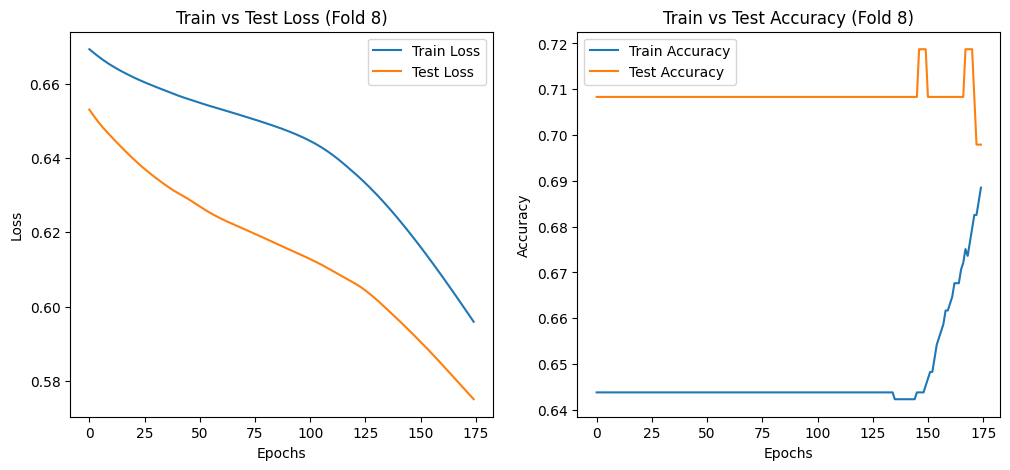

Train_loss: 0.710551917552948  | Test_loss: 0.7094047665596008  | Train_accuracy: 0.3467262089252472  | Test_accuracy: 0.35789474844932556
Train_loss: 0.7060787081718445  | Test_loss: 0.7052565217018127  | Train_accuracy: 0.3467262089252472  | Test_accuracy: 0.35789474844932556
Train_loss: 0.7019515037536621  | Test_loss: 0.7011614441871643  | Train_accuracy: 0.3467262089252472  | Test_accuracy: 0.35789474844932556
Train_loss: 0.697675347328186  | Test_loss: 0.6967014074325562  | Train_accuracy: 0.3467262089252472  | Test_accuracy: 0.35789474844932556
Train_loss: 0.6935102343559265  | Test_loss: 0.6925038695335388  | Train_accuracy: 0.361607164144516  | Test_accuracy: 0.378947377204895
Train_loss: 0.6893097758293152  | Test_loss: 0.6883622407913208  | Train_accuracy: 0.680059552192688  | Test_accuracy: 0.7263157963752747
Train_loss: 0.685001790523529  | Test_loss: 0.6840887069702148  | Train_accuracy: 0.6711309552192688  | Test_accuracy: 0.6631579399108887
Train_loss: 0.680538773536682

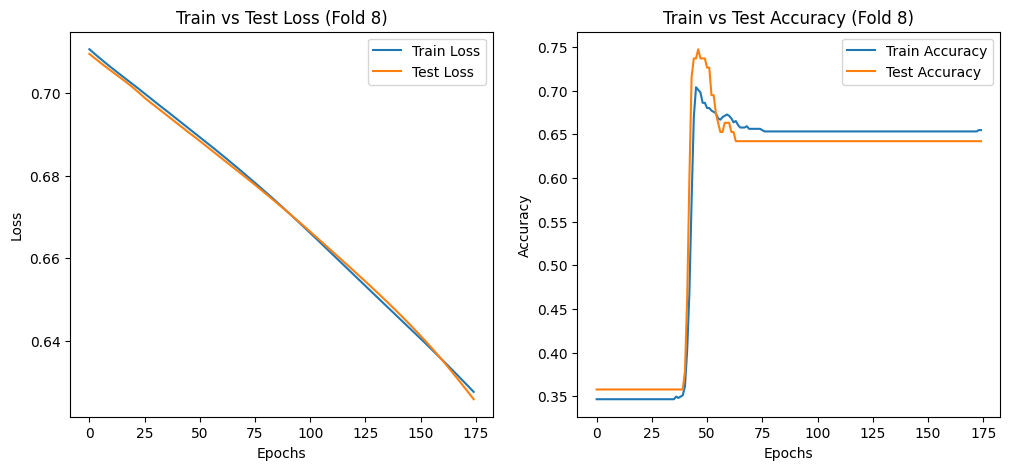

K=8: Average Final Test Loss = 0.6226069629192352, Average Test Accuracy = 0.655784010887146
Train_loss: 0.6575140357017517  | Test_loss: 0.6612939834594727  | Train_accuracy: 0.6534507870674133  | Test_accuracy: 0.6395348906517029
Train_loss: 0.6547712683677673  | Test_loss: 0.6593388319015503  | Train_accuracy: 0.6534507870674133  | Test_accuracy: 0.6395348906517029
Train_loss: 0.652203381061554  | Test_loss: 0.6575455665588379  | Train_accuracy: 0.6534507870674133  | Test_accuracy: 0.6395348906517029
Train_loss: 0.6498123407363892  | Test_loss: 0.6559095978736877  | Train_accuracy: 0.6534507870674133  | Test_accuracy: 0.6395348906517029
Train_loss: 0.647876501083374  | Test_loss: 0.6546348929405212  | Train_accuracy: 0.6534507870674133  | Test_accuracy: 0.6395348906517029
Train_loss: 0.6461368203163147  | Test_loss: 0.6534277200698853  | Train_accuracy: 0.6534507870674133  | Test_accuracy: 0.6395348906517029
Train_loss: 0.6442801356315613  | Test_loss: 0.6520540118217468  | Train_ac

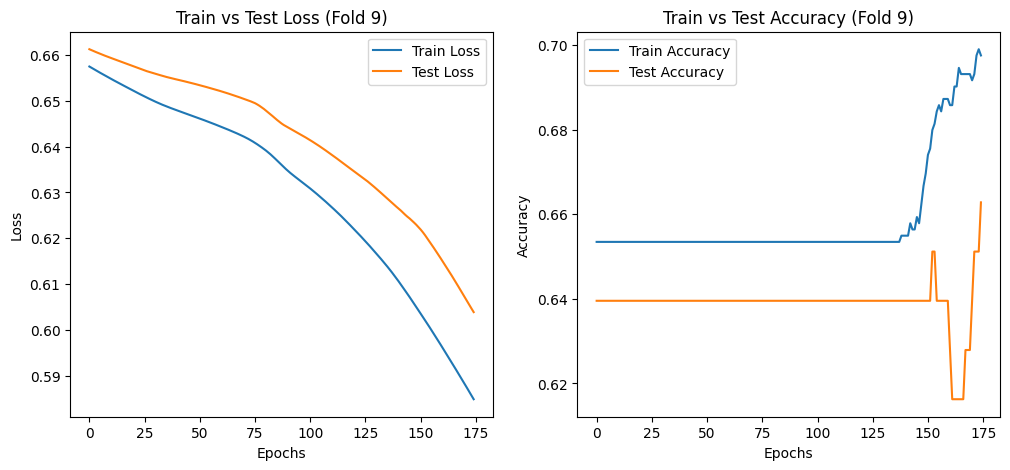

Train_loss: 0.73895263671875  | Test_loss: 0.7256268858909607  | Train_accuracy: 0.3421438932418823  | Test_accuracy: 0.39534884691238403
Train_loss: 0.7305975556373596  | Test_loss: 0.719338059425354  | Train_accuracy: 0.3421438932418823  | Test_accuracy: 0.39534884691238403
Train_loss: 0.7224472761154175  | Test_loss: 0.7132622599601746  | Train_accuracy: 0.3421438932418823  | Test_accuracy: 0.39534884691238403
Train_loss: 0.7141475677490234  | Test_loss: 0.7071945667266846  | Train_accuracy: 0.3421438932418823  | Test_accuracy: 0.39534884691238403
Train_loss: 0.7058801054954529  | Test_loss: 0.7009146809577942  | Train_accuracy: 0.3421438932418823  | Test_accuracy: 0.39534884691238403
Train_loss: 0.6975070238113403  | Test_loss: 0.6945644617080688  | Train_accuracy: 0.3832598924636841  | Test_accuracy: 0.41860464215278625
Train_loss: 0.6893132925033569  | Test_loss: 0.6887708902359009  | Train_accuracy: 0.6270191073417664  | Test_accuracy: 0.6395348906517029
Train_loss: 0.6818213462

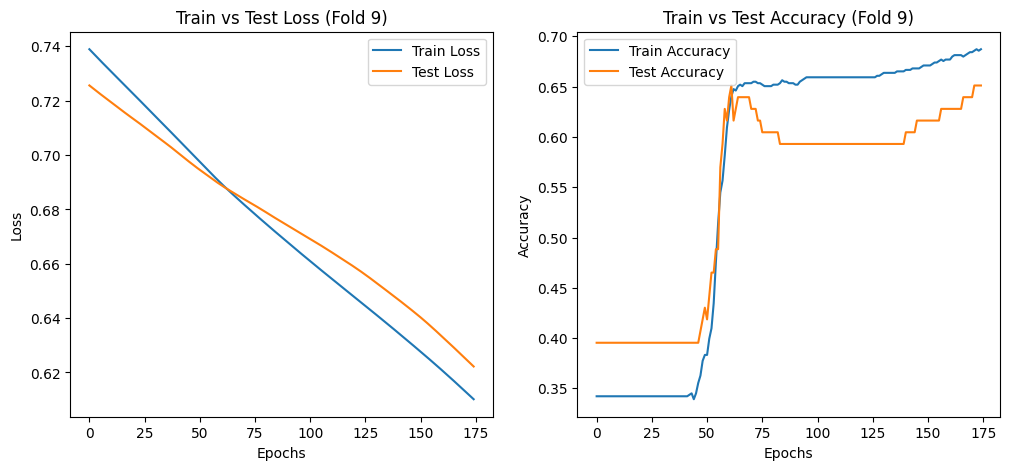

Train_loss: 0.7339721322059631  | Test_loss: 0.7608106136322021  | Train_accuracy: 0.36070382595062256  | Test_accuracy: 0.24705882370471954
Train_loss: 0.7293347120285034  | Test_loss: 0.7533835172653198  | Train_accuracy: 0.36070382595062256  | Test_accuracy: 0.24705882370471954
Train_loss: 0.7251740097999573  | Test_loss: 0.7466624975204468  | Train_accuracy: 0.36070382595062256  | Test_accuracy: 0.24705882370471954
Train_loss: 0.7213343977928162  | Test_loss: 0.7403640151023865  | Train_accuracy: 0.36070382595062256  | Test_accuracy: 0.24705882370471954
Train_loss: 0.7176703214645386  | Test_loss: 0.7343871593475342  | Train_accuracy: 0.36070382595062256  | Test_accuracy: 0.24705882370471954
Train_loss: 0.7141028046607971  | Test_loss: 0.7285480499267578  | Train_accuracy: 0.36070382595062256  | Test_accuracy: 0.24705882370471954
Train_loss: 0.7104609608650208  | Test_loss: 0.7229036688804626  | Train_accuracy: 0.36070382595062256  | Test_accuracy: 0.24705882370471954
Train_loss: 0

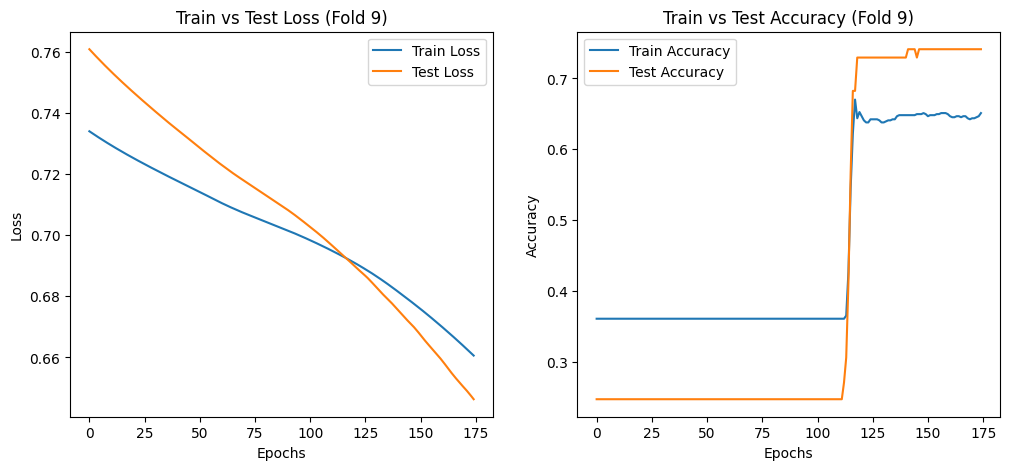

Train_loss: 0.6819509863853455  | Test_loss: 0.6820834279060364  | Train_accuracy: 0.6524926424026489  | Test_accuracy: 0.6470588445663452
Train_loss: 0.6779466867446899  | Test_loss: 0.6783755421638489  | Train_accuracy: 0.6524926424026489  | Test_accuracy: 0.6470588445663452
Train_loss: 0.6741795539855957  | Test_loss: 0.6750485897064209  | Train_accuracy: 0.6524926424026489  | Test_accuracy: 0.6470588445663452
Train_loss: 0.6709202527999878  | Test_loss: 0.672164261341095  | Train_accuracy: 0.6524926424026489  | Test_accuracy: 0.6470588445663452
Train_loss: 0.6677120923995972  | Test_loss: 0.6693806648254395  | Train_accuracy: 0.6524926424026489  | Test_accuracy: 0.6470588445663452
Train_loss: 0.6635258197784424  | Test_loss: 0.6656192541122437  | Train_accuracy: 0.6524926424026489  | Test_accuracy: 0.6470588445663452
Train_loss: 0.6597024202346802  | Test_loss: 0.6621741056442261  | Train_accuracy: 0.6524926424026489  | Test_accuracy: 0.6470588445663452
Train_loss: 0.65547525882720

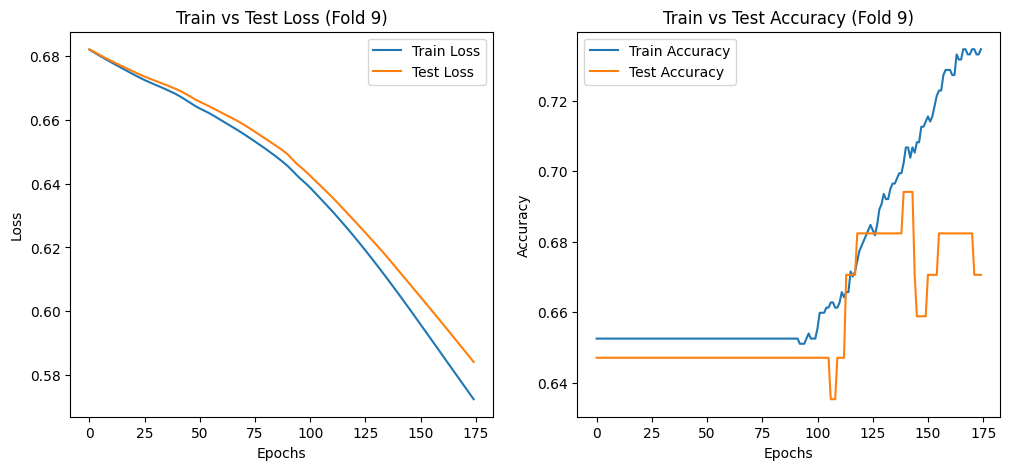

Train_loss: 0.696066677570343  | Test_loss: 0.6928461790084839  | Train_accuracy: 0.34457477927207947  | Test_accuracy: 0.43529412150382996
Train_loss: 0.6879417300224304  | Test_loss: 0.6888640522956848  | Train_accuracy: 0.6642228960990906  | Test_accuracy: 0.5882353186607361
Train_loss: 0.6809144616127014  | Test_loss: 0.6857505440711975  | Train_accuracy: 0.6598240733146667  | Test_accuracy: 0.5882353186607361
Train_loss: 0.6755549907684326  | Test_loss: 0.6834142208099365  | Train_accuracy: 0.6598240733146667  | Test_accuracy: 0.5882353186607361
Train_loss: 0.671105682849884  | Test_loss: 0.6814947128295898  | Train_accuracy: 0.6598240733146667  | Test_accuracy: 0.5882353186607361
Train_loss: 0.6671130061149597  | Test_loss: 0.6795918345451355  | Train_accuracy: 0.6598240733146667  | Test_accuracy: 0.5882353186607361
Train_loss: 0.6630632281303406  | Test_loss: 0.6776323914527893  | Train_accuracy: 0.6598240733146667  | Test_accuracy: 0.5882353186607361
Train_loss: 0.6589887738227

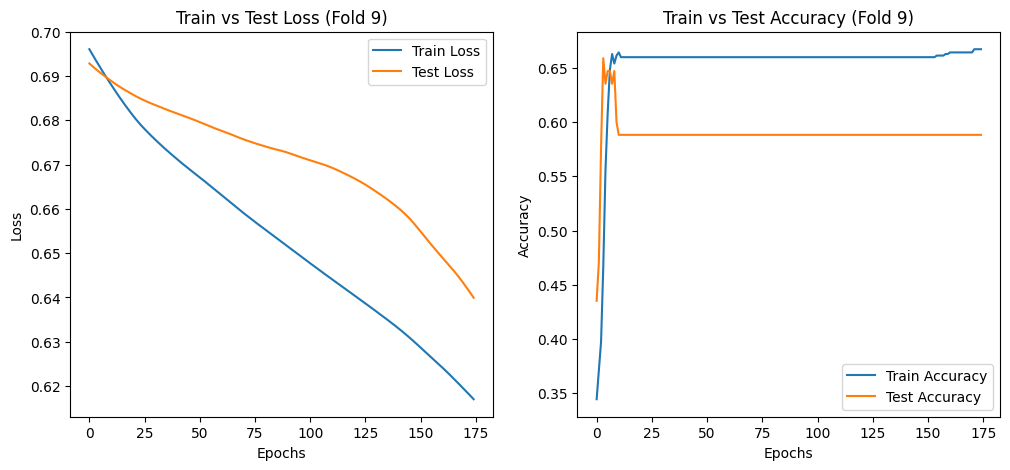

Train_loss: 0.7553598284721375  | Test_loss: 0.7323323488235474  | Train_accuracy: 0.34017595648765564  | Test_accuracy: 0.4117647111415863
Train_loss: 0.749365508556366  | Test_loss: 0.7282165884971619  | Train_accuracy: 0.34017595648765564  | Test_accuracy: 0.4117647111415863
Train_loss: 0.7432531714439392  | Test_loss: 0.7240679860115051  | Train_accuracy: 0.34017595648765564  | Test_accuracy: 0.4117647111415863
Train_loss: 0.7369445562362671  | Test_loss: 0.7198260426521301  | Train_accuracy: 0.34017595648765564  | Test_accuracy: 0.4117647111415863
Train_loss: 0.7304137349128723  | Test_loss: 0.7155361771583557  | Train_accuracy: 0.34017595648765564  | Test_accuracy: 0.4117647111415863
Train_loss: 0.7237682938575745  | Test_loss: 0.711279571056366  | Train_accuracy: 0.34017595648765564  | Test_accuracy: 0.4117647111415863
Train_loss: 0.71699458360672  | Test_loss: 0.707094132900238  | Train_accuracy: 0.34017595648765564  | Test_accuracy: 0.4117647111415863
Train_loss: 0.70997953414

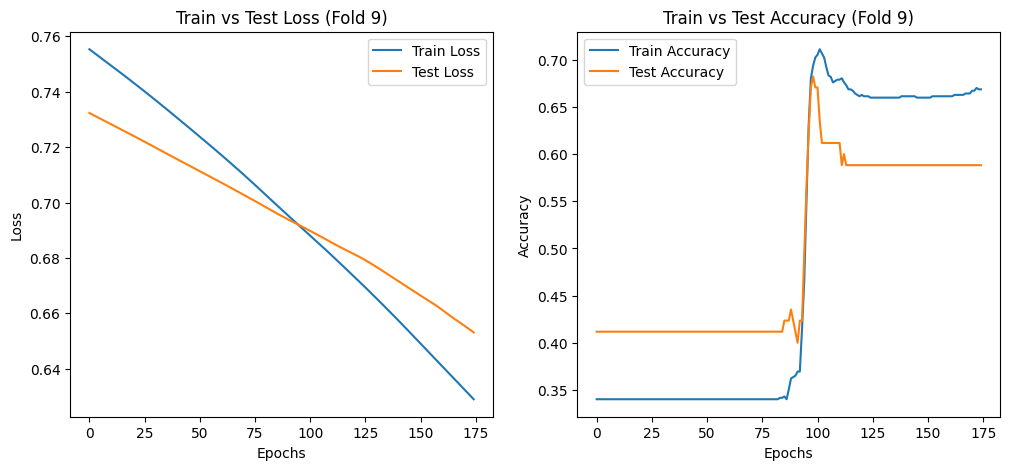

Train_loss: 0.6697736978530884  | Test_loss: 0.6640043258666992  | Train_accuracy: 0.6480938196182251  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6657934188842773  | Test_loss: 0.6594949960708618  | Train_accuracy: 0.6480938196182251  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6621952056884766  | Test_loss: 0.6551309823989868  | Train_accuracy: 0.6480938196182251  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6590368747711182  | Test_loss: 0.6512764096260071  | Train_accuracy: 0.6480938196182251  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6558759808540344  | Test_loss: 0.6476570963859558  | Train_accuracy: 0.6480938196182251  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6525501608848572  | Test_loss: 0.644126832485199  | Train_accuracy: 0.6480938196182251  | Test_accuracy: 0.6823529601097107
Train_loss: 0.6489877104759216  | Test_loss: 0.6406358480453491  | Train_accuracy: 0.6480938196182251  | Test_accuracy: 0.6823529601097107
Train_loss: 0.64512908458709

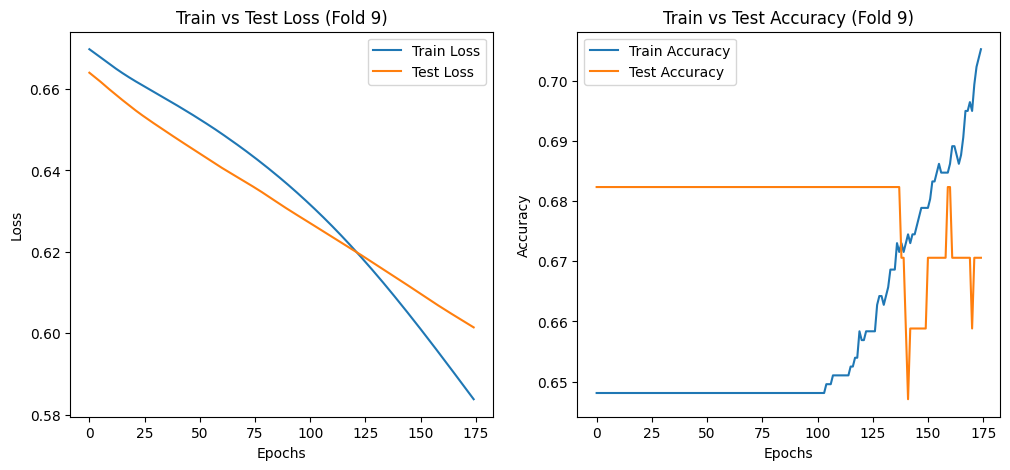

Train_loss: 0.7461755275726318  | Test_loss: 0.767729640007019  | Train_accuracy: 0.35777124762535095  | Test_accuracy: 0.2705882489681244
Train_loss: 0.735998809337616  | Test_loss: 0.7538806200027466  | Train_accuracy: 0.35777124762535095  | Test_accuracy: 0.2705882489681244
Train_loss: 0.7265509366989136  | Test_loss: 0.7403870224952698  | Train_accuracy: 0.35777124762535095  | Test_accuracy: 0.2705882489681244
Train_loss: 0.7168731093406677  | Test_loss: 0.7259753942489624  | Train_accuracy: 0.35777124762535095  | Test_accuracy: 0.2705882489681244
Train_loss: 0.7072533965110779  | Test_loss: 0.7111777663230896  | Train_accuracy: 0.35630497336387634  | Test_accuracy: 0.2705882489681244
Train_loss: 0.6978288292884827  | Test_loss: 0.6962952613830566  | Train_accuracy: 0.35483869910240173  | Test_accuracy: 0.47058823704719543
Train_loss: 0.6889159679412842  | Test_loss: 0.6813835501670837  | Train_accuracy: 0.6158357858657837  | Test_accuracy: 0.729411780834198
Train_loss: 0.680871307

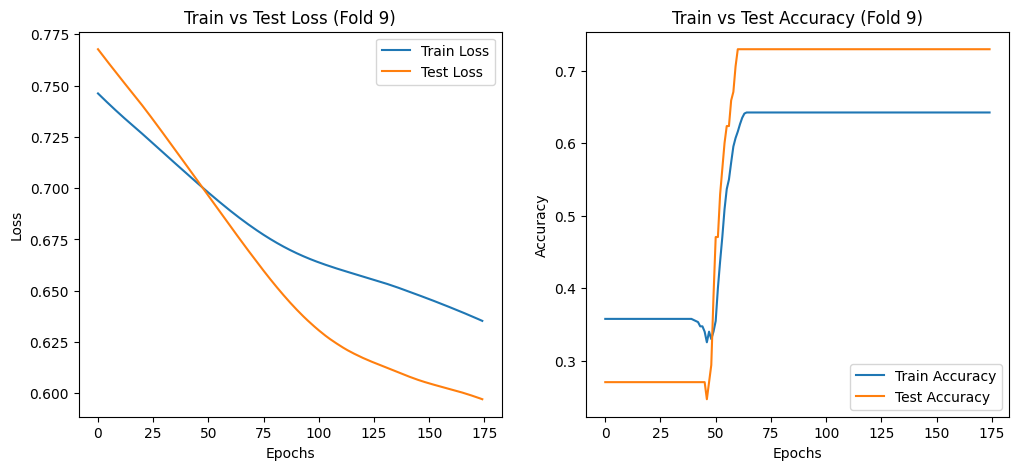

Train_loss: 0.6811091303825378  | Test_loss: 0.6825742721557617  | Train_accuracy: 0.6539589166641235  | Test_accuracy: 0.6352941393852234
Train_loss: 0.6746560335159302  | Test_loss: 0.6773101687431335  | Train_accuracy: 0.6539589166641235  | Test_accuracy: 0.6352941393852234
Train_loss: 0.6687483191490173  | Test_loss: 0.6726600527763367  | Train_accuracy: 0.6539589166641235  | Test_accuracy: 0.6352941393852234
Train_loss: 0.6631350517272949  | Test_loss: 0.667869508266449  | Train_accuracy: 0.6539589166641235  | Test_accuracy: 0.6352941393852234
Train_loss: 0.6578415036201477  | Test_loss: 0.6634699106216431  | Train_accuracy: 0.6539589166641235  | Test_accuracy: 0.6352941393852234
Train_loss: 0.653160810470581  | Test_loss: 0.6597139239311218  | Train_accuracy: 0.6539589166641235  | Test_accuracy: 0.6352941393852234
Train_loss: 0.648921549320221  | Test_loss: 0.6563137173652649  | Train_accuracy: 0.6539589166641235  | Test_accuracy: 0.6352941393852234
Train_loss: 0.6449277997016907

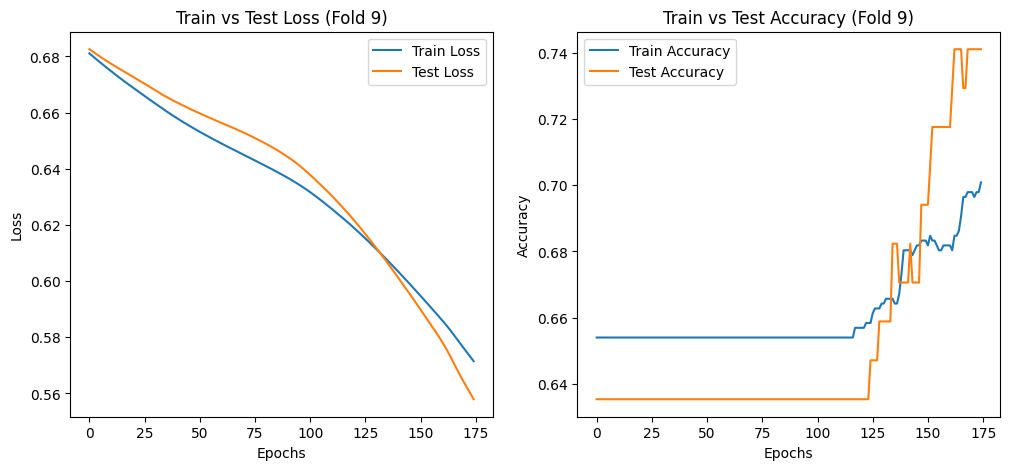

K=9: Average Final Test Loss = 0.6117860674858093, Average Test Accuracy = 0.6714850465456644
Train_loss: 0.6657737493515015  | Test_loss: 0.6633507013320923  | Train_accuracy: 0.6507246494293213  | Test_accuracy: 0.6623376607894897
Train_loss: 0.6618540287017822  | Test_loss: 0.6590706706047058  | Train_accuracy: 0.6507246494293213  | Test_accuracy: 0.6623376607894897
Train_loss: 0.6585783958435059  | Test_loss: 0.6554546356201172  | Train_accuracy: 0.6507246494293213  | Test_accuracy: 0.6623376607894897
Train_loss: 0.6558289527893066  | Test_loss: 0.6524019241333008  | Train_accuracy: 0.6507246494293213  | Test_accuracy: 0.6623376607894897
Train_loss: 0.6533522009849548  | Test_loss: 0.6496816873550415  | Train_accuracy: 0.6507246494293213  | Test_accuracy: 0.6623376607894897
Train_loss: 0.6511679291725159  | Test_loss: 0.6469736695289612  | Train_accuracy: 0.6507246494293213  | Test_accuracy: 0.6623376607894897
Train_loss: 0.6491920351982117  | Test_loss: 0.6444991230964661  | Train

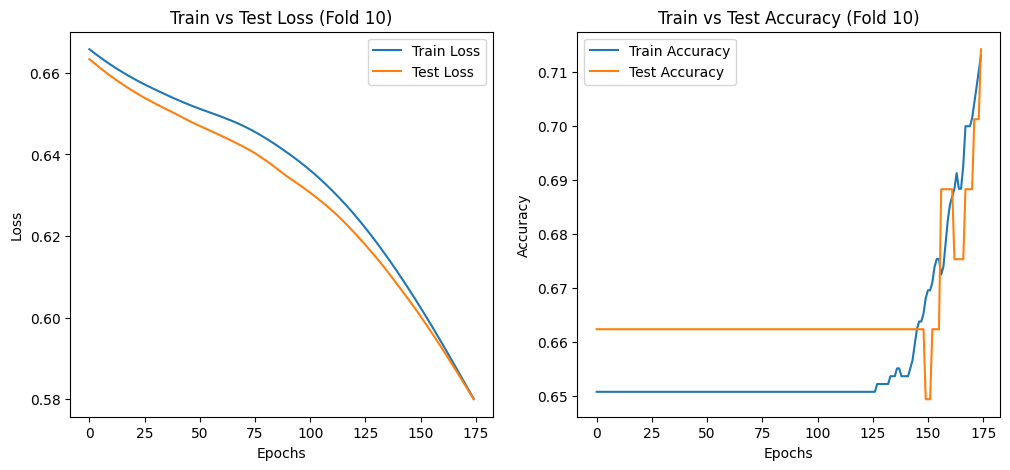

Train_loss: 0.6603967547416687  | Test_loss: 0.676891565322876  | Train_accuracy: 0.6579710245132446  | Test_accuracy: 0.5974025726318359
Train_loss: 0.6585739254951477  | Test_loss: 0.6764732003211975  | Train_accuracy: 0.6579710245132446  | Test_accuracy: 0.5974025726318359
Train_loss: 0.6567335724830627  | Test_loss: 0.6759606599807739  | Train_accuracy: 0.6579710245132446  | Test_accuracy: 0.5974025726318359
Train_loss: 0.6548649072647095  | Test_loss: 0.6754099726676941  | Train_accuracy: 0.6579710245132446  | Test_accuracy: 0.5974025726318359
Train_loss: 0.652900755405426  | Test_loss: 0.6748265624046326  | Train_accuracy: 0.6579710245132446  | Test_accuracy: 0.5974025726318359
Train_loss: 0.6507595777511597  | Test_loss: 0.6740341782569885  | Train_accuracy: 0.6579710245132446  | Test_accuracy: 0.5974025726318359
Train_loss: 0.6484158039093018  | Test_loss: 0.6729021668434143  | Train_accuracy: 0.6579710245132446  | Test_accuracy: 0.5974025726318359
Train_loss: 0.646046280860900

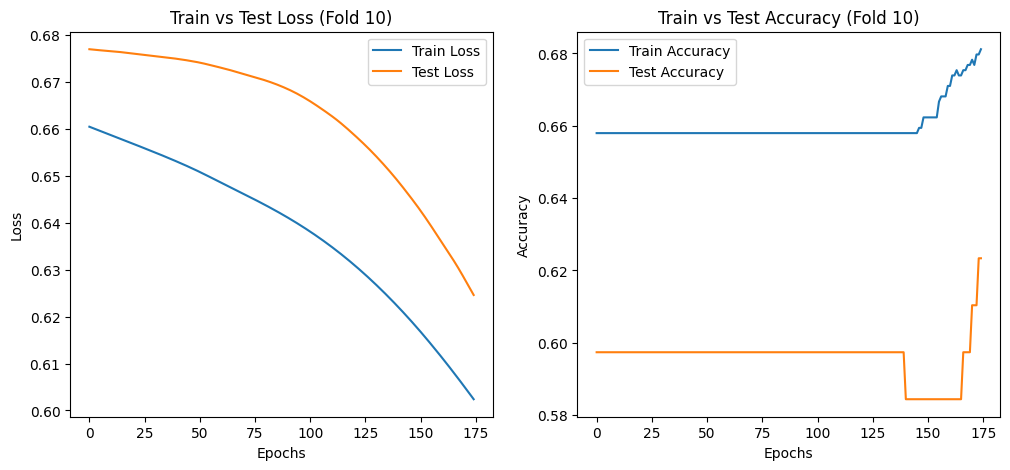

Train_loss: 0.6759799718856812  | Test_loss: 0.669464111328125  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6709764003753662  | Test_loss: 0.6615536212921143  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6666256189346313  | Test_loss: 0.6544710993766785  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6621862053871155  | Test_loss: 0.6474164724349976  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.656804621219635  | Test_loss: 0.6392967104911804  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6520495414733887  | Test_loss: 0.6312828660011292  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6479721665382385  | Test_loss: 0.6241329312324524  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6445465087890625  | Te

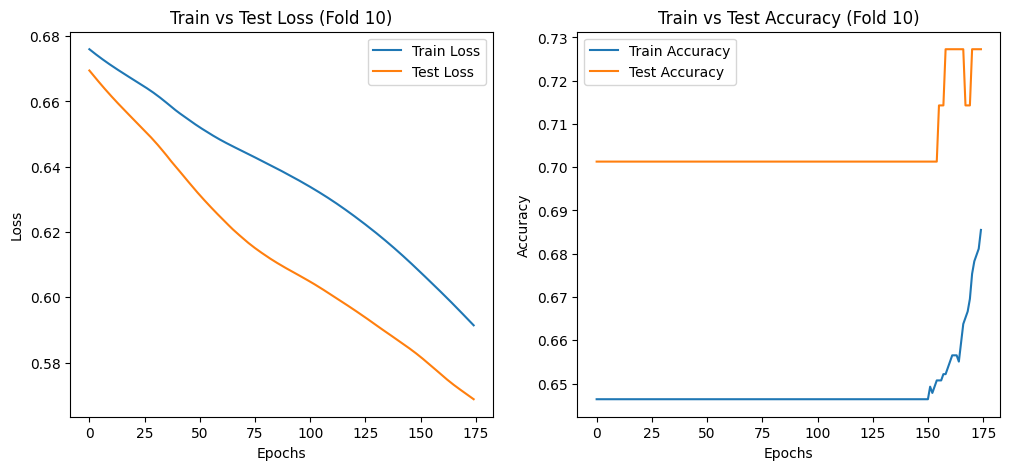

Train_loss: 0.7131352424621582  | Test_loss: 0.7157174348831177  | Train_accuracy: 0.35072463750839233  | Test_accuracy: 0.3246753215789795
Train_loss: 0.7108862996101379  | Test_loss: 0.7133389711380005  | Train_accuracy: 0.35072463750839233  | Test_accuracy: 0.3246753215789795
Train_loss: 0.7083476781845093  | Test_loss: 0.7104501724243164  | Train_accuracy: 0.35072463750839233  | Test_accuracy: 0.3246753215789795
Train_loss: 0.7050736546516418  | Test_loss: 0.706736147403717  | Train_accuracy: 0.35072463750839233  | Test_accuracy: 0.3246753215789795
Train_loss: 0.7011901140213013  | Test_loss: 0.702254056930542  | Train_accuracy: 0.3492753803730011  | Test_accuracy: 0.31168830394744873
Train_loss: 0.6966922879219055  | Test_loss: 0.6973590850830078  | Train_accuracy: 0.31594204902648926  | Test_accuracy: 0.2467532455921173
Train_loss: 0.6917709708213806  | Test_loss: 0.6919887661933899  | Train_accuracy: 0.626086950302124  | Test_accuracy: 0.6233766078948975
Train_loss: 0.6865326166

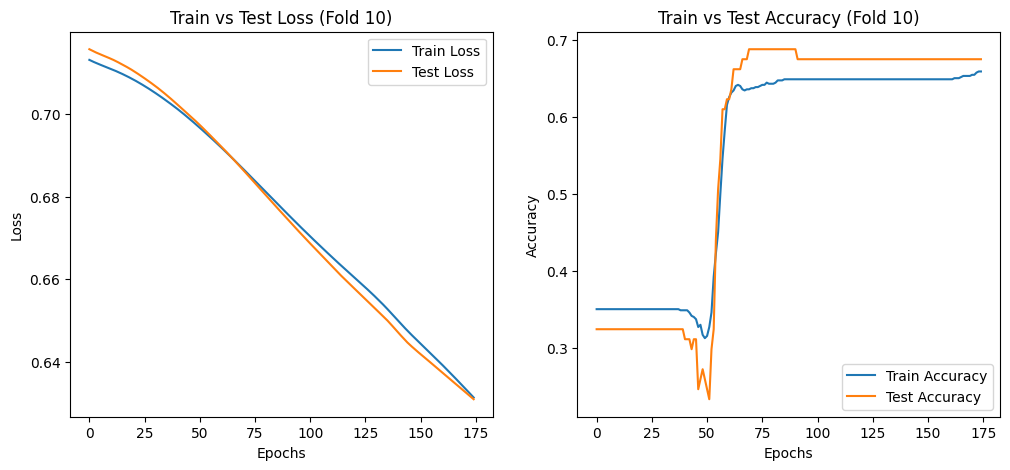

Train_loss: 0.6888263821601868  | Test_loss: 0.6852855682373047  | Train_accuracy: 0.6753623485565186  | Test_accuracy: 0.7532467246055603
Train_loss: 0.6825768947601318  | Test_loss: 0.6768088936805725  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6767715215682983  | Test_loss: 0.6688787341117859  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6705793738365173  | Test_loss: 0.660061776638031  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.665672779083252  | Test_loss: 0.6527001261711121  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6615787744522095  | Test_loss: 0.646113932132721  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6581011414527893  | Test_loss: 0.6403583884239197  | Train_accuracy: 0.6463768482208252  | Test_accuracy: 0.701298713684082
Train_loss: 0.6552162170410156  | Te

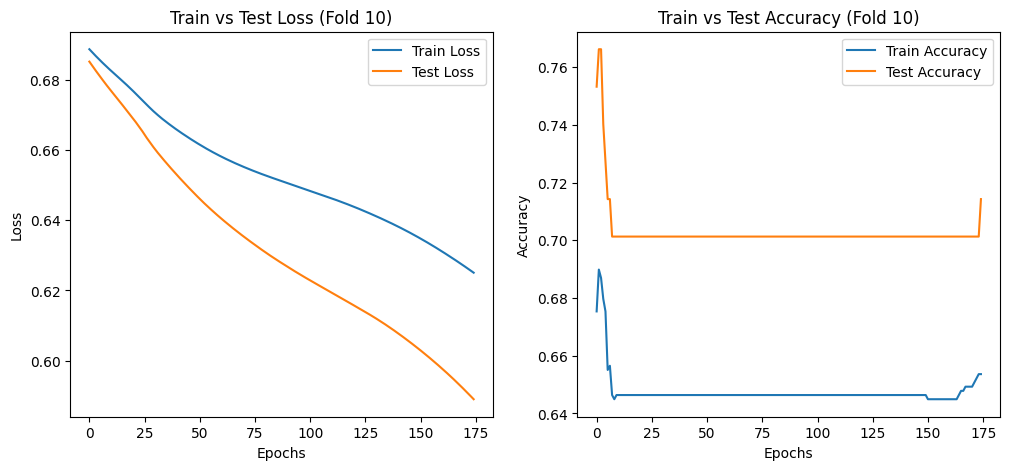

Train_loss: 0.7371065020561218  | Test_loss: 0.7170231938362122  | Train_accuracy: 0.3391304612159729  | Test_accuracy: 0.4285714328289032
Train_loss: 0.7242419719696045  | Test_loss: 0.7097575068473816  | Train_accuracy: 0.3391304612159729  | Test_accuracy: 0.4285714328289032
Train_loss: 0.7148330807685852  | Test_loss: 0.7049407958984375  | Train_accuracy: 0.3391304612159729  | Test_accuracy: 0.4285714328289032
Train_loss: 0.7071420550346375  | Test_loss: 0.7011939883232117  | Train_accuracy: 0.34057971835136414  | Test_accuracy: 0.41558441519737244
Train_loss: 0.6999076008796692  | Test_loss: 0.6978694796562195  | Train_accuracy: 0.31594204902648926  | Test_accuracy: 0.3636363744735718
Train_loss: 0.6931928396224976  | Test_loss: 0.694830060005188  | Train_accuracy: 0.5478261113166809  | Test_accuracy: 0.5454545617103577
Train_loss: 0.6875184774398804  | Test_loss: 0.69280606508255  | Train_accuracy: 0.6521739363670349  | Test_accuracy: 0.5584415793418884
Train_loss: 0.6827977895736

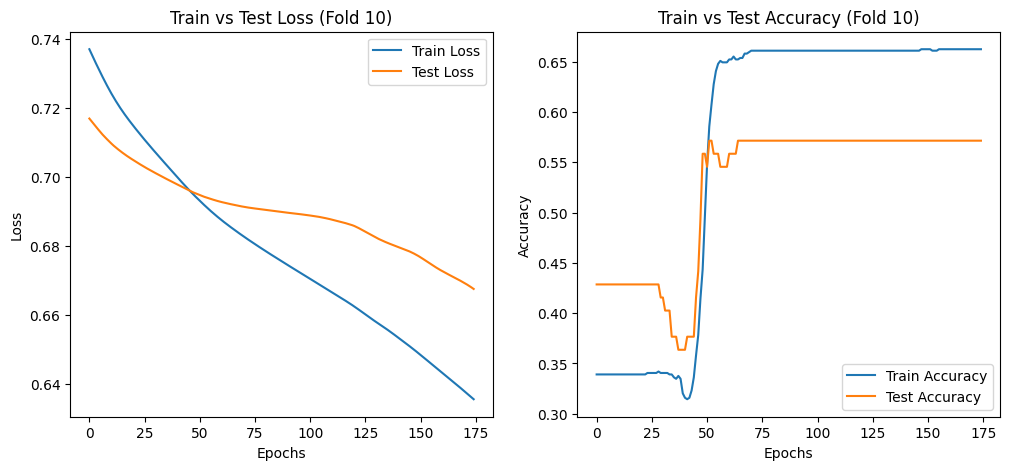

Train_loss: 0.7067534923553467  | Test_loss: 0.7018871307373047  | Train_accuracy: 0.34057971835136414  | Test_accuracy: 0.41558441519737244
Train_loss: 0.7018924355506897  | Test_loss: 0.6988034248352051  | Train_accuracy: 0.34057971835136414  | Test_accuracy: 0.41558441519737244
Train_loss: 0.6984265446662903  | Test_loss: 0.6964731216430664  | Train_accuracy: 0.34057971835136414  | Test_accuracy: 0.41558441519737244
Train_loss: 0.6958924531936646  | Test_loss: 0.6948636770248413  | Train_accuracy: 0.34057971835136414  | Test_accuracy: 0.41558441519737244
Train_loss: 0.6940704584121704  | Test_loss: 0.6937606334686279  | Train_accuracy: 0.34057971835136414  | Test_accuracy: 0.41558441519737244
Train_loss: 0.6924514174461365  | Test_loss: 0.6928486824035645  | Train_accuracy: 0.6521739363670349  | Test_accuracy: 0.5584415793418884
Train_loss: 0.6909168362617493  | Test_loss: 0.6920167207717896  | Train_accuracy: 0.6492753624916077  | Test_accuracy: 0.5714285969734192
Train_loss: 0.689

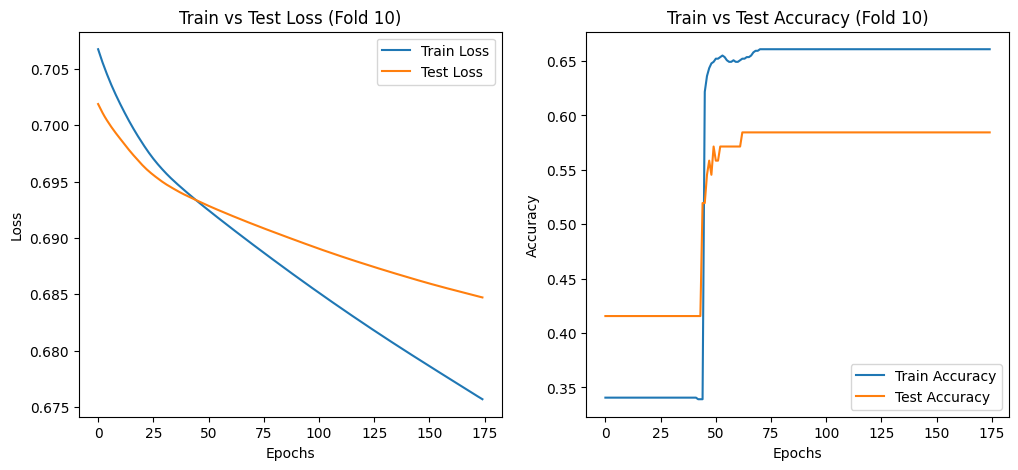

Train_loss: 0.6921759843826294  | Test_loss: 0.6895119547843933  | Train_accuracy: 0.6497828960418701  | Test_accuracy: 0.6710526347160339
Train_loss: 0.6858168840408325  | Test_loss: 0.6823777556419373  | Train_accuracy: 0.6497828960418701  | Test_accuracy: 0.6710526347160339
Train_loss: 0.6794312596321106  | Test_loss: 0.6751615405082703  | Train_accuracy: 0.6497828960418701  | Test_accuracy: 0.6710526347160339
Train_loss: 0.6734126806259155  | Test_loss: 0.6681956052780151  | Train_accuracy: 0.6497828960418701  | Test_accuracy: 0.6710526347160339
Train_loss: 0.6680044531822205  | Test_loss: 0.6619481444358826  | Train_accuracy: 0.6497828960418701  | Test_accuracy: 0.6710526347160339
Train_loss: 0.6634836792945862  | Test_loss: 0.6566713452339172  | Train_accuracy: 0.6497828960418701  | Test_accuracy: 0.6710526347160339
Train_loss: 0.6599055528640747  | Test_loss: 0.6525412201881409  | Train_accuracy: 0.6497828960418701  | Test_accuracy: 0.6710526347160339
Train_loss: 0.6570973396301

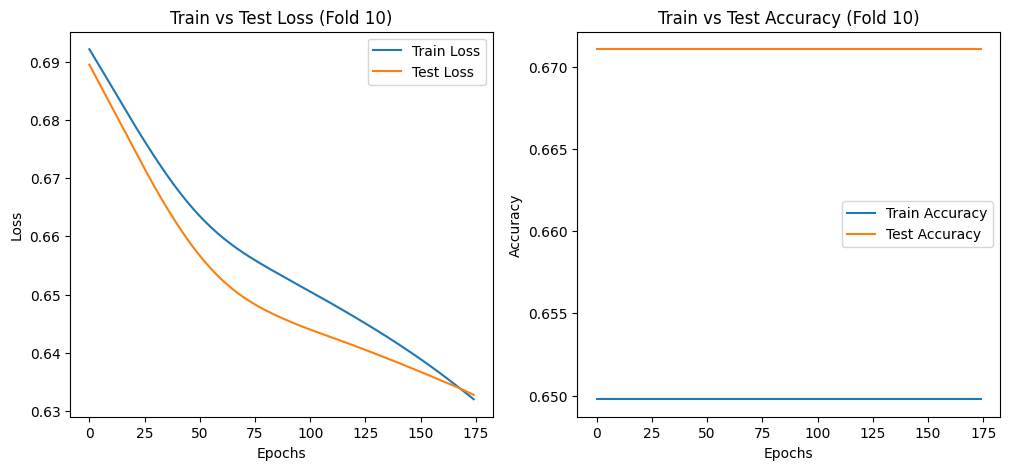

Train_loss: 0.7462688088417053  | Test_loss: 0.7653679847717285  | Train_accuracy: 0.3545585870742798  | Test_accuracy: 0.28947368264198303
Train_loss: 0.7393636703491211  | Test_loss: 0.7561823725700378  | Train_accuracy: 0.3545585870742798  | Test_accuracy: 0.28947368264198303
Train_loss: 0.7321963310241699  | Test_loss: 0.7463911175727844  | Train_accuracy: 0.3545585870742798  | Test_accuracy: 0.28947368264198303
Train_loss: 0.7245933413505554  | Test_loss: 0.7360199093818665  | Train_accuracy: 0.3545585870742798  | Test_accuracy: 0.28947368264198303
Train_loss: 0.7163454294204712  | Test_loss: 0.724509596824646  | Train_accuracy: 0.3545585870742798  | Test_accuracy: 0.28947368264198303
Train_loss: 0.7074916958808899  | Test_loss: 0.7118942737579346  | Train_accuracy: 0.3545585870742798  | Test_accuracy: 0.28947368264198303
Train_loss: 0.698506772518158  | Test_loss: 0.698535144329071  | Train_accuracy: 0.3719247281551361  | Test_accuracy: 0.3684210479259491
Train_loss: 0.6893690228

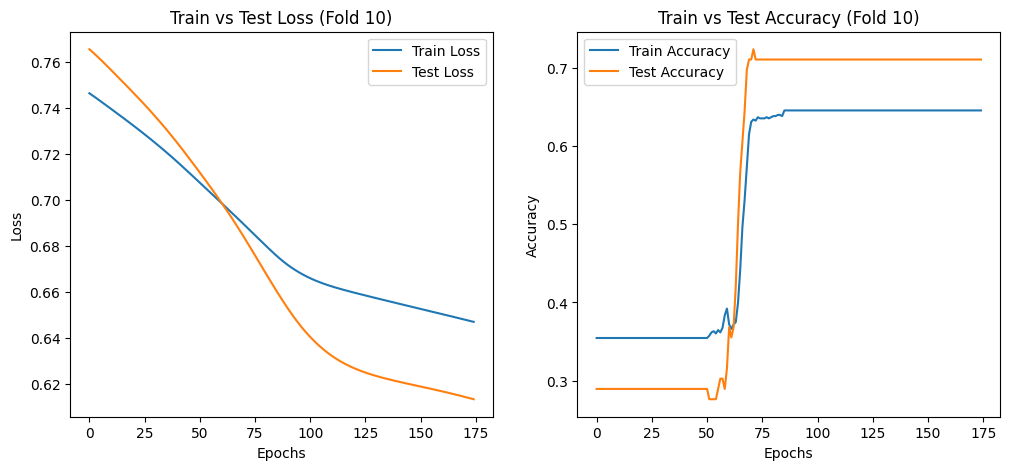

Train_loss: 0.7438291311264038  | Test_loss: 0.7402872443199158  | Train_accuracy: 0.3473227024078369  | Test_accuracy: 0.3552631735801697
Train_loss: 0.736372709274292  | Test_loss: 0.7335333824157715  | Train_accuracy: 0.3473227024078369  | Test_accuracy: 0.3552631735801697
Train_loss: 0.7298885583877563  | Test_loss: 0.7273458242416382  | Train_accuracy: 0.3473227024078369  | Test_accuracy: 0.3552631735801697
Train_loss: 0.723701536655426  | Test_loss: 0.7214709520339966  | Train_accuracy: 0.3473227024078369  | Test_accuracy: 0.3552631735801697
Train_loss: 0.7176890969276428  | Test_loss: 0.7156786918640137  | Train_accuracy: 0.3473227024078369  | Test_accuracy: 0.3552631735801697
Train_loss: 0.7116685509681702  | Test_loss: 0.7098726034164429  | Train_accuracy: 0.3473227024078369  | Test_accuracy: 0.3552631735801697
Train_loss: 0.7054969668388367  | Test_loss: 0.7039039134979248  | Train_accuracy: 0.3473227024078369  | Test_accuracy: 0.3552631735801697
Train_loss: 0.699080049991607

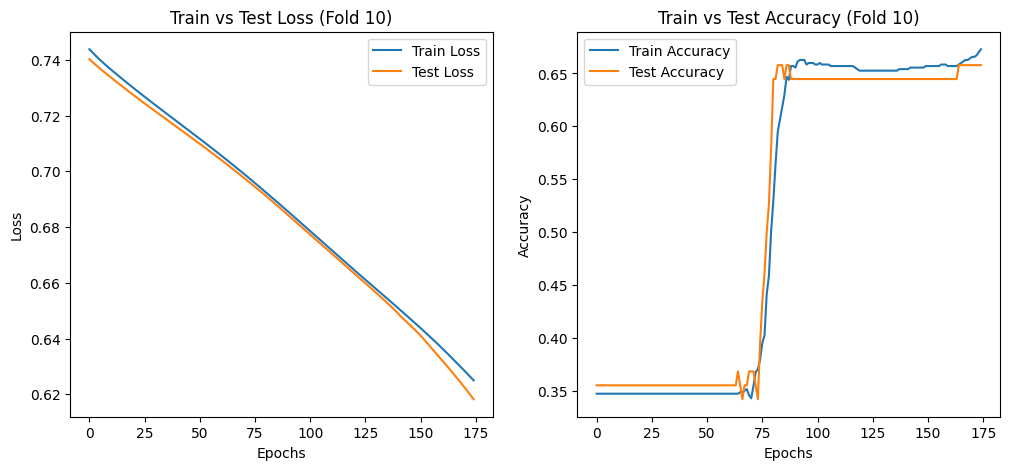

K=10: Average Final Test Loss = 0.6210166037082672, Average Test Accuracy = 0.6649863362312317


In [13]:
k_values = [3, 4, 5, 6, 7, 8, 9, 10]
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_losses = []
    fold_accuracies = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = ClassificationModelv1(10,8)
        train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs=175)
        fold_losses.append(test_losses[-1])
        fold_accuracies.append(test_accuracies[-1])

        def plotting_function(train_losses,test_losses,train_accuracies,test_accuracies):
          plt.figure(figsize=(12,5))
          plt.subplot(1,2,1)
          plt.plot(train_losses, label='Train Loss')
          plt.plot(test_losses, label='Test Loss')
          plt.xlabel('Epochs')
          plt.ylabel('Loss')
          plt.title(f'Train vs Test Loss (Fold {k})')
          plt.legend()

          plt.subplot(1,2,2)
          plt.plot(train_accuracies, label='Train Accuracy')
          plt.plot(test_accuracies, label='Test Accuracy')
          plt.xlabel('Epochs')
          plt.ylabel('Accuracy')
          plt.title(f'Train vs Test Accuracy (Fold {k})')
          plt.legend()
          plt.show()
        plot = plotting_function(train_losses, test_losses, train_accuracies, test_accuracies)

    print(f"K={k}: Average Final Test Loss = {np.mean(fold_losses)}, Average Test Accuracy = {np.mean(fold_accuracies)}")


Train_loss: 0.6099533438682556  | Test_loss: 0.6102168560028076  | Train_accuracy: 0.7524429559707642  | Test_accuracy: 0.7450980544090271
The best train and test accuracy I got from the value of k=5 fold. Here the train accuracy is 0.75 and the test accuracy is 0.74.
Train loss is: 0.60995 and test loss is: 0.6102

## Task-2

Neuron in Layer 1: 12
Split: 0.2
Train_loss: 0.6899741888046265  | Test_loss: 0.6901940107345581  | Train_accuracy: 0.6655791401863098  | Test_accuracy: 0.6428571343421936
Train_loss: 0.6856740117073059  | Test_loss: 0.6863580942153931  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6363636255264282
Train_loss: 0.6817377805709839  | Test_loss: 0.6833837628364563  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6787680387496948  | Test_loss: 0.6811589598655701  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6761522889137268  | Test_loss: 0.6789597868919373  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6737803220748901  | Test_loss: 0.6771553754806519  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.671648383140564  | Test_loss: 0.6755475401878357  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.629870116710

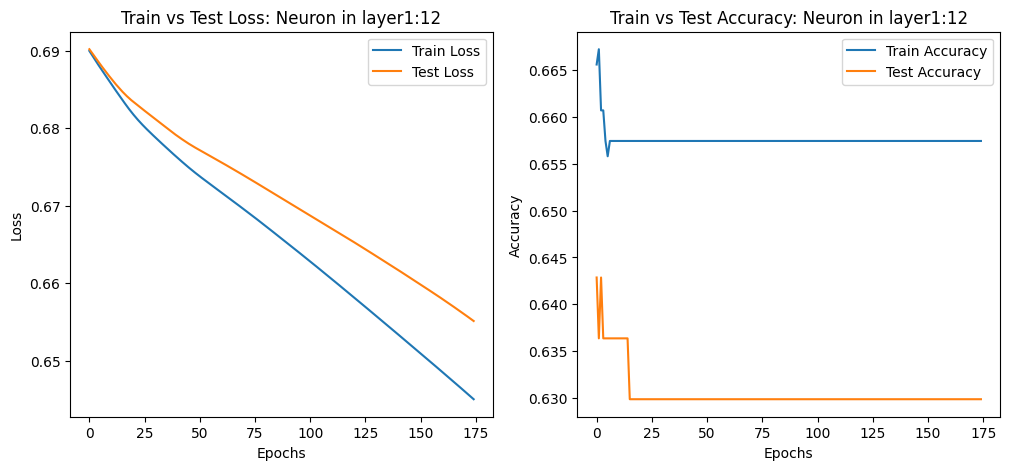

Neuron in Layer 1: 14
Split: 0.2
Train_loss: 0.6842024922370911  | Test_loss: 0.6857426762580872  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6806612014770508  | Test_loss: 0.682963490486145  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6769381165504456  | Test_loss: 0.6801373362541199  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6721242666244507  | Test_loss: 0.6760013103485107  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6662793159484863  | Test_loss: 0.6714927554130554  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6608577966690063  | Test_loss: 0.6674894690513611  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6558348536491394  | Test_loss: 0.6638696789741516  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.629870116710

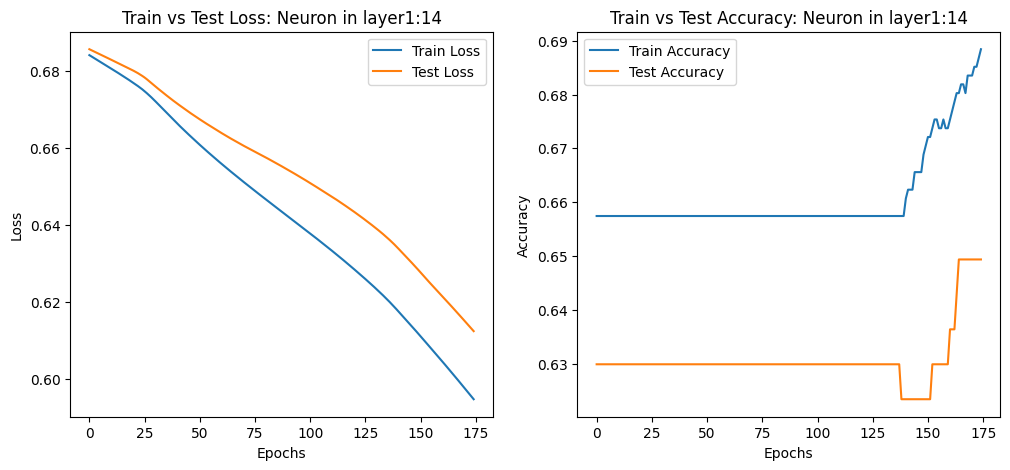

Neuron in Layer 1: 16
Split: 0.2
Train_loss: 0.6907100081443787  | Test_loss: 0.6907595992088318  | Train_accuracy: 0.6541599035263062  | Test_accuracy: 0.6363636255264282
Train_loss: 0.6849845051765442  | Test_loss: 0.6860844492912292  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.679495632648468  | Test_loss: 0.68175208568573  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6747057437896729  | Test_loss: 0.6780714392662048  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6704356670379639  | Test_loss: 0.6748967170715332  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6662082076072693  | Test_loss: 0.6716076731681824  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6616038084030151  | Test_loss: 0.6681578755378723  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.62987011671066

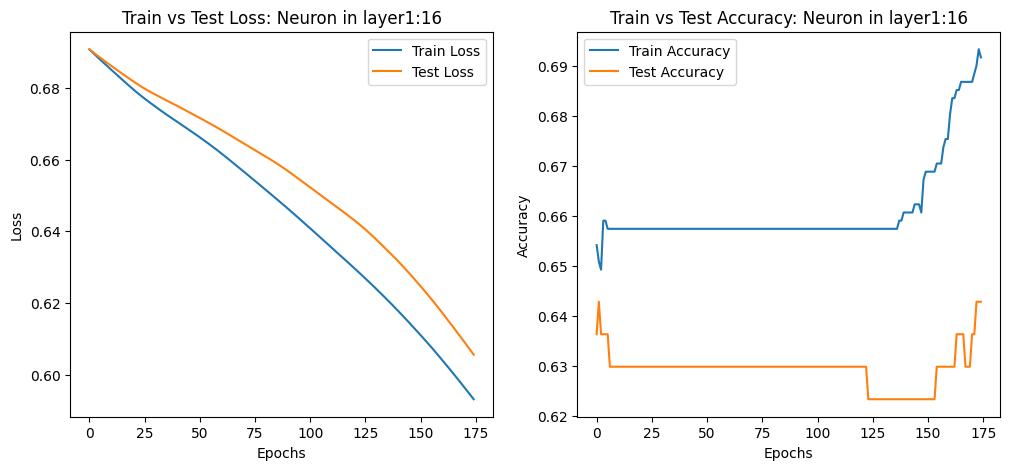

Neuron in Layer 1: 18
Split: 0.2
Train_loss: 0.6625499129295349  | Test_loss: 0.6676079630851746  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6603634357452393  | Test_loss: 0.6660912036895752  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6589136719703674  | Test_loss: 0.6648021340370178  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6575241684913635  | Test_loss: 0.6636468172073364  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6558870673179626  | Test_loss: 0.6623354554176331  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6539186239242554  | Test_loss: 0.6607764959335327  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6521030068397522  | Test_loss: 0.6592416167259216  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.62987011671

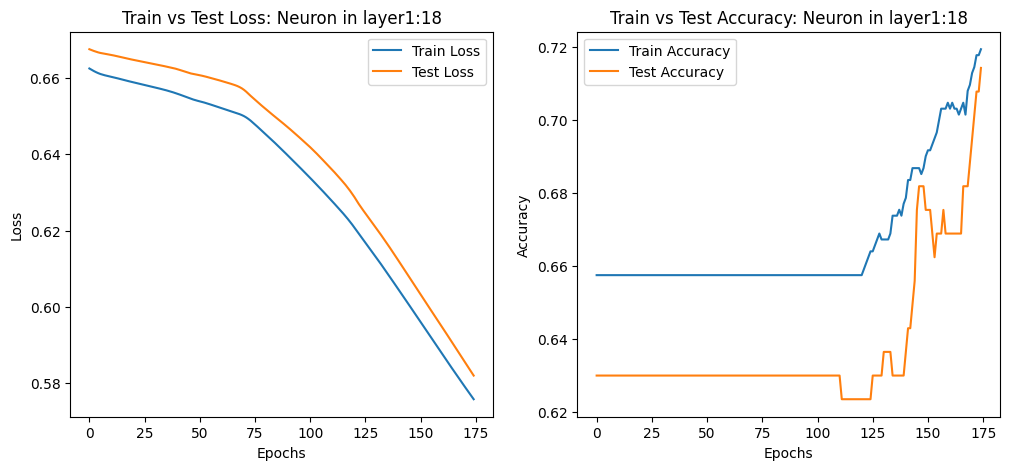

Neuron in Layer 1: 20
Split: 0.2
Train_loss: 0.6683422327041626  | Test_loss: 0.673247218132019  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6628813743591309  | Test_loss: 0.6691246628761292  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6578396558761597  | Test_loss: 0.6650258302688599  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6532465219497681  | Test_loss: 0.6612109541893005  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6497159600257874  | Test_loss: 0.6583787202835083  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6461749076843262  | Test_loss: 0.6557956337928772  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6426262855529785  | Test_loss: 0.6530024409294128  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.629870116710

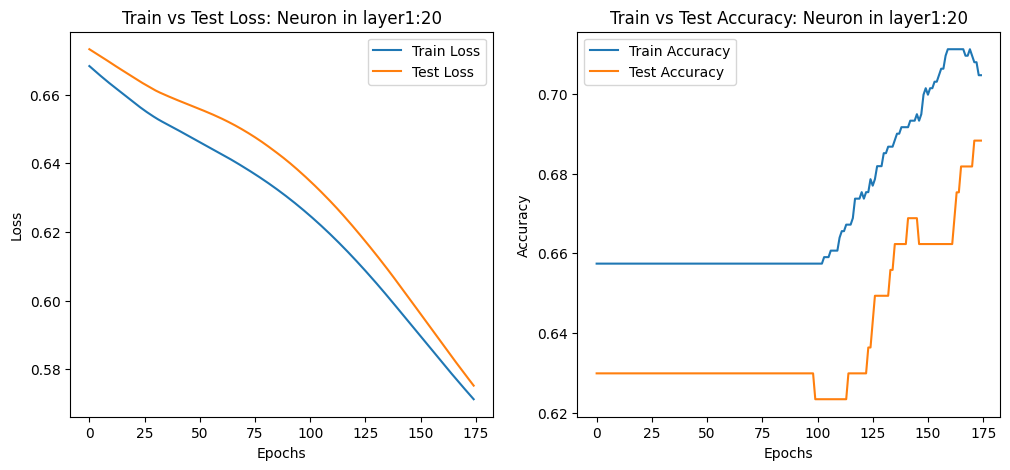

In [14]:
#change the number of neurons in layer 1
splits = [0.2]
neuron_layer_1 = [12,14,16,18,20]

for split in splits:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)



    for l1 in neuron_layer_1:
      model = ClassificationModelv1(l1,8)
      print(f"Neuron in Layer 1: {l1}\nSplit: {split}")
      train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs=175)


      plt.figure(figsize=(12,5))
      plt.subplot(1,2,1)
      plt.plot(train_losses, label='Train Loss')
      plt.plot(test_losses, label='Test Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.title(f'Train vs Test Loss: Neuron in layer1:{l1}')
      plt.legend()

      plt.subplot(1,2,2)
      plt.plot(train_accuracies, label='Train Accuracy')
      plt.plot(test_accuracies, label='Test Accuracy')
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.title(f'Train vs Test Accuracy: Neuron in layer1:{l1}')
      plt.legend()
      plt.show()

We got the highest accuracy while using 18 neurons in layer 1 and the test accuracy was 68% along with 70% accuracy in train data.
The training loss and testing loss is gradually decreasing

## Task- 3

Neuron in Layer 2: 5
Split: 0.3
Train_loss: 0.6511978507041931  | Test_loss: 0.6500994563102722  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6498426795005798  | Test_loss: 0.6487184762954712  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6487200856208801  | Test_loss: 0.6475870609283447  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6477588415145874  | Test_loss: 0.6466763019561768  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.646876871585846  | Test_loss: 0.6459055542945862  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6459929943084717  | Test_loss: 0.6451649069786072  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6450241804122925  | Test_loss: 0.6444101333618164  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033

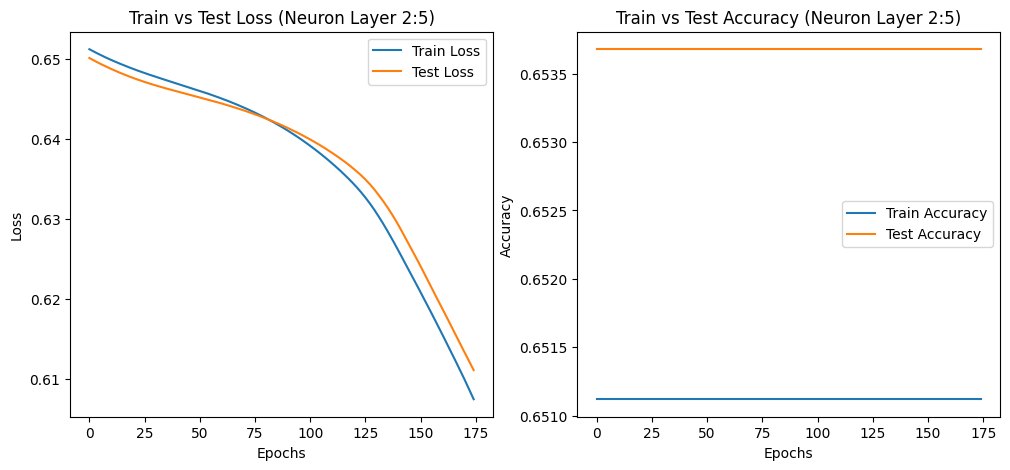

Neuron in Layer 2: 7
Split: 0.3
Train_loss: 0.6688380837440491  | Test_loss: 0.6688923239707947  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6651894450187683  | Test_loss: 0.6652331352233887  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6621002554893494  | Test_loss: 0.6621010303497314  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6594708561897278  | Test_loss: 0.6593289971351624  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.657130241394043  | Test_loss: 0.6568363308906555  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6549151539802551  | Test_loss: 0.6545240879058838  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6529507637023926  | Test_loss: 0.6525523662567139  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033

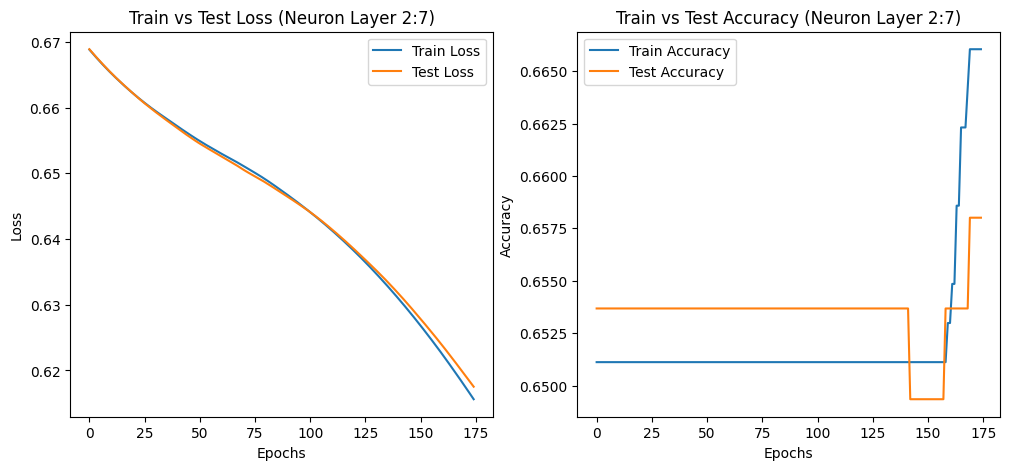

Neuron in Layer 2: 9
Split: 0.3
Train_loss: 0.7146281599998474  | Test_loss: 0.7151833176612854  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.709627628326416  | Test_loss: 0.7099950313568115  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7048999667167664  | Test_loss: 0.7050449848175049  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7000266313552856  | Test_loss: 0.6998758316040039  | Train_accuracy: 0.38059699535369873  | Test_accuracy: 0.3549783527851105
Train_loss: 0.6949368715286255  | Test_loss: 0.6942655444145203  | Train_accuracy: 0.38059699535369873  | Test_accuracy: 0.411255419254303
Train_loss: 0.6894031167030334  | Test_loss: 0.687894880771637  | Train_accuracy: 0.6138059496879578  | Test_accuracy: 0.6623376607894897
Train_loss: 0.6830451488494873  | Test_loss: 0.6805818676948547  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6493506431

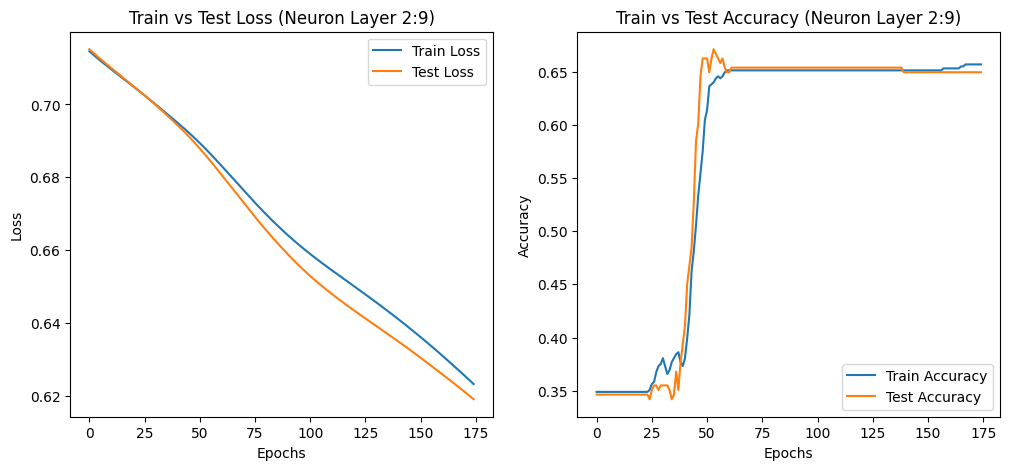

Neuron in Layer 2: 11
Split: 0.3
Train_loss: 0.6629900336265564  | Test_loss: 0.6626818776130676  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6589259505271912  | Test_loss: 0.6584752798080444  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6554414629936218  | Test_loss: 0.6546503901481628  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.652480959892273  | Test_loss: 0.6515709161758423  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6499459147453308  | Test_loss: 0.6491019129753113  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6476898193359375  | Test_loss: 0.6471136212348938  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6456665396690369  | Test_loss: 0.6453644633293152  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.653679668903

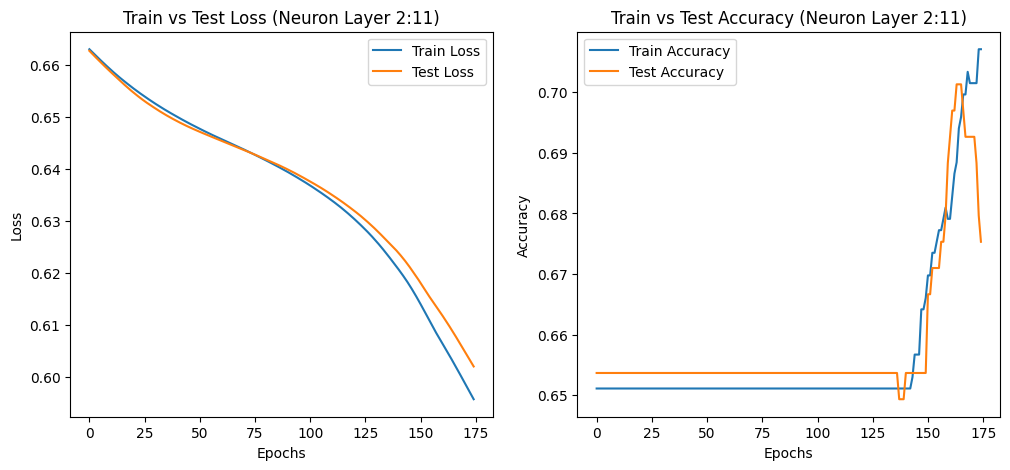

Neuron in Layer 2: 13
Split: 0.3
Train_loss: 0.7032460570335388  | Test_loss: 0.7031226754188538  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.6942831873893738  | Test_loss: 0.6935656070709229  | Train_accuracy: 0.43470147252082825  | Test_accuracy: 0.4199134111404419
Train_loss: 0.6866289973258972  | Test_loss: 0.6855537295341492  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6799766421318054  | Test_loss: 0.6788964867591858  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6737592220306396  | Test_loss: 0.672541618347168  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6676264405250549  | Test_loss: 0.6661069393157959  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6618381142616272  | Test_loss: 0.6598547697067261  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689

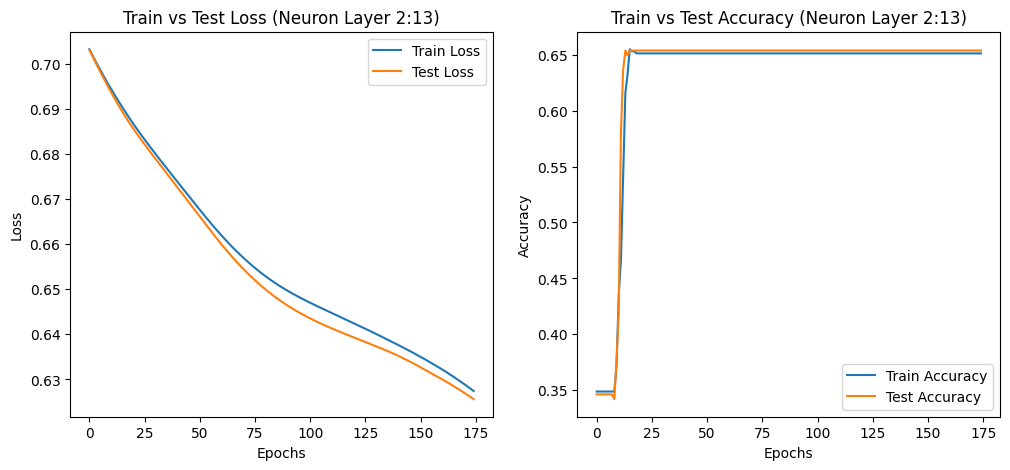

Neuron in Layer 2: 15
Split: 0.3
Train_loss: 0.6728810667991638  | Test_loss: 0.672381579875946  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6670531630516052  | Test_loss: 0.6664537191390991  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6623290181159973  | Test_loss: 0.6617567539215088  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6584217548370361  | Test_loss: 0.6579172611236572  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6551868915557861  | Test_loss: 0.6547397375106812  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6524343490600586  | Test_loss: 0.6520971059799194  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6500371694564819  | Test_loss: 0.6499775052070618  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.653679668903

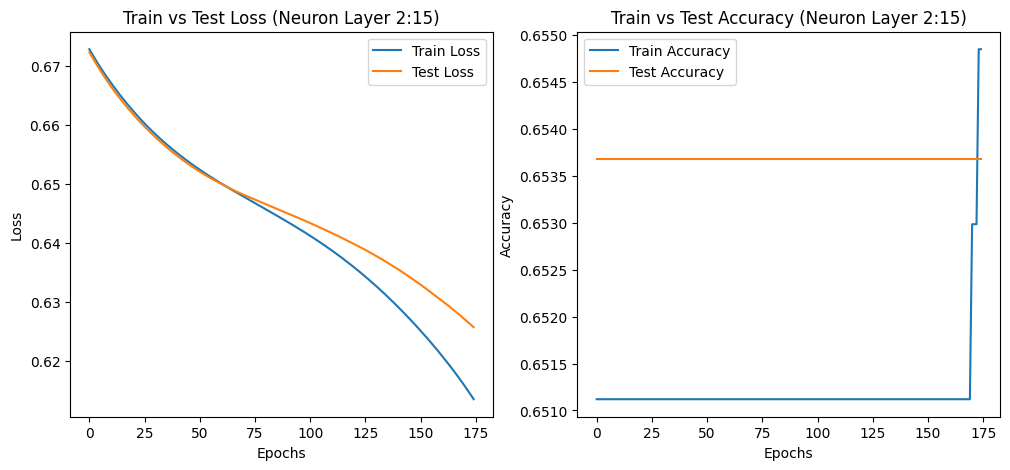

In [15]:
#change the number of neurons in layer 2
splits = [0.3]
neuron_layer_2 = [5,7,9,11,13,15]

for split in splits:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)

    for l2 in neuron_layer_2:
      model = ClassificationModelv1(10,l2)
      print(f"Neuron in Layer 2: {l2}\nSplit: {split}")
      train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs = 175)


      plt.figure(figsize=(12,5))
      plt.subplot(1,2,1)
      plt.plot(train_losses, label='Train Loss')
      plt.plot(test_losses, label='Test Loss')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.title(f'Train vs Test Loss (Neuron Layer 2:{l2})')
      plt.legend()

      plt.subplot(1,2,2)
      plt.plot(train_accuracies, label='Train Accuracy')
      plt.plot(test_accuracies, label='Test Accuracy')
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.title(f'Train vs Test Accuracy (Neuron Layer 2:{l2})')
      plt.legend()
      plt.show()

By using 11 neurons in layer 2, we get the highest test accuracy as well as the train accuracy. The test accuracy is 69% while the training accuracy is 70%.

## Task-3

Using **LeakyReLU** Activation Function

In [16]:
#change the activation function in layer 1
# model 2
activation = []
class ClassificationModelv2(nn.Module):
  def __init__(self,l1,l2):
    super().__init__()
    self.layer1 = nn.Linear(in_features=8,
                            out_features=l1)
    self.layer2 = nn.Linear(in_features=l1,
                            out_features=l2)
    self.layer3 = nn.Linear(in_features=l2,
                            out_features = 1)

    #activation function
    self.relu = nn.ReLU()
    self.leaky_relu = nn.LeakyReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.layer3(self.relu(self.layer2(self.leaky_relu(self.layer1(x))))))

Split: 0.3
Train_loss: 0.6629372239112854  | Test_loss: 0.6617681384086609  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.661048412322998  | Test_loss: 0.6596953272819519  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6591749787330627  | Test_loss: 0.6575940847396851  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6573155522346497  | Test_loss: 0.6555275917053223  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.655515193939209  | Test_loss: 0.6536042094230652  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6538053750991821  | Test_loss: 0.6516788601875305  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.652174711227417  | Test_loss: 0.6498651504516602  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.65058

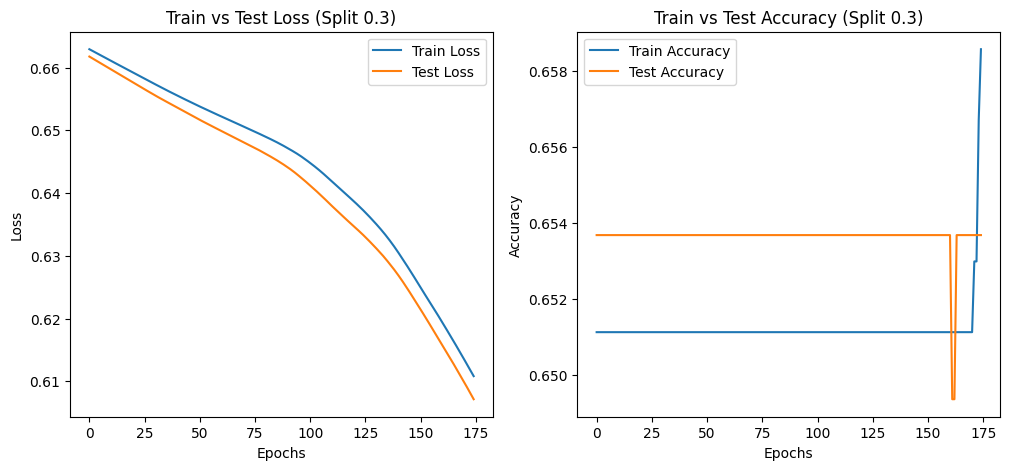

In [17]:
splits = [0.3]
for split in splits:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)

    model = ClassificationModelv2(10,8)
    print(f"Split: {split}")
    train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs=175)


    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Train vs Test Loss (Split {split})')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Train vs Test Accuracy (Split {split})')
    plt.legend()
    plt.show()

We got 65% accuracy while using LeakyReLU activation function instead of ReLU activation in layer 1

Using **Tanh** Activation Function

In [18]:
#change the activation function in layer 1
# model 2
class ClassificationModelv2(nn.Module):
  def __init__(self,l1,l2):
    super().__init__()
    self.layer1 = nn.Linear(in_features=8,
                            out_features=l1)
    self.layer2 = nn.Linear(in_features=l1,
                            out_features=l2)
    self.layer3 = nn.Linear(in_features=l2,
                            out_features = 1)

    #activation function
    self.relu = nn.ReLU()
    self.tanh = nn.Tanh()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.layer3(self.relu(self.layer2(self.tanh(self.layer1(x))))))

Split: 0.3
Using Activation Function: TanH
Train_loss: 0.7093001008033752  | Test_loss: 0.7094462513923645  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7005885243415833  | Test_loss: 0.7004057168960571  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.693161129951477  | Test_loss: 0.6927138566970825  | Train_accuracy: 0.5373134016990662  | Test_accuracy: 0.5974025726318359
Train_loss: 0.6867958903312683  | Test_loss: 0.6860888600349426  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6812272071838379  | Test_loss: 0.6802343130111694  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6762279868125916  | Test_loss: 0.674894392490387  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.671607494354248  | Test_loss: 0.6698563098907471  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.65

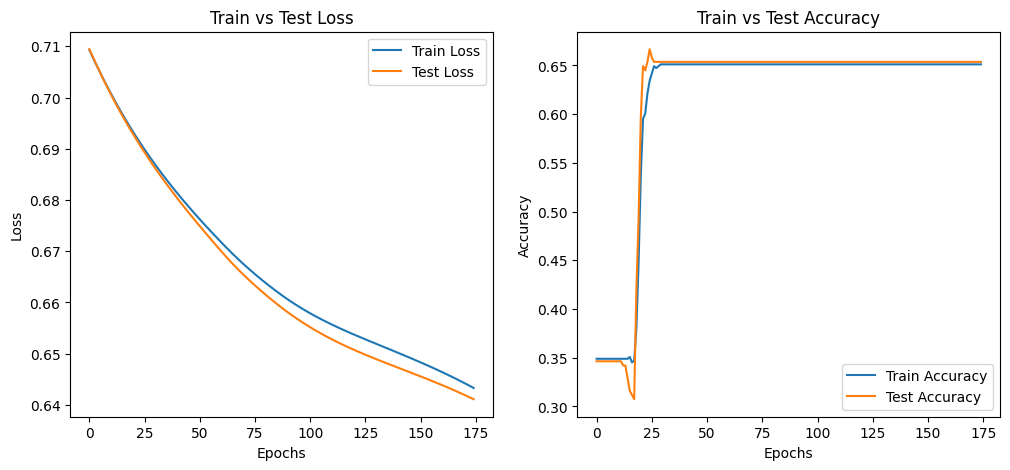

In [19]:
splits = [0.3]

for split in splits:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)



    model = ClassificationModelv2(10,8)
    print(f"Split: {split}\nUsing Activation Function: TanH")
    train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs = 175)


    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Train vs Test Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Train vs Test Accuracy')
    plt.legend()
    plt.show()

By using tanh activation function we get 65% accuracy in both cases

Using **Softplus** Activation Function

In [20]:
#change the activation function in layer 1
# model 2
class ClassificationModelv2(nn.Module):
  def __init__(self,l1,l2):
    super().__init__()
    self.layer1 = nn.Linear(in_features=8,
                            out_features=l1)
    self.layer2 = nn.Linear(in_features=l1,
                            out_features=l2)
    self.layer3 = nn.Linear(in_features=l2,
                            out_features = 1)

    #activation function
    self.relu = nn.ReLU()
    self.softplus = nn.Softplus()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.layer3(self.relu(self.layer2(self.softplus(self.layer1(x))))))

Split: 0.3
Using Activation Function: Softplus
Train_loss: 0.6628691554069519  | Test_loss: 0.6626448035240173  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6559091806411743  | Test_loss: 0.6556847095489502  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6509692072868347  | Test_loss: 0.6507917642593384  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.647718071937561  | Test_loss: 0.6475861668586731  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6456686854362488  | Test_loss: 0.645587146282196  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6443368196487427  | Test_loss: 0.6443330645561218  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6433176398277283  | Test_loss: 0.6434141397476196  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0

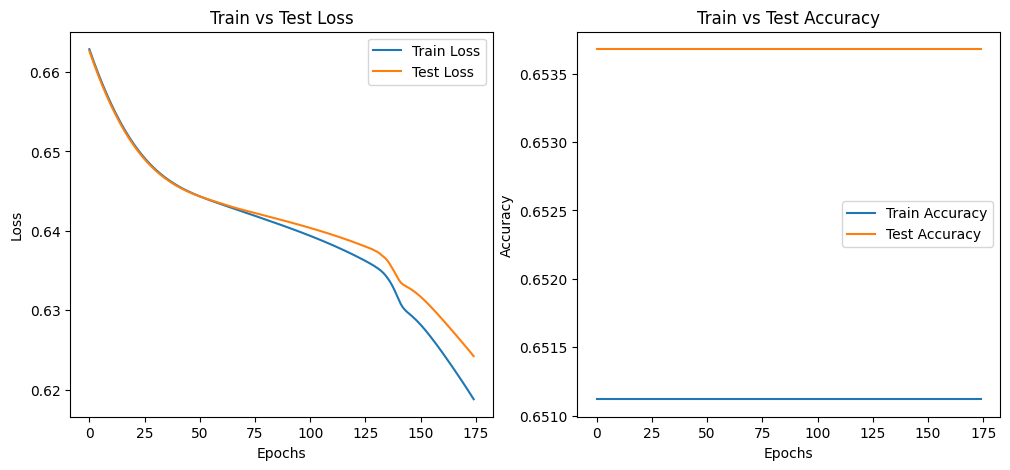

In [21]:
splits = [0.3]

for split in splits:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)



    model = ClassificationModelv2(10,8)
    print(f"Split: {split}\nUsing Activation Function: Softplus")
    train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs = 175)


    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Train vs Test Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Train vs Test Accuracy')
    plt.legend()
    plt.show()

Softmax activation function enables us to achieve 65% accuracy in both training dataset and testing dataset. But the accuracy isn't improving thus we can conclude that the machine isn't learning anything.

## Task-4

Using **LeakyReLU** Activation Function

Split: 0.3
Epoch:175
Using Activation Function:LeakyReLU
Train_loss: 0.6942099928855896  | Test_loss: 0.6938326358795166  | Train_accuracy: 0.43097013235092163  | Test_accuracy: 0.39393940567970276
Train_loss: 0.6891713738441467  | Test_loss: 0.6886218190193176  | Train_accuracy: 0.6529850363731384  | Test_accuracy: 0.6580086350440979
Train_loss: 0.6844050884246826  | Test_loss: 0.6835472583770752  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6797526478767395  | Test_loss: 0.6786559820175171  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6751831769943237  | Test_loss: 0.6736069917678833  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.670685887336731  | Test_loss: 0.6684852838516235  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.666431725025177  | Test_loss: 0.6634801626205444  | Train_accuracy: 0.6511194109916687  | Test

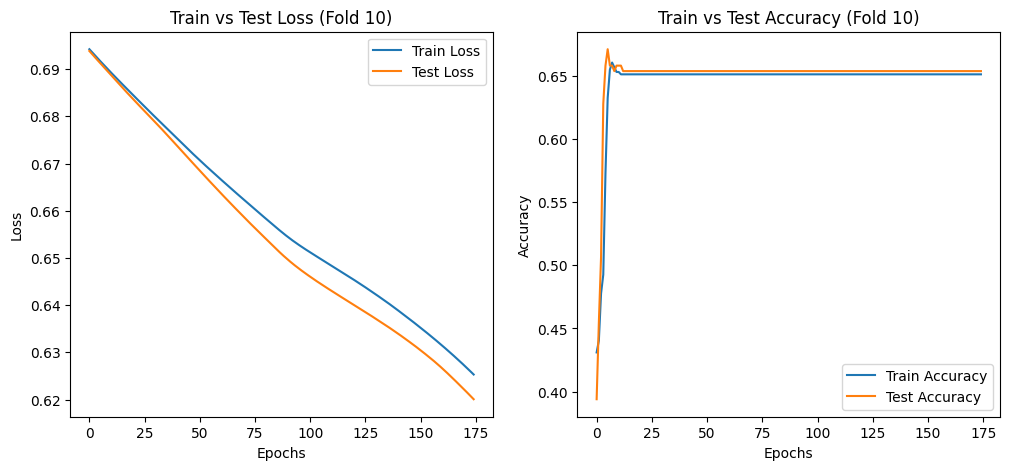

In [22]:
#change the activation function in layer 1
# model 2
class ClassificationModelv3(nn.Module):
  def __init__(self,l1,l2):
    super().__init__()
    self.layer1 = nn.Linear(in_features=8,
                            out_features=l1)
    self.layer2 = nn.Linear(in_features=l1,
                            out_features=l2)
    self.layer3 = nn.Linear(in_features=l2,
                            out_features = 1)

    #activation function
    self.relu = nn.ReLU()
    self.leaky_relu = nn.LeakyReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.layer3(self.leaky_relu(self.layer2(self.relu(self.layer1(x))))))


splits = [0.3]

for split in splits:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)



    model = ClassificationModelv3(10,8)
    print(f"Split: {split}\nEpoch:175\nUsing Activation Function:LeakyReLU")
    train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs=175)


    plot = plotting_function(train_losses,test_losses,train_accuracies,test_accuracies)

LeakyReLU activation function using in layer 2 enables the same 65% accuracy in both training and testing dataset after 175 epochs by our model

Using **Tanh** Activation Function

Split: 0.3
Epoch: 175
Activation Function: TanH
Train_loss: 0.6657901406288147  | Test_loss: 0.6657921671867371  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.660843551158905  | Test_loss: 0.6607984900474548  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6565845608711243  | Test_loss: 0.6564986109733582  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.652876079082489  | Test_loss: 0.6528670191764832  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6495643854141235  | Test_loss: 0.6497678756713867  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6464935541152954  | Test_loss: 0.6469869017601013  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6434838771820068  | Test_loss: 0.6442418098449707  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 

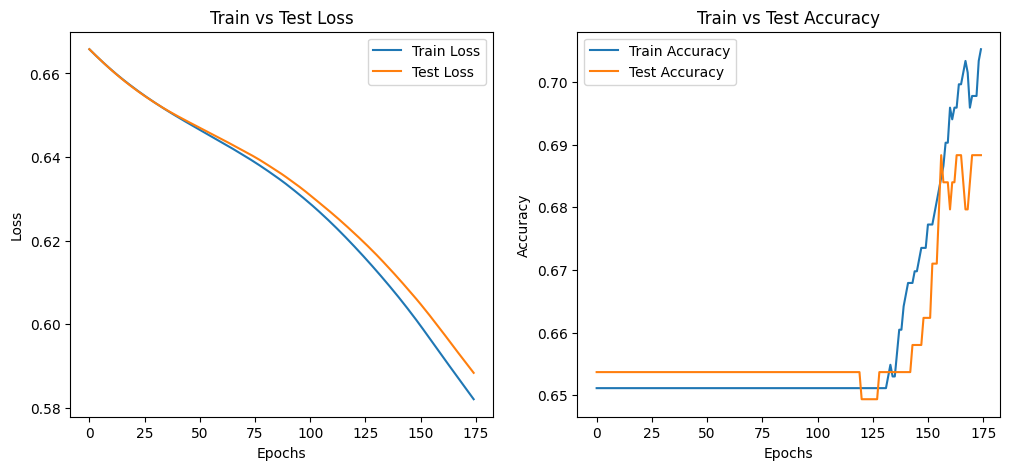

In [23]:
#change the activation function in layer 1
# model 2
class ClassificationModelv3(nn.Module):
  def __init__(self,l1,l2):
    super().__init__()
    self.layer1 = nn.Linear(in_features=8,
                            out_features=l1)
    self.layer2 = nn.Linear(in_features=l1,
                            out_features=l2)
    self.layer3 = nn.Linear(in_features=l2,
                            out_features = 1)

    #activation function
    self.relu = nn.ReLU()
    self.tanh = nn.Tanh()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.layer3(self.tanh(self.layer2(self.relu(self.layer1(x))))))


splits = [0.3]

for split in splits:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)



    model = ClassificationModelv3(10,8)
    print(f"Split: {split}\nEpoch: 175\nActivation Function: TanH")
    train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs = 175)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Train vs Test Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Train vs Test Accuracy')
    plt.legend()
    plt.show()


Train accuracy: 69% and Test accuracy: 68%, by using TanH activation function, which is appreciably higher than using
LeakyReLU as an activation function

Using **Softplus** Activation Function

Split: 0.3
Epoch:175
Activation Function: Softplus
Train_loss: 0.6550086736679077  | Test_loss: 0.6536986827850342  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6510795950889587  | Test_loss: 0.6496328115463257  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6484474539756775  | Test_loss: 0.6468052864074707  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6467301249504089  | Test_loss: 0.6449344754219055  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6455546021461487  | Test_loss: 0.6436564326286316  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6445578932762146  | Test_loss: 0.6425803899765015  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6435299515724182  | Test_loss: 0.6415453553199768  | Train_accuracy: 0.6511194109916687  | Test_accur

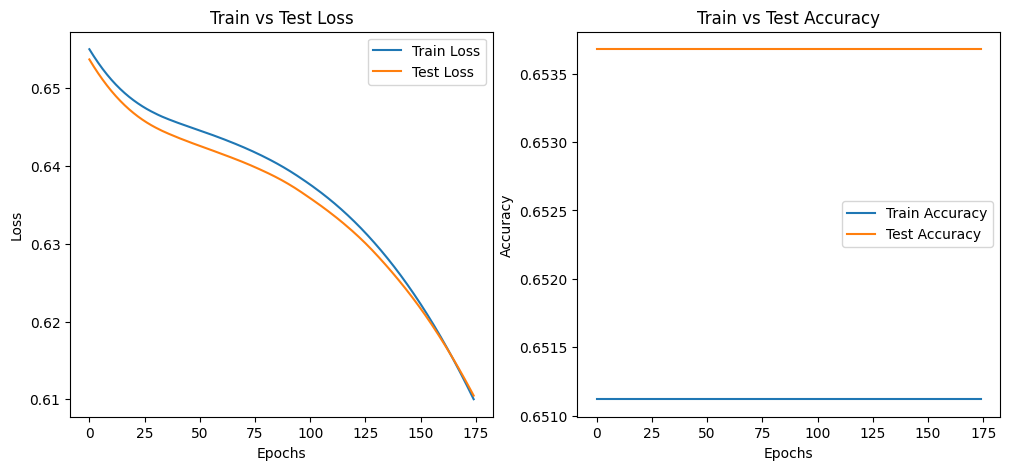

In [24]:
#change the activation function in layer 1
# model 2
class ClassificationModelv3(nn.Module):
  def __init__(self,l1,l2):
    super().__init__()
    self.layer1 = nn.Linear(in_features=8,
                            out_features=l1)
    self.layer2 = nn.Linear(in_features=l1,
                            out_features=l2)
    self.layer3 = nn.Linear(in_features=l2,
                            out_features = 1)

    #activation function
    self.relu = nn.ReLU()
    self.softplus = nn.Softplus()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.layer3(self.softplus(self.layer2(self.relu(self.layer1(x))))))


splits = [0.3]

for split in splits:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)



    model = ClassificationModelv3(10,8)
    print(f"Split: {split}\nEpoch:175\nActivation Function: Softplus")
    train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epochs =175)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Train vs Test Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Train vs Test Accuracy')
    plt.legend()
    plt.show()




We use softplus activation funtion in layer 2 and get 65% accuracy in both train and test dataset.


## Task-5

In [33]:
layer_configs = [
    [18],         # 1 hidden layer
    [18, 12],     # 2 hidden layers
    [18, 12, 6],  # 3 hidden layers
    [18, 12, 6, 3]  # 4 hidden layers
]


In [34]:
class DynamicClassificationModel(nn.Module):
    def __init__(self, input_size=8, hidden_sizes=[18], output_size=1):
        super().__init__()
        layers = []

        # Input Layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # Hidden Layers
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            layers.append(nn.LeakyReLU())

        # Output Layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        layers.append(nn.Sigmoid())

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)



Testing Model with 1 Hidden Layers: [18]
Train_loss: 0.7414646148681641  | Test_loss: 0.7337530255317688  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.7209858894348145  | Test_loss: 0.716263473033905  | Train_accuracy: 0.3425774872303009  | Test_accuracy: 0.37012988328933716
Train_loss: 0.7040375471115112  | Test_loss: 0.7021900415420532  | Train_accuracy: 0.3230016231536865  | Test_accuracy: 0.3181818127632141
Train_loss: 0.6905945539474487  | Test_loss: 0.6915160417556763  | Train_accuracy: 0.5872756838798523  | Test_accuracy: 0.6363636255264282
Train_loss: 0.6802327632904053  | Test_loss: 0.6839416027069092  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6723392009735107  | Test_loss: 0.6780130863189697  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6298701167106628
Train_loss: 0.6663519740104675  | Test_loss: 0.6736128926277161  | Train_accuracy: 0.6574225425720215  | Test_accuracy: 0.6

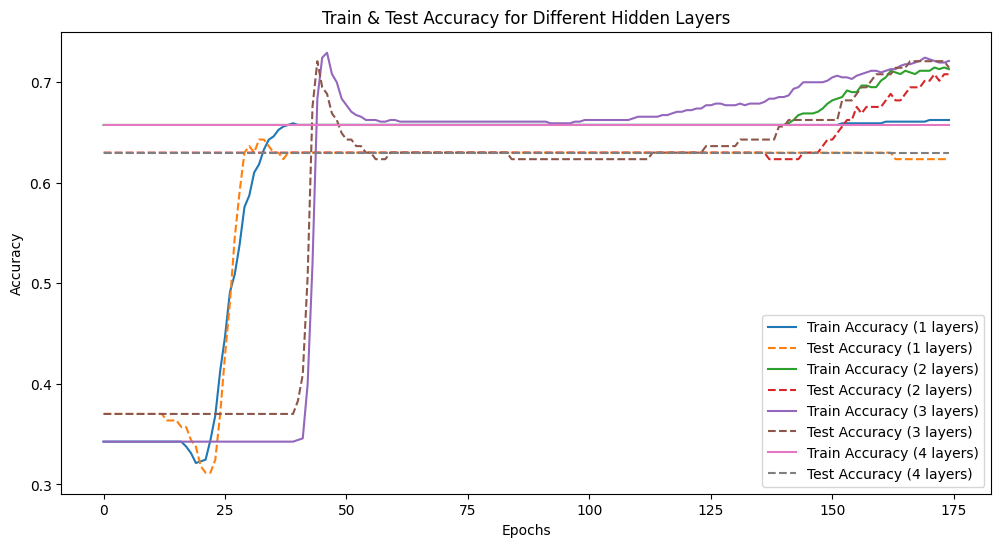

In [36]:
import matplotlib.pyplot as plt

# Splitting data (Modify X and y with actual dataset)
X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=0.2)

# Run experiments for different hidden layer configurations
results = {}

for config in layer_configs:
    print(f"\nTesting Model with {len(config)} Hidden Layers: {config}")

    model = DynamicClassificationModel(hidden_sizes=config)
    train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test, model, epochs=175, lr=0.001)

    # Store results
    results[len(config)] = {
        "train_losses": train_losses,
        "test_losses": test_losses,
        "train_accuracies": train_accuracies,
        "test_accuracies": test_accuracies
    }

# Function to plot the results
def plot_results(results):
    plt.figure(figsize=(12, 6))

    for num_layers, data in results.items():
        plt.plot(data["train_accuracies"], label=f'Train Accuracy ({num_layers} layers)')
        plt.plot(data["test_accuracies"], label=f'Test Accuracy ({num_layers} layers)', linestyle='dashed')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train & Test Accuracy for Different Hidden Layers')
    plt.legend()
    plt.show()

# Plot results
plot_results(results)


We get the most accuracy while using 3 layers. And both training and testing accuracy is 72%.

## Task-6

Split: 0.3
Epochs: 50
Train_loss: 0.657275915145874  | Test_loss: 0.6572603583335876  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6546939611434937  | Test_loss: 0.6544553637504578  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6521561741828918  | Test_loss: 0.6517288684844971  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.649989664554596  | Test_loss: 0.6493156552314758  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6480966806411743  | Test_loss: 0.6471951007843018  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508


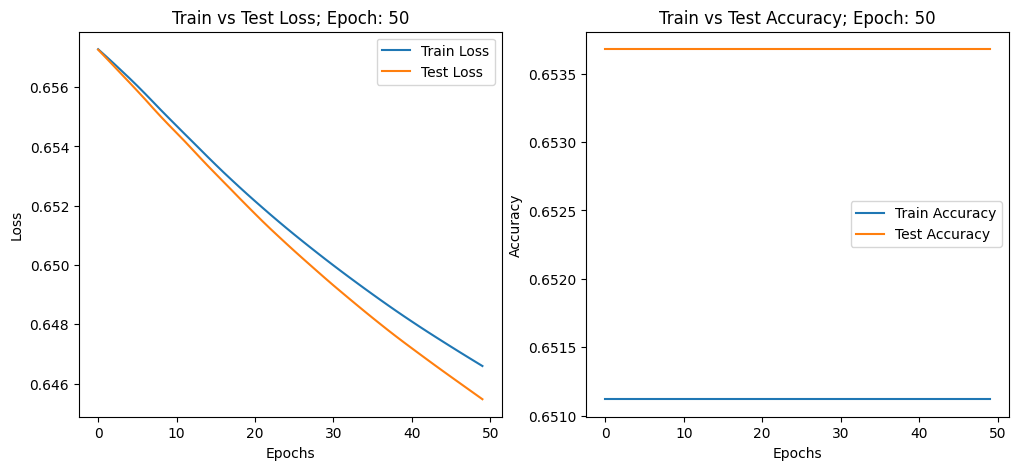

Split: 0.3
Epochs: 75
Train_loss: 0.7638724446296692  | Test_loss: 0.764924168586731  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7553048133850098  | Test_loss: 0.7562669515609741  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7476977109909058  | Test_loss: 0.7485281825065613  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7408000230789185  | Test_loss: 0.7414842247962952  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7344280481338501  | Test_loss: 0.7349623441696167  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7284558415412903  | Test_loss: 0.7288340330123901  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7227782011032104  | Test_loss: 0.7230257391929626  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917

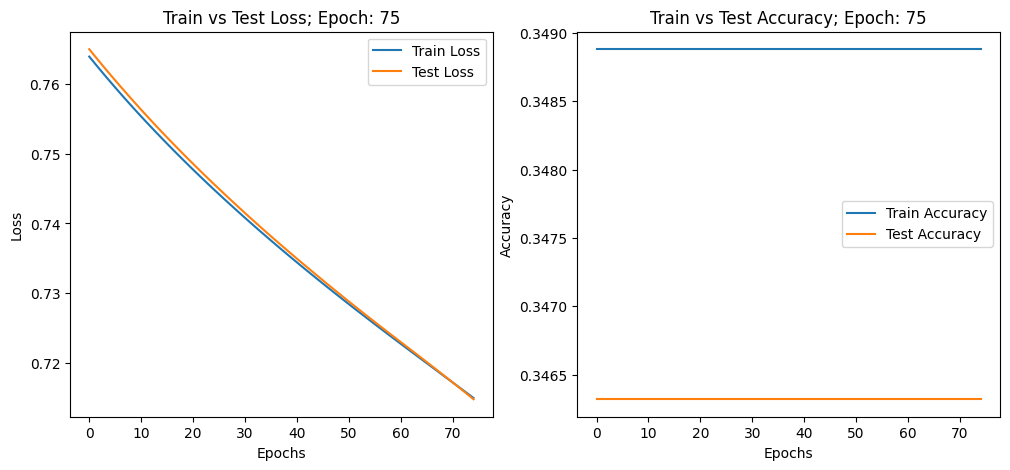

Split: 0.3
Epochs: 100
Train_loss: 0.7267109751701355  | Test_loss: 0.7273370027542114  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7224252820014954  | Test_loss: 0.7228778004646301  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7171504497528076  | Test_loss: 0.7174565196037292  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.711338996887207  | Test_loss: 0.7113224267959595  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7056344747543335  | Test_loss: 0.705289900302887  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7000249624252319  | Test_loss: 0.6992719769477844  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.6947142481803894  | Test_loss: 0.693687915802002  | Train_accuracy: 0.38992536067962646  | Test_accuracy: 0.5194805264472961


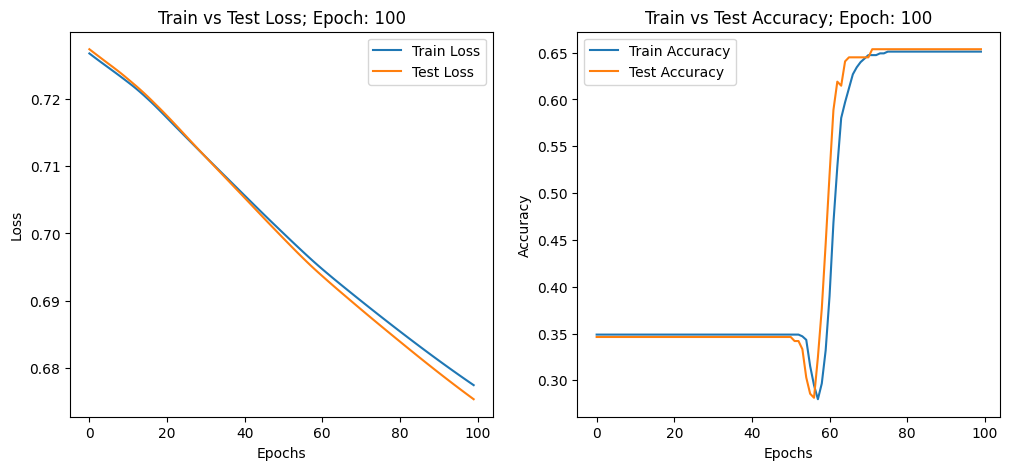

Split: 0.3
Epochs: 125
Train_loss: 0.7116948962211609  | Test_loss: 0.7108224034309387  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7052167057991028  | Test_loss: 0.704330325126648  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.6987180113792419  | Test_loss: 0.697778582572937  | Train_accuracy: 0.31156715750694275  | Test_accuracy: 0.34632033109664917
Train_loss: 0.6920538544654846  | Test_loss: 0.6909498572349548  | Train_accuracy: 0.6175373196601868  | Test_accuracy: 0.6450216174125671
Train_loss: 0.6856135725975037  | Test_loss: 0.6840685606002808  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6797032356262207  | Test_loss: 0.6776719093322754  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6747085452079773  | Test_loss: 0.6721503138542175  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Tr

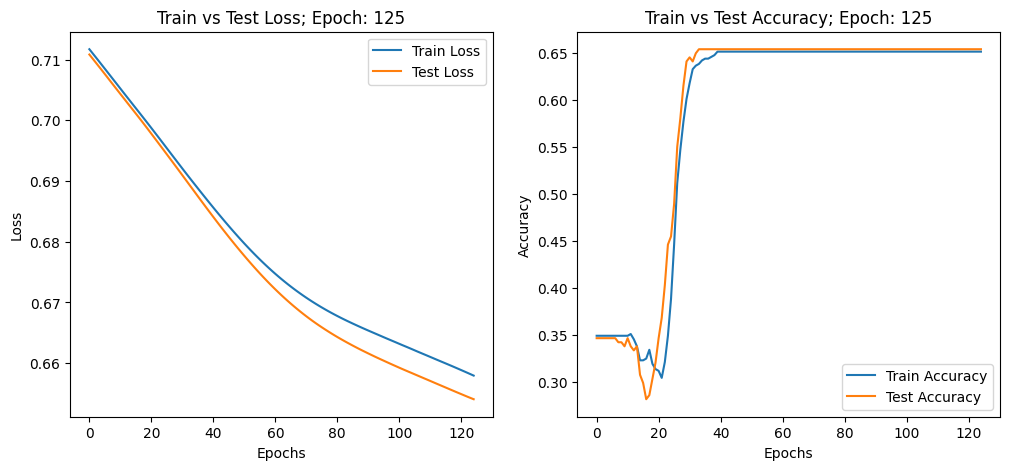

Split: 0.3
Epochs: 150
Train_loss: 0.698420524597168  | Test_loss: 0.6963784098625183  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.3549783527851105
Train_loss: 0.691906213760376  | Test_loss: 0.6900612115859985  | Train_accuracy: 0.5708954930305481  | Test_accuracy: 0.6580086350440979
Train_loss: 0.6866257786750793  | Test_loss: 0.6847795844078064  | Train_accuracy: 0.6492537260055542  | Test_accuracy: 0.6623376607894897
Train_loss: 0.6820546388626099  | Test_loss: 0.6801484227180481  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6780052781105042  | Test_loss: 0.675996720790863  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6743789911270142  | Test_loss: 0.6722928881645203  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6710814833641052  | Test_loss: 0.6690179705619812  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_l

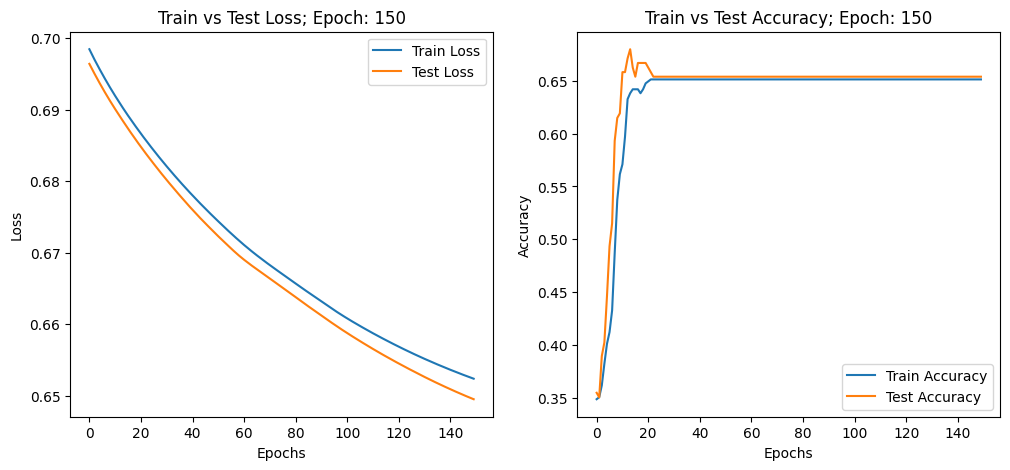

Split: 0.3
Epochs: 175
Train_loss: 0.6558206081390381  | Test_loss: 0.6542227864265442  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6537494659423828  | Test_loss: 0.6522004008293152  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6518930196762085  | Test_loss: 0.6503857970237732  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.650204062461853  | Test_loss: 0.6488468050956726  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6485919952392578  | Test_loss: 0.6474748849868774  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6469475626945496  | Test_loss: 0.6460662484169006  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6451812386512756  | Test_loss: 0.6445184946060181  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train

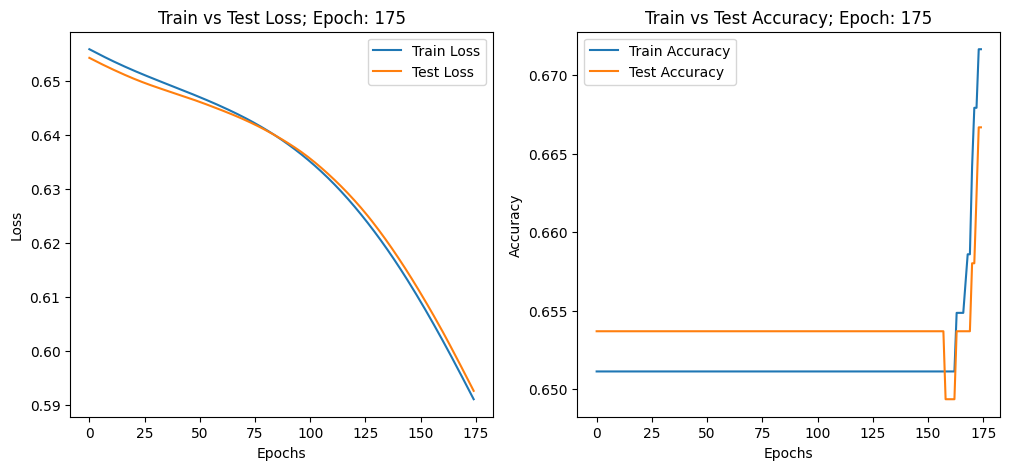

Split: 0.3
Epochs: 200
Train_loss: 0.7444283366203308  | Test_loss: 0.7422298192977905  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.732144832611084  | Test_loss: 0.73030024766922  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7220602035522461  | Test_loss: 0.72042316198349  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7140125036239624  | Test_loss: 0.7122962474822998  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7069252729415894  | Test_loss: 0.7053666710853577  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.7010906934738159  | Test_loss: 0.6997882723808289  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Train_loss: 0.6968557834625244  | Test_loss: 0.6957852840423584  | Train_accuracy: 0.3488805890083313  | Test_accuracy: 0.34632033109664917
Tr

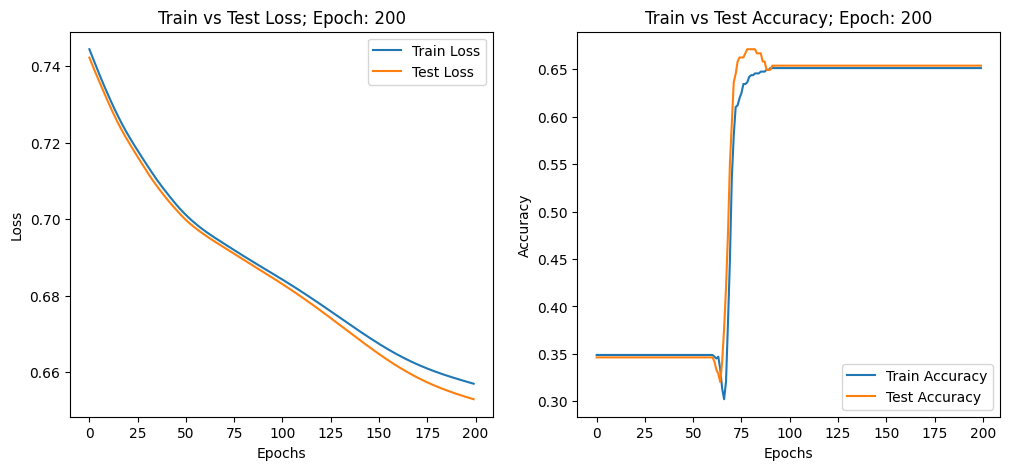

Split: 0.3
Epochs: 225
Train_loss: 0.6739820837974548  | Test_loss: 0.6740946173667908  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6698645949363708  | Test_loss: 0.6697381138801575  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6663637161254883  | Test_loss: 0.6660097241401672  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6631866693496704  | Test_loss: 0.662478506565094  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6601857542991638  | Test_loss: 0.6590356826782227  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.657403826713562  | Test_loss: 0.6558917164802551  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6548601984977722  | Test_loss: 0.6530206799507141  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_

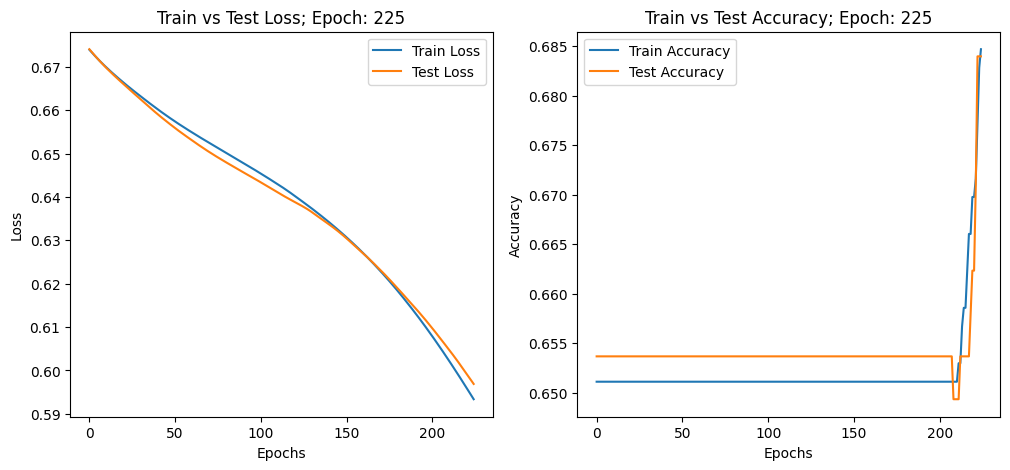

Split: 0.3
Epochs: 250
Train_loss: 0.6656061410903931  | Test_loss: 0.6653752326965332  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6619011163711548  | Test_loss: 0.6617487668991089  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6584792733192444  | Test_loss: 0.6585826873779297  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6554126739501953  | Test_loss: 0.6555680632591248  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.652683436870575  | Test_loss: 0.6528838872909546  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6502185463905334  | Test_loss: 0.6505464911460876  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train_loss: 0.6479267477989197  | Test_loss: 0.6484546065330505  | Train_accuracy: 0.6511194109916687  | Test_accuracy: 0.6536796689033508
Train

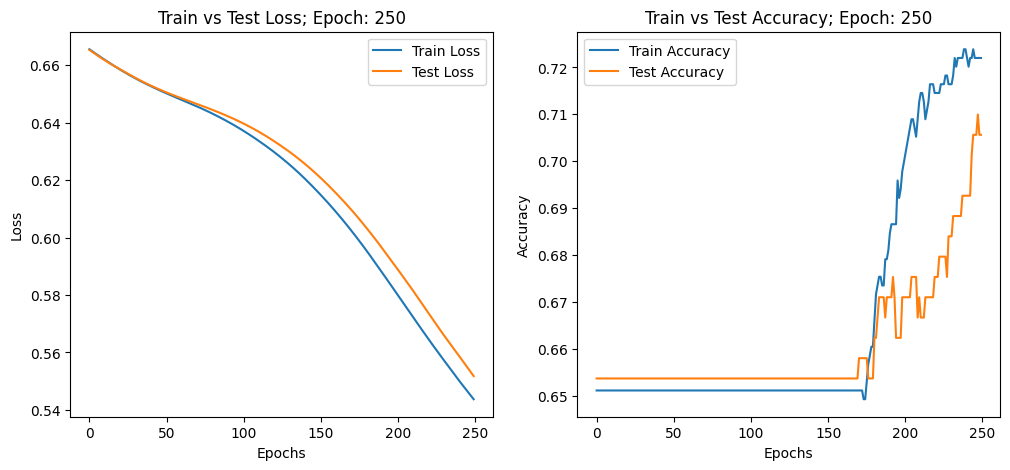

In [38]:
# Task 1: Plain validation with different train-test splits
splits = [0.3]
epochs = [50, 75, 100, 125, 150, 175, 200, 225, 250]
for split in splits:
  for epoch in epochs:
    X_train, X_test, y_train, y_test = splitting_data(X, y, test_size=split)

    model = ClassificationModelv1(10,8)
    print(f"Split: {split}\nEpochs: {epoch}")
    train_losses, test_losses, train_accuracies, test_accuracies = train_test(X_train, y_train, X_test, y_test,model,epoch)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Train vs Test Loss; Epoch: {epoch}')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Train vs Test Accuracy; Epoch: {epoch}')
    plt.legend()
    plt.show()



We get the highest accuracy while using 250 epochs and the training accuracy I got from the model is 72%
and the testing accuracy is 69%